# Imports

In [1]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
!pip install scikit-learn-extra
!pip install Rdkit
!pip install molplotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2177962 sha256=509623b20e83979c2c5d88b7a2d2f6d0e2fd4f14c39b69b4933df6e0673d6a02
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/39/40/c0d86942ba668d975570a0fbd7fe4224445198a90a64ec6f0c1cd3bf2527/molplotly-1.1.8.tar.gz (from https://pypi.org/simple/molplotly/): Requested molplotly from https://files.pythonhosted.org/packages/39/40/c0d86942ba668d975570a0fbd7fe4224445198a90a64ec6f0c1cd3bf2527/molplotly-1.1.8

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
import matplotlib.font_manager
import seaborn as sns
import gdown
from pathlib import Path
from google.colab import drive
from scipy.stats import wasserstein_distance_nd

from typing import Callable, List, Dict, Union
import warnings


#Rdkit + clustering

from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
from IPython.display import display
from rdkit.ML.Cluster import Butina
from scipy.spatial.distance import pdist, squareform
from rdkit.DataStructs import FingerprintSimilarity
from sklearn.cluster import DBSCAN,HDBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation
from sklearn_extra.cluster import KMedoids
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import molplotly

#Plotly
import base64
import textwrap
from io import BytesIO
from typing import Callable
import itertools
import re

import pandas as pd
import numpy as np
from dash import Input, Output, dcc, html, no_update
from jupyter_dash import JupyterDash
from pandas.core.groupby import DataFrameGroupBy
from plotly.graph_objects import Figure
import plotly.graph_objects as go
import plotly.express as px

from rdkit import Chem
from rdkit.Chem.rdChemReactions import ReactionFromSmarts
from rdkit.Chem.rdchem import Mol
from rdkit.Chem.Draw import rdMolDraw2D

import dash
import random



##scaler
from sklearn.preprocessing import StandardScaler



%load_ext google.colab.data_table
warnings.filterwarnings("ignore")
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data_folder = Path(r'/content/drive/MyDrive/Polymer_Scattering _ML/Excel files/main_dataset/')
clustering_folder  = data_folder/'Clustering'

In [4]:
import sys

sys.modules.setdefault("numpy._core",         np.core)
sys.modules.setdefault("numpy._core.numeric", np.core.numeric)
sys.modules.setdefault("numpy._core.multiarray", np.core.multiarray)
sys.modules.setdefault("numpy._core.umath",   np.core.umath)



# raw_dataset: pd.DataFrame = pd.read_pickle(data_folder/'dataset_wo_block_cp_(fp-hsp)_added_additive_dropped_polyHSP_dropped.pkl')

Rg_data: pd.DataFrame = pd.read_pickle(data_folder/'Rg data with aging imputed.pkl')
# Rh_data: pd.DataFrame = pd.read_pickle(data_folder/'cleaned-imputed Rh datast.pkl')

In [ ]:
# Smiles_data = raw_dataset[['canonical_name', 'Monomer SMILES','Dimer SMILES']]
x_y_label_format = {'fontsize':18, 'fontweight':'bold'}


In [ ]:
# Rh_data = raw_dataset[raw_dataset["multimodal Rh"].notna()]
# Rg_data = raw_dataset[raw_dataset["Rg1 (nm)"].notna()]
# Rh_only_data = Rh_data[~Rh_data.index.isin(Rg_data.index)]
# len(Rh_only_data)

In [ ]:
# Rh_data = raw_dataset[raw_dataset["multimodal Rh"].notna()]
# Rg_data = raw_dataset[raw_dataset["Rg1 (nm)"].notna()]
# Rg_Rh_data = raw_dataset[raw_dataset["Rg1 (nm)"].notna() | raw_dataset["multimodal Rh"].notna()]


In [23]:
def set_plot_style(
    font_family="sans-serif",
    font_sans_serif="Arial",
    title_size=20,
    label_size=16,
    tick_size=14,
    legend_size=14,
    seaborn_style=None,
    seaborn_palette=None
):
    """Configure Matplotlib and Seaborn global font and style settings with optional customization."""

    sns.set_style(seaborn_style)  # Options: "white", "darkgrid", "whitegrid", "ticks", "dark"
    sns.set_palette(seaborn_palette)  # Options: "deep", "muted", "bright", "colorblind", etc.

    # # Set Matplotlib font configurations
    # plt.rc("font", family=font_family)  # Correct way to set the font family
    # plt.rc("font", **{"sans-serif": [font_sans_serif]})  # Set sans-serif font

    plt.rc("axes", titlesize=title_size)  # Title font size
    plt.rc("axes", labelsize=label_size)  # X and Y label font size
    plt.rc("xtick", labelsize=tick_size)  # X-tick font size
    plt.rc("ytick", labelsize=tick_size)  # Y-tick font size
    plt.rc("legend", fontsize=legend_size)  # Legend font size

    # Apply Seaborn context settings for consistent font sizes
    sns.set_context("notebook", rc={
        "axes.titlesize": title_size,
        "axes.labelsize": label_size,
        "xtick.labelsize": tick_size,
        "ytick.labelsize": tick_size,
        "legend.fontsize": legend_size,
    })


set_plot_style()




#Preprocessing data

Prepare data

In [24]:
# Rg_Rh_unique_data = Rg_Rh_data.drop_duplicates(subset='Trimer_ECFP6_count_512bits', keep='first')
# Rh_unique_data = Rh_data.drop_duplicates(subset='Trimer_ECFP6_count_512bits', keep='first')
Rg_unique_data = Rg_data.drop_duplicates(subset='Trimer_ECFP6_count_512bits', keep='first')
# RgorRh_unique_data = RgorRh_data.drop_duplicates(subset='Monomer_ECFP6_count_512bits', keep='first')
len(Rg_unique_data)


# Rh_only_data = Rh_unique_data[~Rh_unique_data.index.isin(Rg_unique_data.index)]
# print(len(Rh_only_data))
# Rg_only_data = Rg_unique_data[~Rg_unique_data.index.isin(Rh_unique_data.index)]
# print(len(Rg_only_data))
# # unique_data = unique_data.join(raw_dataset[['Monomer_ECFP6_count_512bits','Monomer_ECFP6_binary_512bits']], how='left')
# print(len(Smiles_data['Dimer SMILES'].unique()))
# print(len(unique_data['canonical_name'].unique()))

22

In [25]:
# rh_set = set(Rh_unique_data['canonical_name'].unique())
rg_set = set(Rg_unique_data['canonical_name'].unique())

# Compute intersection (common elements)
# intersection = rh_set & rg_set

# Compute union (all unique elements from both sets)
# union = rh_set | rg_set

# Print results
# print("Intersection:", len(intersection))
# print("Union:", len(union))

In [26]:
# Rh_ECFP_count_vectors = np.array(Rh_data['Trimer_ECFP6_count_512bits'].tolist())
Rg_ECFP_count_vectors = np.array(Rg_data['Trimer_ECFP6_count_512bits'].tolist())
# Rh_ECFP_binary_vectors = np.array(Rh_data['Trimer_ECFP6_binary_512bits'].tolist())
Rg_ECFP_binary_vectors = np.array(Rg_data['Trimer_ECFP6_count_512bits'].tolist())

# Unique
# count
# Rh_ECFP_count_vectors_unique = np.array(Rh_unique_data['Trimer_ECFP6_count_512bits'].tolist())
Rg_ECFP_count_vectors_unique = np.array(Rg_unique_data['Trimer_ECFP6_count_512bits'].tolist())

# binary
# Rh_ECFP_binary_vectors_unique = np.array(Rh_unique_data['Trimer_ECFP6_binary_512bits'].tolist())
Rg_ECFP_binary_vectors_unique = np.array(Rg_unique_data['Trimer_ECFP6_binary_512bits'].tolist())

# Mordred
Rg_Mordred_vector_unique = pd.DataFrame(Rg_unique_data['Trimer_Mordred'].tolist()).to_numpy(dtype=float)

# Maccs
Rg_MACCS_binary_vector_unique =np.array(Rg_unique_data['Trimer_MACCS'].tolist()).astype(np.uint8)
# HSP
Rg_HSP_vector = Rg_data[['solvent dP','polymer dP','solvent dD', 'polymer dD','solvent dH','polymer dH']].to_numpy(dtype=float)

# unique HSP

Rg_HSPPolysize_vector = Rg_data[['solvent dP', 'polymer dP',
                          'solvent dD', 'polymer dD', 'solvent dH', 'polymer dH', 'Xn', 'Mw (g/mol)', 'PDI']].to_numpy(dtype=float)

In [27]:
Rg_list = Rg_data['Trimer_Mordred'].tolist()
Rg_list = pd.DataFrame(Rg_list)
Rg_list = pd.concat([Rg_list, Rg_data[['Xn', 'Mw (g/mol)', 'PDI']].reset_index()], axis=1)
Rg_Polysize_Mordred = Rg_list.to_numpy(dtype=float)

In [28]:
sd_caler = StandardScaler()
Rg_HSPPolysize_vector_scaled = sd_caler.fit_transform(Rg_HSPPolysize_vector)
Rg_MordredPolysize_vector_scaled = sd_caler.fit_transform(Rg_Polysize_Mordred)
Rg_Mordred_vector_unique_scaled = sd_caler.fit_transform(Rg_Mordred_vector_unique)


 Number of unique polymers in each dataset

# Template building

In [29]:
# data_lengths = {
#     'Rh': len(Rh_unique_data),
#     'Rg': len(Rg_unique_data),
#     'Rg | Rh': len(Rg_Rh_unique_data),
#     'Rg & Rh':len(intersection),
#     # 'all': len(all['canonical_name'].unique())
#     'Rg only':len(Rg_unique_data) - len(intersection),
#     'Rh only':len(Rh_unique_data) - len(intersection),
# }

# labels, lengths = zip(*data_lengths.items())
# plt.figure(figsize=(6, 4))
# bars = plt.bar(labels, lengths, color=['blue', 'green', 'red', 'orange', 'olive', 'dodgerblue'])
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, yval, str(yval),
#              ha='center', va='bottom', fontsize=12, fontweight='bold')
# plt.xlabel('Dataset')
# plt.ylabel('Number of Vectors')
# plt.title('Unique polymer count')
# plt.xticks(rotation=45)

# plt.show()

In [30]:
# clustering_score: pd.DataFrame =  pd.DataFrame(columns=[
#       'target',
#       'metric',
#       'clustering method',
#       'vector',
#       'number of clusters',
#       'cluster sizes',
#       'threshold',
#       'Silhouette score',
#       'Davies-Bouldin score',
#       'Calinski-Harabasz score'])

In [31]:
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import euclidean

def binary_jaccard(vec1, vec2):
    """Compute the binary Jaccard distance using sklearn."""
    jaccard_sim = jaccard_score(vec1, vec2)
    return 1 - jaccard_sim



def weighted_jaccard(u, v,eps: float = 1e-6):
    min_sum = np.sum(np.minimum(u, v))
    max_sum = np.sum(np.maximum(u, v))
    return 1 - ((min_sum+eps) / (max_sum+eps))



# Define the Euclidean distance function
def manual_euclidean(u, v):
    return euclidean(u, v)

In [32]:
from sklearn.mixture import GaussianMixture

In [33]:
naming: dict = {
    'binary_jaccard':binary_jaccard,
    'jaccard' : 'jaccard',
    'euclidean': 'euclidean',
    'manual_euclidean': manual_euclidean,
    'weighted_jaccard': weighted_jaccard,
    'Rg_HSPPolysize_vector_scaled': Rg_HSPPolysize_vector_scaled,
    'Rg_HSP_vector': Rg_HSP_vector,
    'Rg_MordredPolysize_vector_scaled': Rg_MordredPolysize_vector_scaled,
    'Rg_Mordred_vector_unique_scaled':Rg_Mordred_vector_unique_scaled,
    # 'Rh_ECFP_count_vectors_unique': Rh_ECFP_count_vectors_unique,
    'Rg_ECFP_count_vectors_unique': Rg_ECFP_count_vectors_unique,
    # 'Rh_ECFP_binary_vectors_unique': Rh_ECFP_binary_vectors_unique,
    'Rg_ECFP_binary_vectors_unique': Rg_ECFP_binary_vectors_unique,
    'Rg_MACCS_binary_vector_unique': Rg_MACCS_binary_vector_unique,
    'DBSCAN': DBSCAN,
    'HDBSCAN': HDBSCAN,
    'GaussianMixture':GaussianMixture,

}

In [34]:
def _get_scores(fp_vector:np.ndarray, predicted_clusters, metric: Union[str, Callable]):
    si_score = silhouette_score(fp_vector, predicted_clusters, metric=metric)
    db_score = davies_bouldin_score(fp_vector, predicted_clusters)
    ch_score = calinski_harabasz_score(fp_vector, predicted_clusters)
    return si_score, db_score, ch_score

**Structural Map plotly**

In [35]:
def plotly_clusters(df,title):

  '''
  Ref: https://github.com/wjm41/molplotly/tree/main

  '''


  fig = px.scatter(df, x="t-SNE2", y="t-SNE1", title=title,color='cluster',
                              labels={"t-SNE2": "TSNE Component 2",
                                      "t-SNE1": "TSNE Component 1"}
                  ,width=800,height=600)



  fig.update_layout(
      plot_bgcolor='white',
      paper_bgcolor='white',
      title_x=0.5,
      xaxis=dict(
          showline=True,
          linewidth=2,
          linecolor='black',
          mirror=True,
          # showgrid=True,
          # gridwidth=1,
          # gridcolor='lightgray',
          tickfont=dict(family='sans-serif', size=18, color='black'),
          ticklen=8,
          tickwidth=2,
          tickcolor='black',
          ticks='outside',
          title_font=dict(family='sans-serif', size=20, color='black')
      ),
      yaxis=dict(
          showline=True,
          linewidth=2,
          linecolor='black',
          mirror=True,
          # showgrid=True,
          # gridwidth=1,
          # gridcolor='lightgray',
          tickfont=dict(family='sans-serif', size=18, color='black'),
          ticklen=8,
          tickwidth=2,
          tickcolor='black',
          ticks='outside',
          title_font=dict(family='sans-serif', size=20, color='black')
      ),
      title_font=dict(family='sans-serif', size=30, color='black'),
      # font=dict(family='Arial', size=14, color='black')
      legend=dict(
          font=dict(family='sans-serif', size=20, color='black'),  # Customize legend font
          itemsizing='constant',  # Ensure consistent marker size in legend
          traceorder='normal',  # Keep the default order of legend items
          itemwidth=30  # Adjust the width of legend items (optional)
      )
  )

  fig.update_traces(
      marker=dict(
          # line=dict(width=2, color='black'),
          size=12  # Increase marker size
      )
  )

  # Add molecule visualization using MolPlotly
  app_pca  = molplotly.add_molecules(fig, df= df,smiles_col ="smiles",color_col='cluster',show_coords=False,title_col='canonical_name',svg_size=150)
  random_port = random.randint(1024, 65535)
  print(type(app_pca))
  print(dir(app_pca))
  app_pca.run_server(mode='inline', port=8700, height=1000)

  # app_pca.show()

In [36]:
# plot_actively(cov_mordred_vector_scaled,cluster_col='KM3 Mordred cluster',metric='euclidean',perplexity=20,data=Rg_unique_clusters)

**plot simple-tsne**

In [37]:
def plot_clusters(fp_vector,
                  predicted_clusters,
                  unique_clusters,
                  method: str,
                  target: str,
                  vector: str,
                  metric: str,
                  medoid_indices=None,
                  perplexity: int = 20,
                  loc ='upper center'
                  ):
    """
    Perform t-SNE computation and plot clusters. Mark medoid points with a red star.
    """
    tsne = TSNE(n_components=2, metric=naming[metric], random_state=42, perplexity=perplexity)
    tsne_results = tsne.fit_transform(fp_vector)

    plot_title = f"{vector} cluster with {method}{len(unique_clusters)}"
    unique_clusters, label_counts = np.unique(predicted_clusters, return_counts=True)
    palette = sns.color_palette("Set2", len(unique_clusters))
    cluster_colors = {label: palette[i] for i, label in enumerate(unique_clusters)}

    fig, ax = plt.subplots(figsize=(10, 8))

    for label in unique_clusters:
        indices = predicted_clusters == label
        ax.scatter(tsne_results[indices, 0], tsne_results[indices, 1],
                   color=cluster_colors[label], label=f'Cluster {label}', alpha=0.7)

    # Mark medoid points with a red star
    if medoid_indices is not None:
        ax.scatter(tsne_results[medoid_indices, 0], tsne_results[medoid_indices, 1],
                   color='red', marker='*', s=200, label='Medoids')


    ncol = len(unique_clusters) + (1 if medoid_indices is not None else 0)
    # ncol = min(4, total_legend_items)  # You can adjust the "4" as your preferred max per row
    ax.set_xlabel("TSNE Component 1", fontdict=x_y_label_format)
    ax.set_ylabel("TSNE Component 2", fontdict=x_y_label_format)
    # ax.set_title(plot_title, fontdict=title_label_format)
    ax.tick_params(axis='both', labelsize=16)
    ax.legend(loc=loc,
              bbox_to_anchor=(0.5, 1.2),
              title=plot_title,
              title_fontsize=16,
              fontsize=14,
              ncol=ncol,
              )

    plt.tight_layout()
    plt.show()

    return tsne_results

In [38]:
# k3_Rg_Mordred, KMedoids4_label_Rg_Mordred, medoids4_Rg_Mordred, km4_tsne_Rg_Mordred = get_clusters(
#                   fp='Rg_Mordred_vector_unique_scaled',
#                   method='KMedoids',
#                   n_clusters=3,
#                   plotting=True,
#                   get_label=True,
#                   perplexity=15,
#                   loc = 'upper center'
#                   )

In [39]:
def _save_results(
    target: str,
    method: str,
    metric: Union[str, Callable],
    vector: str,
    unique_clusters: np.ndarray,
    cluster_sizes: dict,
    eps: float = None,
    min_sample: int = None,
    min_cluster_size: int = None,
    cluster_selection_epsilon: float = None,
    si_score: float = None,
    db_score: float = None,
    ch_score: float = None,
) -> pd.DataFrame:
    """
    Save clustering results to a DataFrame.

    Args:
        target: Target identifier.
        method: Clustering method ('KMedoids', 'Butina', or 'ScanCluster').
        metric: Metric used for clustering (str or callable).
        vector: Vector type ('binary' or 'weighted').
        unique_clusters: Unique cluster labels.
        cluster_sizes: Dictionary of cluster sizes.
        eps: Distance threshold (for Butina and ScanCluster).
        min_sample: Minimum samples for DBSCAN (ScanCluster).
        min_cluster_size: Minimum cluster size for HDBSCAN (ScanCluster).
        cluster_selection_epsilon: Cluster selection epsilon for HDBSCAN (ScanCluster).
        si_score: Silhouette score.
        db_score: Davies-Bouldin score.
        ch_score: Calinski-Harabasz score.

    Returns:
        DataFrame containing the clustering results.
    """
    # Handle clustering-specific parameters
    if method == 'Butina':
        threshold_value = {'eps': eps}
    elif method in ['DBSCAN', 'HDBSCAN']:
        threshold_value = {
            'eps': eps,
            'min sample/size': min_sample or min_cluster_size,
            'cluster selection epsilon': cluster_selection_epsilon
        }
        # Remove None values from threshold dictionary
        threshold_value = {k: v for k, v in threshold_value.items() if v is not None}
    else:
        threshold_value = None  # KMedoids has no threshold value

    scores = pd.DataFrame([{
        'target': target,
        'clustering method': method,
        'metric': metric,
        'vector': vector,
        'number of clusters': len(unique_clusters),
        'cluster sizes': cluster_sizes,
        'threshold': threshold_value,
        'Silhouette score': si_score,
        'Davies-Bouldin score': db_score,
        'Calinski-Harabasz score': ch_score
    }])

    return scores

In [40]:
def get_clusters(
    fp: str,
    method: str = 'KMedoids',
    n_clusters: int = 2,
    eps: float = None,
    min_samples: int = None,
    min_cluster_size: int = None,
    cluster_selection_epsilon: float = None,
    # metric: Union[str, Callable] = None,
    plotting:bool=False,
    get_label:bool=False,
    n_comp: int = 2,  # Number of components for LDA,
    perplexity:int=20,
    loc:str='best'
) -> pd.DataFrame:
    """
    Perform clustering using the specified method (K-Medoids, Butina, DBSCAN, or HDBSCAN).

    Args:
        fp: Fingerprint identifier (e.g., 'target_vector').
        score_reservoir: DataFrame to store clustering results.
        method: Clustering method ('KMedoids', 'Butina', 'DBSCAN', or 'HDBSCAN').
        n_clusters: Number of clusters for K-Medoids.
        eps: Distance threshold for DBSCAN or HDBSCAN.
        min_samples: Minimum samples for DBSCAN or HDBSCAN.
        min_cluster_size: Minimum cluster size for HDBSCAN.
        cluster_selection_epsilon: Cluster selection epsilon for HDBSCAN.
        metric: Metric to use for clustering (str or callable).

    Returns:
        Updated score_reservoir DataFrame.
    """
    target = fp.split('_')[0]
    vector = fp.split('_')[1]
    if vector == 'ECFP'or vector=='MACCS':
      vector = '_'.join([vector,fp.split('_')[2]])
    # Determine metric based on vector type if not provided
    # if metric is None:
    if 'binary' in vector:
        metric = 'jaccard'
    elif 'count' in vector:
        metric = 'weighted_jaccard'
    else:
        metric = 'euclidean'

    print(metric)
    # Get fingerprint vector
    fp_vector = naming[fp]
    medoid_indices = None
    # Perform clustering based on the method
    if method == 'KMedoids':
        # K-Medoids clustering
        KM = KMedoids(n_clusters=n_clusters, metric=naming[metric], random_state=42, method='pam', init='k-medoids++')
        predicted_clusters = KM.fit_predict(fp_vector)
        medoid_indices = KM.medoid_indices_
    elif method == 'GaussianMixture':
          gm = GaussianMixture(n_components=n_clusters, random_state=42,max_iter=200)
          predicted_clusters = gm.fit_predict(fp_vector)
    elif method == 'Butina':

        if vector == 'binary':
          metric = 'binary_jaccard'
        elif vector == 'count':
          metric ='weighted_jaccard'

        else:
          metric ='manual_euclidean'

        # Butina clustering
        predicted_clusters = Butina.ClusterData(
            data=fp_vector,
            nPts=len(fp_vector),
            distThresh=eps,
            isDistData=False,
            distFunc=naming[metric]
        )
        # Flatten cluster labels
        cluster_labels = np.zeros(len(fp_vector), dtype=int)
        for label, cluster in enumerate(predicted_clusters):
            for index in cluster:
                cluster_labels[index] = label
        predicted_clusters = cluster_labels
    elif method in ['DBSCAN', 'HDBSCAN']:
        # DBSCAN or HDBSCAN clustering
        clustering_method = naming[method]
        parameters = {
            "metric": naming[metric],
            "eps": eps,
            "min_samples": min_samples,
            "min_cluster_size": min_cluster_size,
            "cluster_selection_epsilon": cluster_selection_epsilon
        }
        parameters = {k: v for k, v in parameters.items() if v is not None}
        dbscan = clustering_method(**parameters)
        predicted_clusters = dbscan.fit_predict(fp_vector)
    # elif method == 'LDA':
    #     # LDA clustering
    #     lda = LatentDirichletAllocation(n_components=n_comp, random_state=42)
    #     clusters = lda.fit_transform(fp_vector)
    #     predicted_clusters = np.argmax(clusters, axis=1)
    else:
        raise ValueError("Invalid method. Choose 'KMedoids', 'Butina', 'DBSCAN', 'HDBSCAN', or 'LDA'.")
    # print(len(predicted_clusters))
    # Calculate clustering scores
    si_score, db_score, ch_score = _get_scores(fp_vector, predicted_clusters, naming[metric])
    print(f"Silhouette score: {round(si_score, 2)}\nDavies-Bouldin score: {round(db_score, 2)}\nCalinski-Harabasz score: {round(ch_score, 2)}")

    # Plot clusters

    # Save results to score_reservoir
    unique_clusters, label_counts = np.unique(predicted_clusters, return_counts=True)
    cluster_sizes = {f'C_{int(label)}': int(count) for label, count in zip(unique_clusters, label_counts)}
    if plotting:
      tsne_results = plot_clusters(fp_vector,
                                   predicted_clusters,
                                   unique_clusters,
                                   method,
                                   target,
                                   vector,
                                   metric,
                                   medoid_indices,
                                   perplexity=perplexity,
                                   loc=loc
                                   )

    # Handle threshold parameters for DBSCAN and HDBSCAN
    scores = _save_results(
        target=target,
        method=method,
        metric=metric,
        vector=vector,
        unique_clusters=unique_clusters,
        cluster_sizes=cluster_sizes,
        eps=eps,
        min_sample=min_samples,
        min_cluster_size=min_cluster_size,
        cluster_selection_epsilon=cluster_selection_epsilon,
        si_score=si_score,
        db_score=db_score,
        ch_score=ch_score
    )

    if get_label:
      if method=='KMedoids':
        return scores, predicted_clusters, medoid_indices, tsne_results
      return scores, predicted_clusters, tsne_results
    return scores

In [41]:
def save_all_clustering_scores(target_vector_list, eps_range=np.arange(0.01, 1, 0.04)) -> pd.DataFrame:
    clustering_score = pd.DataFrame(columns=[
        'target',
        'metric',
        'clustering method',
        'vector',
        'number of clusters',
        'cluster sizes',
        'threshold',
        'Silhouette score',
        'Davies-Bouldin score',
        'Calinski-Harabasz score'
    ])

    for fp_vector in target_vector_list:
        # Butina
        for eps in eps_range:
            try:
                bt_score = get_clusters(fp=fp_vector, method='Butina', eps=eps)
                clustering_score = pd.concat([clustering_score, bt_score], ignore_index=True)
            except ValueError as e:
                if "Number of labels is" in str(e):
                    print(f"Skipping Butina | {fp_vector} | eps={eps} due to insufficient clusters.")
                    continue
                else:
                    raise

        # KMedoids and Gaussian Mixture
        for n_c in [2, 3, 4, 5, 6]:
            try:
                KM_score = get_clusters(fp=fp_vector, method='KMedoids', n_clusters=n_c)
                clustering_score = pd.concat([clustering_score, KM_score], ignore_index=True)
            except ValueError as e:
                if "Number of labels is" in str(e):
                    print(f"Skipping KMedoids | {fp_vector} | n_clusters={n_c} due to insufficient clusters.")
                    continue
                else:
                    raise
        if 'binary' not in fp_vector and 'count' not in fp_vector:
          print(fp_vector)
          for n_c in [2, 3, 4, 5, 6]:
              try:
                  gm_score = get_clusters(fp=fp_vector, method='GaussianMixture', n_clusters=n_c)
                  clustering_score = pd.concat([clustering_score, gm_score], ignore_index=True)
              except ValueError as e:
                  if "Number of labels is" in str(e):
                      print(f"Skipping GMM | {fp_vector} | n_clusters={n_c} due to insufficient clusters.")
                      continue
                  else:
                      raise

        # LDA
        # for n_c in [3, 4, 5, 8, 16, 32, 128]:
        #     try:
        #         L_score = get_clusters(fp=fp_vector, method='LDA', n_comp=n_c)
        #         clustering_score = pd.concat([clustering_score, L_score], ignore_index=True)
        #     except ValueError as e:
        #         if "Number of labels is" in str(e) or "Negative values in data passed" in str(e):
        #             print(f"Skipping LDA | {fp_vector} | n_comp={n_c} due to error: {str(e)}")
        #             continue
        #         else:
        #             raise

        # DBSCAN and HDBSCAN
        for given_eps in eps_range:
            for n_sample in [2, 3, 4, 5, 6]:
                try:
                    DB_score = get_clusters(fp=fp_vector, method='DBSCAN', eps=given_eps, min_samples=n_sample)
                    clustering_score = pd.concat([clustering_score, DB_score], ignore_index=True)
                except ValueError as e:
                    if "Number of labels is" in str(e):
                        print(f"Skipping DBSCAN | {fp_vector} | eps={given_eps} | min_samples={n_sample} due to insufficient clusters.")
                        continue
                    else:
                        raise

                try:
                    HDB_score = get_clusters(fp=fp_vector, method='HDBSCAN',
                                             min_cluster_size=n_sample,
                                             cluster_selection_epsilon=given_eps)
                    clustering_score = pd.concat([clustering_score, HDB_score], ignore_index=True)
                except ValueError as e:
                    if "Number of labels is" in str(e):
                        print(f"Skipping HDBSCAN | {fp_vector} | eps={given_eps} | min_samples={n_sample} due to insufficient clusters.")
                        continue
                    else:
                        raise

    return clustering_score


## Pair wise distance in fingerprint and discriptors

In [42]:
x_y_label_format = {'fontsize':20,'fontweight':'bold'}
title_label_format = {'fontsize':22,'fontweight':'bold'}
x_y_tick_format = {'labelsize':18}

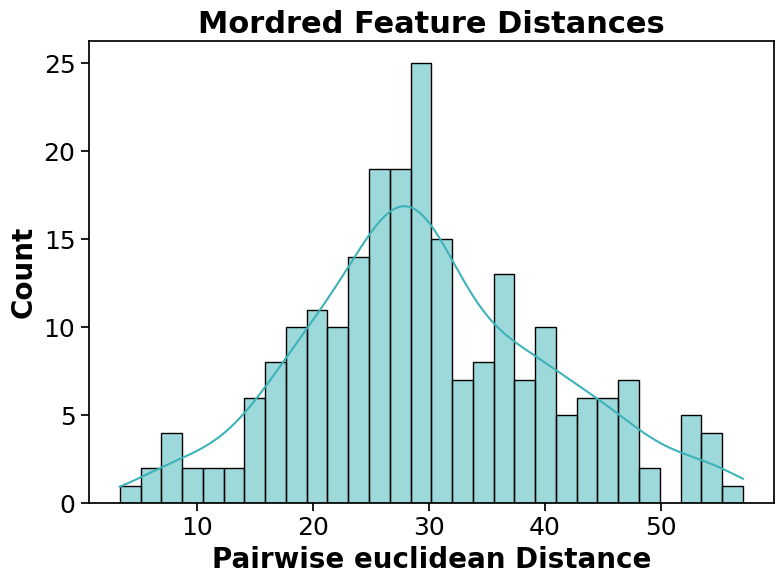

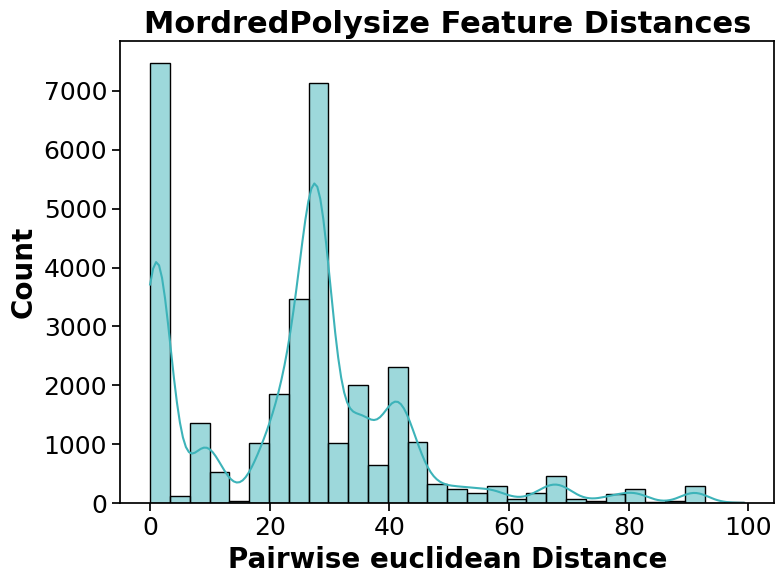

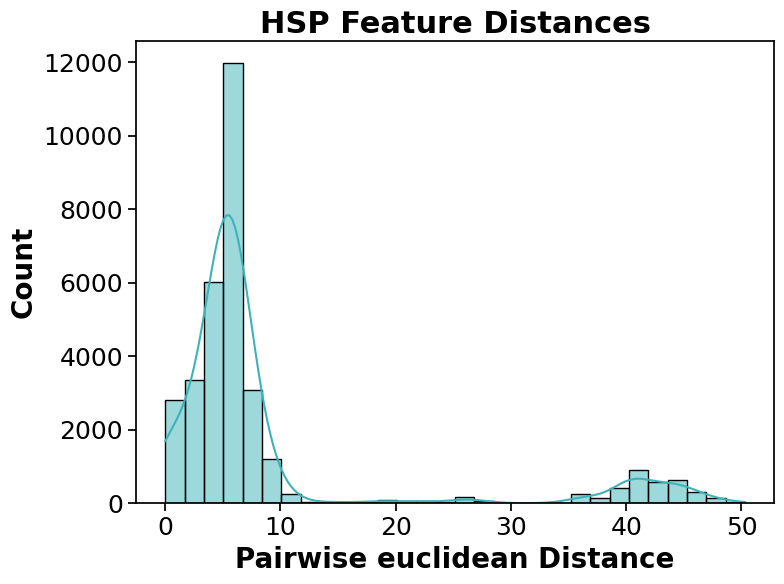

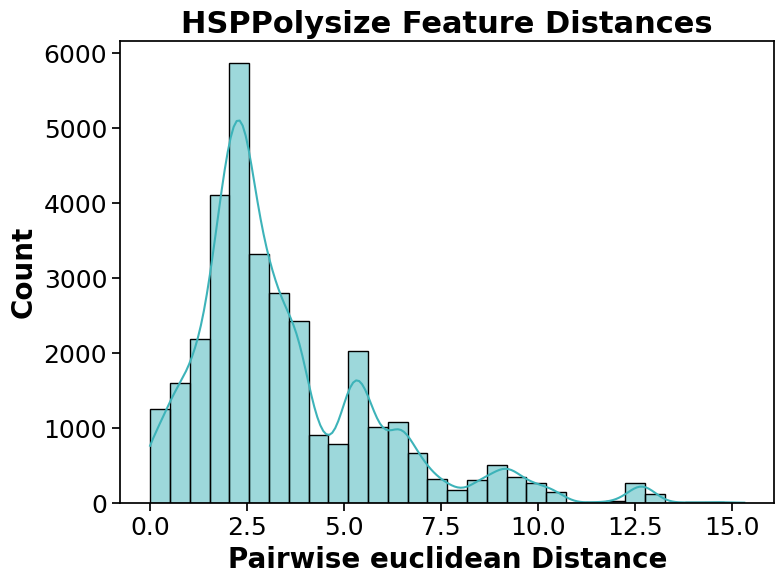

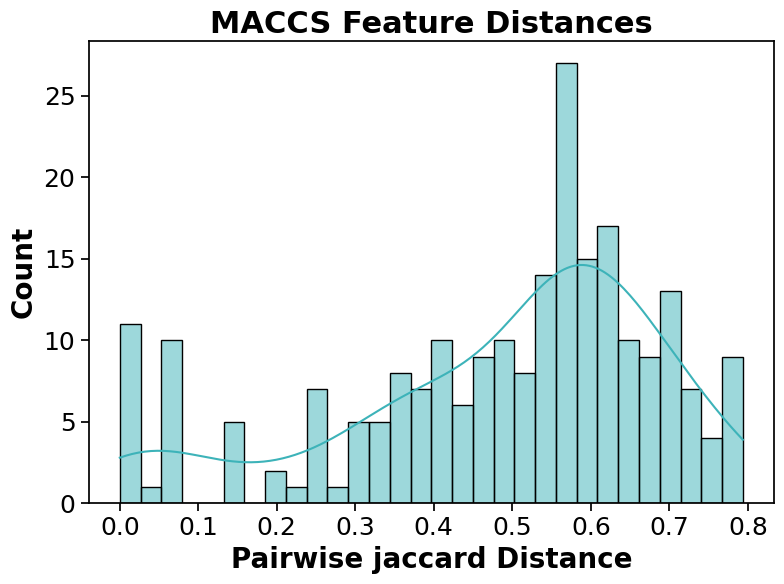

In [43]:
def feature_space_distance_distribution(fp,metric):

    dist_mtrx = pdist(naming[fp], metric=metric)
    plt.figure(figsize=(8, 6))
    sns.histplot(dist_mtrx, bins=30, kde=True,color='#3DB3B9')
    plt.title(f"{fp.split('_')[1]} Feature Distances",fontdict=title_label_format)
    plt.xlabel(f"Pairwise {metric} Distance",fontdict=x_y_label_format)
    plt.ylabel("Count",fontdict=x_y_label_format)
    plt.tick_params(axis='x', **x_y_tick_format)
    plt.tick_params(axis='y', **x_y_tick_format)

    plt.tight_layout()
    plt.show()


feature_space_distance_distribution('Rg_Mordred_vector_unique_scaled','euclidean')
feature_space_distance_distribution('Rg_MordredPolysize_vector_scaled','euclidean')
feature_space_distance_distribution('Rg_HSP_vector','euclidean')
feature_space_distance_distribution('Rg_HSPPolysize_vector_scaled','euclidean')
feature_space_distance_distribution('Rg_MACCS_binary_vector_unique','jaccard')



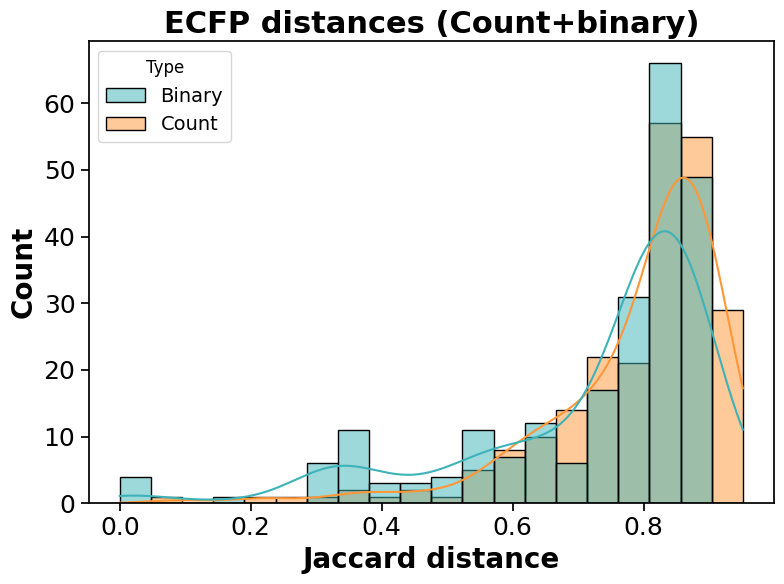

In [44]:
binary_tanimoto_similarities = pdist(Rg_ECFP_binary_vectors_unique, metric="jaccard")
count_tanimoto_similarities = pdist(Rg_ECFP_count_vectors_unique, metric=weighted_jaccard)

# mordred = pdist(Rg_mordred_vector_scaled, metric='euclidean')
data = pd.DataFrame({
    "Similarity": np.concatenate([binary_tanimoto_similarities, count_tanimoto_similarities]),
    "Type": ["Binary"] * len(binary_tanimoto_similarities) + ["Count"] * len(count_tanimoto_similarities)
    # + ["mordred"]*len(mordred)
})
palette = {"Binary": "#3DB3B9", "Count": "#FF9637"}

plt.figure(figsize=(8, 6))
sns.histplot(data, x="Similarity", hue="Type", kde=True, bins=20,palette=palette)
plt.title("ECFP distances (Count+binary)",fontdict=title_label_format)
plt.xlabel("Jaccard distance",fontdict=x_y_label_format)
plt.ylabel("Count", fontdict=x_y_label_format)
plt.tick_params(axis='x', **x_y_tick_format)
plt.tick_params(axis='y', **x_y_tick_format)

plt.tight_layout()
plt.show()

#Analysis and ranking overall

## Molecular representation clustering (similarity based) : ECFP, Mordred, MACCS

In [45]:
# eps_range = np.arange(0.01, 1, 0.04) if 'count' in fp_vector or 'binary' in fp_vector else np.arange(.1, 12, .3)


In [46]:
# 'Rh_ECFP_binary_vectors_unique': Rh_ECFP_binary_vectors_unique,
# 'Rg_ECFP_binary_vectors_unique': Rg_ECFP_binary_vectors_unique,
# 'Rg_MACCS_vector_unique': Rg_MACCS_binary_vector_unique,

Rg_ecfp_vectors_list  = ['Rg_ECFP_count_vectors_unique', 'Rg_ECFP_binary_vectors_unique', 'Rg_MACCS_binary_vector_unique']
# tv_rgrh = ['RgRh_binary_vectors_unique', 'RgRh_count_vectors_unique']


In [47]:
aggregated_ECFP_MACCS_results= save_all_clustering_scores(Rg_ecfp_vectors_list,eps_range=np.arange(0.01, 1, 0.04))
aggregated_ECFP_MACCS_results.shape


weighted_jaccard
Skipping Butina | Rg_ECFP_count_vectors_unique | eps=0.01 due to insufficient clusters.
weighted_jaccard
Skipping Butina | Rg_ECFP_count_vectors_unique | eps=0.05 due to insufficient clusters.
weighted_jaccard
Skipping Butina | Rg_ECFP_count_vectors_unique | eps=0.09 due to insufficient clusters.
weighted_jaccard
Skipping Butina | Rg_ECFP_count_vectors_unique | eps=0.13 due to insufficient clusters.
weighted_jaccard
Skipping Butina | Rg_ECFP_count_vectors_unique | eps=0.17 due to insufficient clusters.
weighted_jaccard
Skipping Butina | Rg_ECFP_count_vectors_unique | eps=0.21000000000000002 due to insufficient clusters.
weighted_jaccard
Skipping Butina | Rg_ECFP_count_vectors_unique | eps=0.25 due to insufficient clusters.
weighted_jaccard
Skipping Butina | Rg_ECFP_count_vectors_unique | eps=0.29000000000000004 due to insufficient clusters.
weighted_jaccard
Skipping Butina | Rg_ECFP_count_vectors_unique | eps=0.33 due to insufficient clusters.
weighted_jaccard
Skipping

KeyboardInterrupt: 

In [ ]:
# aggregated_ECFP_MACCS_results.to_pickle(clustering_folder/'aggregated_ECFP_MACCS_results.pkl')
# aggregated_ECFP_MACCS_results.to_csv(clustering_folder/'aggregated_ECFP_MACCS_results.csv')
aggregated_ECFP_MACCS_results.to_pickle(clustering_folder/'aggregated_ECFP_MACCS_results.pkl')


In [ ]:
def get_best_clustering_scores(score_results:pd.DataFrame):
  columns_to_consider_duplicated = ['target', 'metric', 'clustering method', 'vector', 'number of clusters',
                        'Silhouette score', 'Davies-Bouldin score', 'Calinski-Harabasz score']

  w_data = score_results[score_results['number of clusters'].between(3, 7)]

  grouped = w_data.groupby(
      ['target', 'clustering method' ,'vector', 'number of clusters'])

  best_scores = []

  for name, group in grouped:

      best = group.loc[
          (group['Silhouette score'] == group['Silhouette score'].max()) |
          (group['Davies-Bouldin score'] == group['Davies-Bouldin score'].min()) |
          (group['Calinski-Harabasz score'] == group['Calinski-Harabasz score'].max())
      ]

      best = best.drop_duplicates(subset=columns_to_consider_duplicated, keep='first')

      best_scores.append(best)

  best_scores_df = pd.concat(best_scores, ignore_index=True)
  return best_scores_df


In [ ]:

def plot_clustering_scores(df, feature_to_compare, params,comparison_method):
    score_columns = ['Silhouette score', 'Davies-Bouldin score', 'Calinski-Harabasz score']
    df_1 = df
    grouped = df_1.groupby(feature_to_compare)[score_columns].agg(['max', 'mean']).reset_index()
    methods = grouped[feature_to_compare].astype(str).tolist()
    # print(grouped)
    fig, axes = plt.subplots(1, 3, figsize=(14,6), sharex=True)
    palette = sns.color_palette("tab10")

    for i, score in enumerate(score_columns):
        ax = axes[i]
        ax.bar(grouped[feature_to_compare].astype(str), grouped[(score, 'max')],
              # yerr=[grouped[(score, 'std')], grouped[(score, 'std')]],
               capsize=5, label='Mean with error bars', color=palette)
        # print(grouped[[(score, 'min'),(score, 'max')]])

        ax.set_title(f'{score}',fontsize=20)
        ax.set_xlabel(feature_to_compare,fontdict=x_y_label_format)
        ax.set_ylabel(score,fontdict=x_y_label_format)
        ax.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines for y-axis
        ax.set_xticklabels(grouped[feature_to_compare].astype(str).unique(),rotation=45)
        ax.tick_params(axis='x',**x_y_tick_format)  # set font size here
        ax.tick_params(axis='y',**x_y_tick_format)

    # Set the x-ticks to be string-based and remove gaps

    # target, method, vector = params[0], params[1], params[2]
    target, comp_feature, vector = params
    fig.suptitle(f"target: {target}, {comparison_method}: {comp_feature}, Cluster: {vector}", fontsize=22,fontweight='bold')

    plt.tight_layout()
    plt.show()


In [ ]:
def visualize_cluster_number_and_method(df:pd.DataFrame,comparison_type:str='number of clusters'):
  #
  best_scores_df_grouped = df.groupby(
        ['target', comparison_type, 'vector']
    )
  feature_to_compare = 'clustering method' if comparison_type =='number of clusters' else 'number of clusters'

  for name, group in best_scores_df_grouped:
    # print(type(name))
    plot_clustering_scores(group, feature_to_compare, name,comparison_type)

In [ ]:
def map_to_main_data(main_df:pd.DataFrame,
                     unique_df:pd.DataFrame,
                     column:str,
                     cluster_label:np.ndarray):

  unique_df[column] =  cluster_label
  main_df[column] = main_df["canonical_name"].map(
    unique_df.set_index("canonical_name")[column]
      )


def plot_cluster_count(df: pd.DataFrame, x_label: str, target: str = None, fig_size =(7, 5) ):
    if target:
        main_df = df[df[target].notna()]
    else:
        main_df = df

    plt.figure(figsize=fig_size)
    ax = sns.countplot(x=x_label, data=main_df, palette="Set2")

    # Add labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Add labels and title
    plt.xlabel(f"Cluster Name",fontweight='bold')
    plt.ylabel("Number of datapoints",fontweight='bold')
    # plt.title(f"",fontsize = 16)

    plt.show()


In [ ]:
# map_to_main_data(Rg_data_test, Rg_unique_data_test,'KM4 ECFP6_Count_512bit cluster',KMedoids4_label_Rg_ECFP)
# plot_cluster_count(Rg_data_test,'KM4 ECFP6_Count_512bit cluster',fig_size=(6,5))

In [ ]:
aggregated_ECFP_MACCS_results

target            metric clustering method        vector  \
0       Rg  weighted_jaccard          KMedoids    ECFP_count   
1       Rg  weighted_jaccard          KMedoids    ECFP_count   
2       Rg  weighted_jaccard          KMedoids    ECFP_count   
3       Rg  weighted_jaccard          KMedoids    ECFP_count   
4       Rg  weighted_jaccard          KMedoids    ECFP_count   
..     ...               ...               ...           ...   
378     Rg           jaccard            DBSCAN  MACCS_binary   
379     Rg           jaccard            DBSCAN  MACCS_binary   
380     Rg           jaccard           HDBSCAN  MACCS_binary   
381     Rg           jaccard            DBSCAN  MACCS_binary   
382     Rg           jaccard            DBSCAN  MACCS_binary   

    number of clusters                                      cluster sizes  \
0                    2                              {'C_0': 15, 'C_1': 7}   
1                    3                    {'C_0': 11, 'C_1': 7, 'C_2': 4}   
2                    4           {'C_0': 8, 'C_1': 6, 'C_2': 4, 'C_3': 4}   
3                    5  {'C_0': 8, 'C_1': 6, 'C_2': 3, 'C_3': 4, 'C_4'...   
4                    6  {'C_0': 8, 'C_1': 6, 'C_2': 3, 'C_3': 3, 'C_4'...   
..                 ...                                                ...   
378                  2                             {'C_-1': 4, 'C_0': 18}   
379                  2                             {'C_-1': 1, 'C_0': 21}   
380                  3                    {'C_-1': 7, 'C_0': 6, 'C_1': 9}   
381                  2                             {'C_-1': 1, 'C_0': 21}   
382                  2                             {'C_-1': 1, 'C_0': 21}   

                                             threshold  Silhouette score  \
0                                                 None          0.147298   
1                                                 None          0.185267   
2                                                 None          0.235876   
3                                                 None          0.247255   
4                                                 None          0.234365   
..                                                 ...               ...   
378                {'eps': 0.45, 'min sample/size': 6}          0.282948   
379                {'eps': 0.49, 'min sample/size': 4}          0.205229   
380  {'min sample/size': 4, 'cluster selection epsi...          0.375504   
381                {'eps': 0.49, 'min sample/size': 5}          0.205229   
382                {'eps': 0.49, 'min sample/size': 6}          0.205229   

     Davies-Bouldin score  Calinski-Harabasz score  
0                0.854717                22.323322  
1                1.646167                12.211885  
2                1.468436                11.778082  
3                1.068509                11.890661  
4                1.001183                 9.406922  
..                    ...                      ...  
378              1.856172                 3.981503  
379              0.593051                 2.351429  
380              1.723140                 5.937479  
381              0.593051                 2.351429  
382              0.593051                 2.351429  

[383 rows x 10 columns]

In [ ]:
ecfp_maccs_best_scores = get_best_clustering_scores(aggregated_ECFP_MACCS_results)


In [ ]:
def plot_clustering_score_heatmap(df:pd.DataFrame)-> None:

  melted = df.melt(
      id_vars=['target', 'clustering method', 'vector','number of clusters'
                ],
      value_vars=['Silhouette score', 'Davies-Bouldin score', 'Calinski-Harabasz score'],
      var_name='score_name',
      value_name='score_value'
  )

  group_cols = ['target', 'clustering method', 'vector','number of clusters',
                'score_name']
  agg = melted.groupby(group_cols)['score_value'].agg(['mean', 'std']).reset_index()


  agg['annot'] = agg.apply(
      lambda row: f"{row['mean']:.2f}\n±{row['std']:.2f}" if not np.isnan(row['std']) and row['std'] > 0
      else f"{row['mean']:.2f}", axis=1
  )

  vectors = agg['vector'].unique()
  score_cols = ['Silhouette score', 'Davies-Bouldin score', 'Calinski-Harabasz score']

  for vector in vectors:
      df_vector = agg[agg['vector'] == vector]

      for score in score_cols:
          df_score = df_vector[df_vector['score_name'] == score]

          pivot = df_score.pivot_table(
              index='clustering method',
              columns='number of clusters',
              values='mean'
          )

          annot = df_score.pivot_table(
              index='clustering method',
              columns='number of clusters',
              values='annot',
              aggfunc='first'  # or ' '.join if you expect duplicates
          )

          cmap = 'viridis_r' if score == 'Davies-Bouldin score' else 'viridis'

          # if score == 'Silhouette score':
          #     # vmin = pivot.min().min()
          #     # vmax = pivot.max().max()
          #     # ticks = np.round(np.linspace(vmin, vmax, 4),2)
          # elif score == 'Davies-Bouldin score':
          #     vmin = pivot.min().min()-.2
          #     vmax = pivot.max().max()+.2
          #     ticks = np.round(np.linspace(vmin, vmax, 5),1)
          # elif score == 'Calinski-Harabasz score':
          #     vmin = pivot.min().min()-.2
          #     vmax = pivot.max().max()+.2
          #     ticks = np.round(np.linspace(vmin, vmax, 5),1)
          # else:
          #     vmin, vmax, ticks = None, None, None  # fallback

          annot_fontsize = 16  if pivot.max().max() <100 else 14
          # print(annot_fontsize)
          plt.figure(figsize=(8, 5))
          ax = sns.heatmap(
              pivot,
              annot=annot,
              fmt='',
              cmap=cmap,
              # vmin=vmin,
              # vmax=vmax,
              cbar_kws={
                  'label': score,
                  # 'ticks': ticks,
                  # 'boundaries': np.linspace(vmin, vmax, 100)
              },
              linewidths=0.5,
              linecolor='lightgray',
              mask=pivot.isna(),
              square=True,
              annot_kws={"fontsize":annot_fontsize}
          )
                    # Get the colorbar and limit ticks to 4
          cbar = ax.collections[0].colorbar
          cbar_ticks = np.linspace(cbar.vmin, cbar.vmax, 4)
          cbar.set_ticks(cbar_ticks)
          cbar.set_ticklabels([f"{tick:.2f}" for tick in cbar_ticks])  # Optional: Format labels
          gray_mask = pivot.isna()
          for y in range(pivot.shape[0]):
              for x in range(pivot.shape[1]):
                  if gray_mask.iloc[y, x]:
                      ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color='lightgray', ec='lightgray'))

          plt.title(f"{vector}", fontsize=16,fontweight='bold',pad=20)
          plt.xlabel("Number of Clusters",fontweight='bold')
          plt.ylabel("Clustering Method",fontweight='bold')
          plt.yticks(rotation=0)

          plt.tight_layout()
          plt.show()

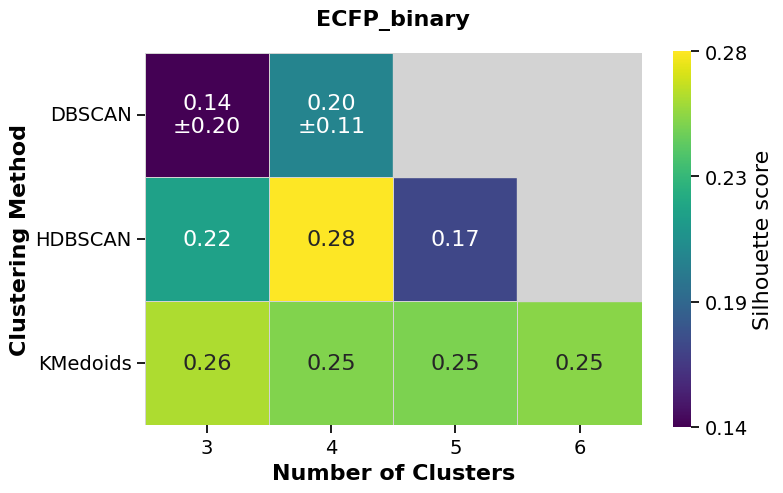

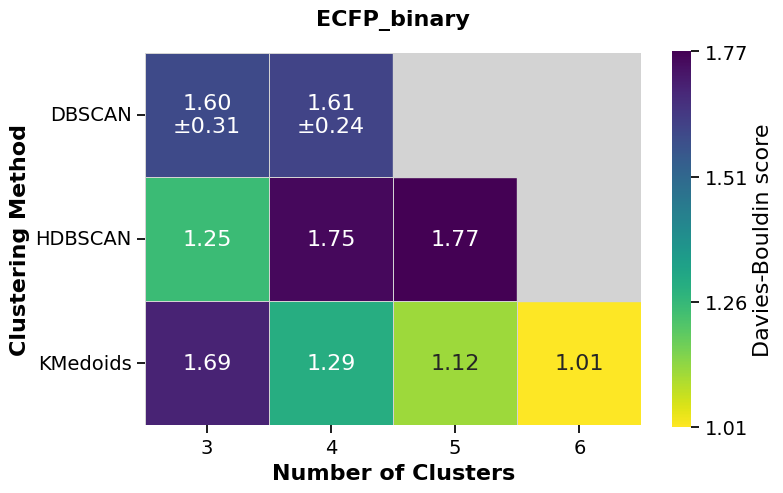

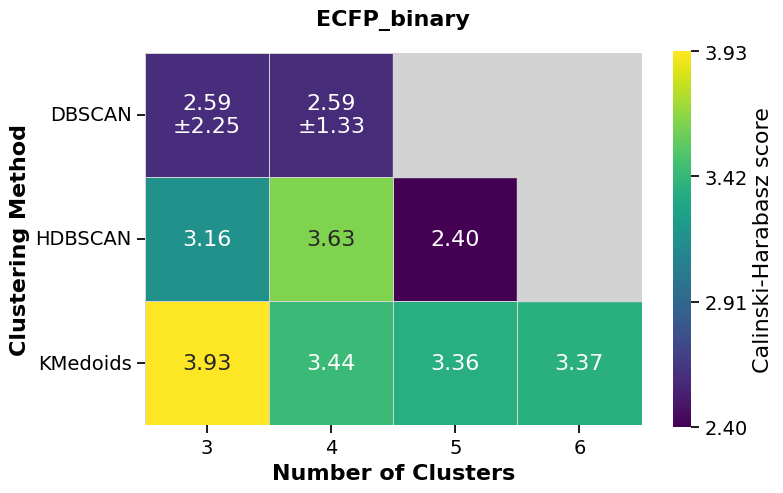

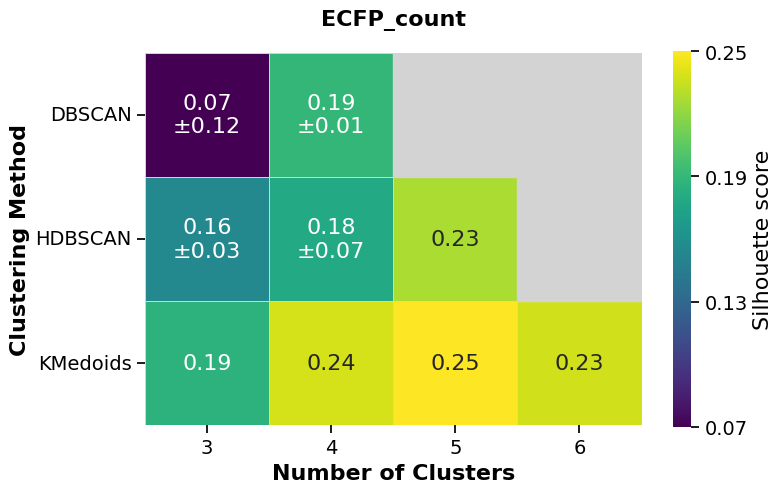

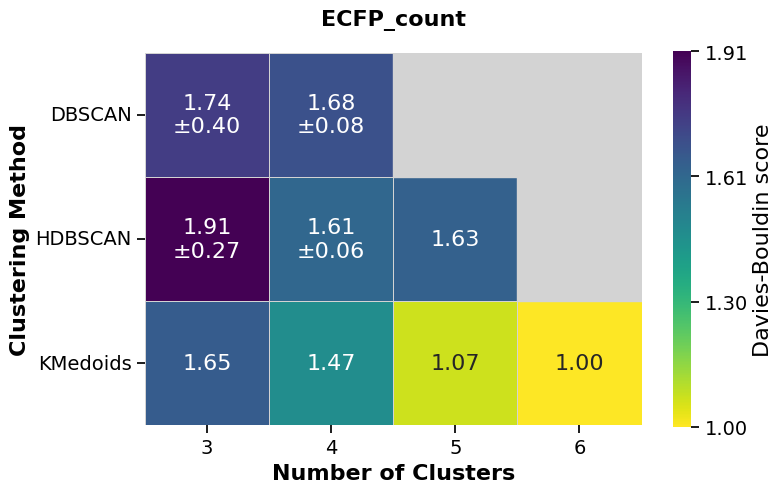

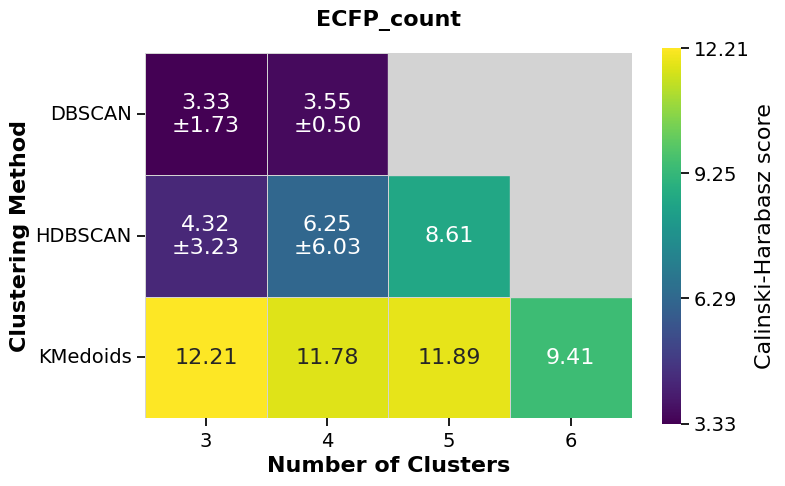

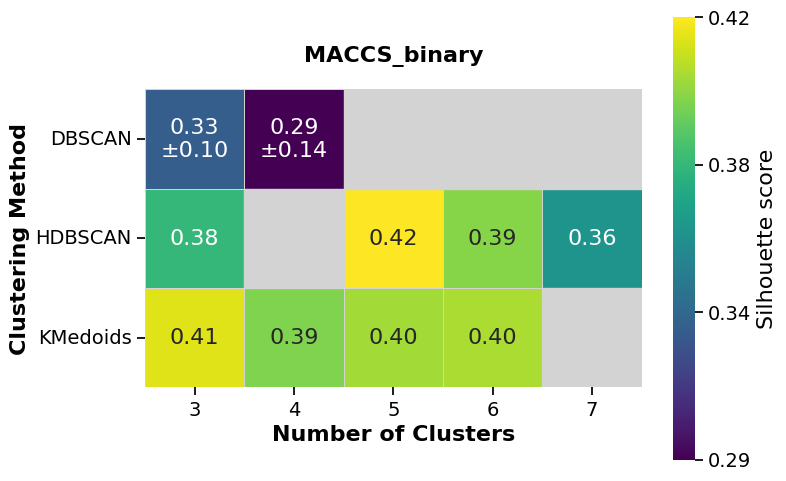

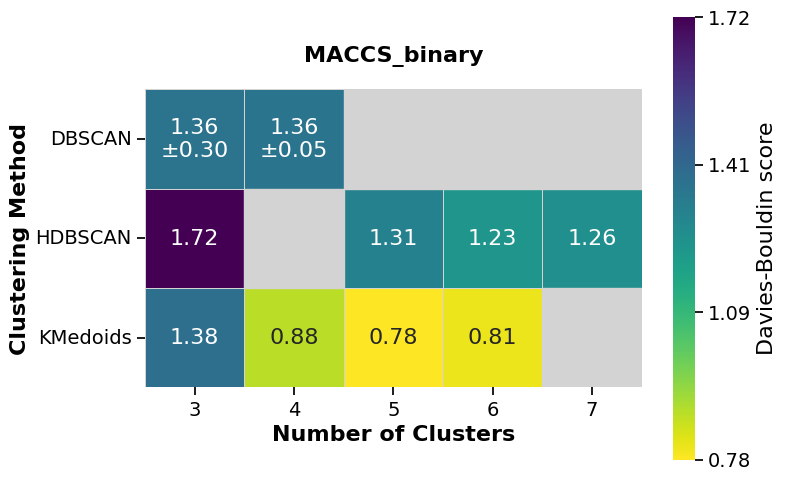

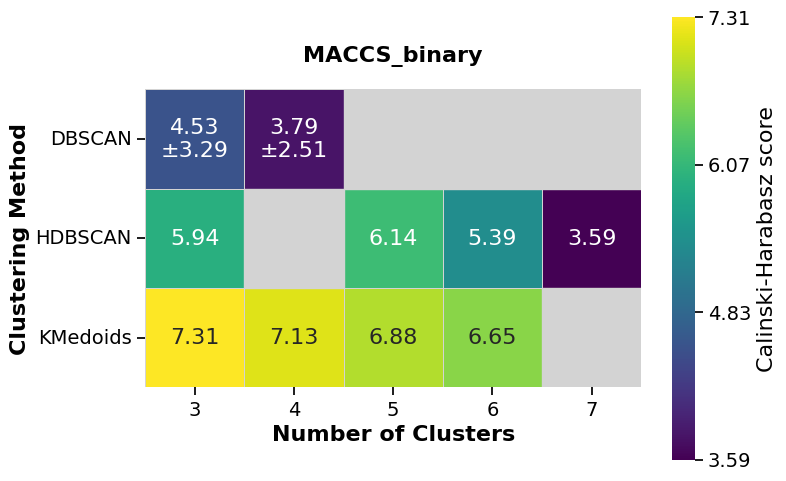

In [ ]:
plot_clustering_score_heatmap(ecfp_maccs_best_scores)

In [ ]:
# visualize_cluster_number_and_method(ecfp_maccs_best_scores,'number of clusters')

In [ ]:
# visualize_cluster_number_and_method(ecfp_maccs_best_scores,'clustering method')

In [ ]:
Rg_data_test = Rg_data.copy()
Rg_unique_data_test = Rg_unique_data.copy()

In [ ]:
# map_to_main_data(Rg_data_test, Rg_unique_data_test,'KM4 ECFP6_Count_512bit cluster',KMedoids4_label_Rg_count)
# plot_count(Rg_data,'KM4 ECFP6_Count_512bit cluster',"Rg1 (nm)")

weighted_jaccard
Silhouette score: 0.24
Davies-Bouldin score: 1.47
Calinski-Harabasz score: 11.78


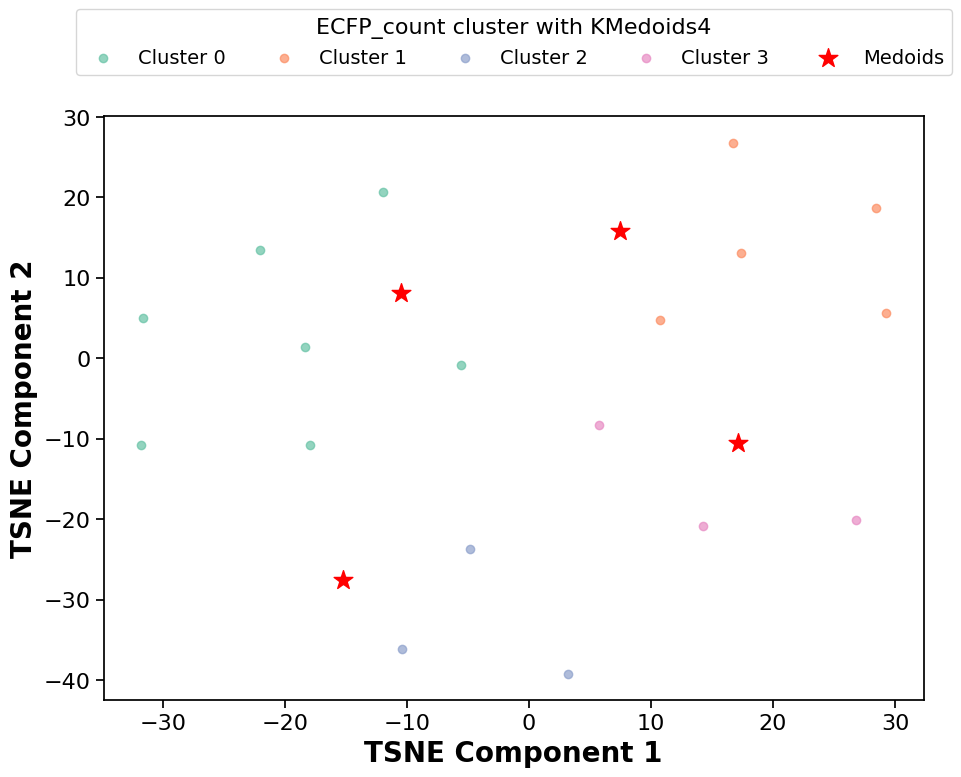

weighted_jaccard
Silhouette score: 0.25
Davies-Bouldin score: 1.07
Calinski-Harabasz score: 11.89


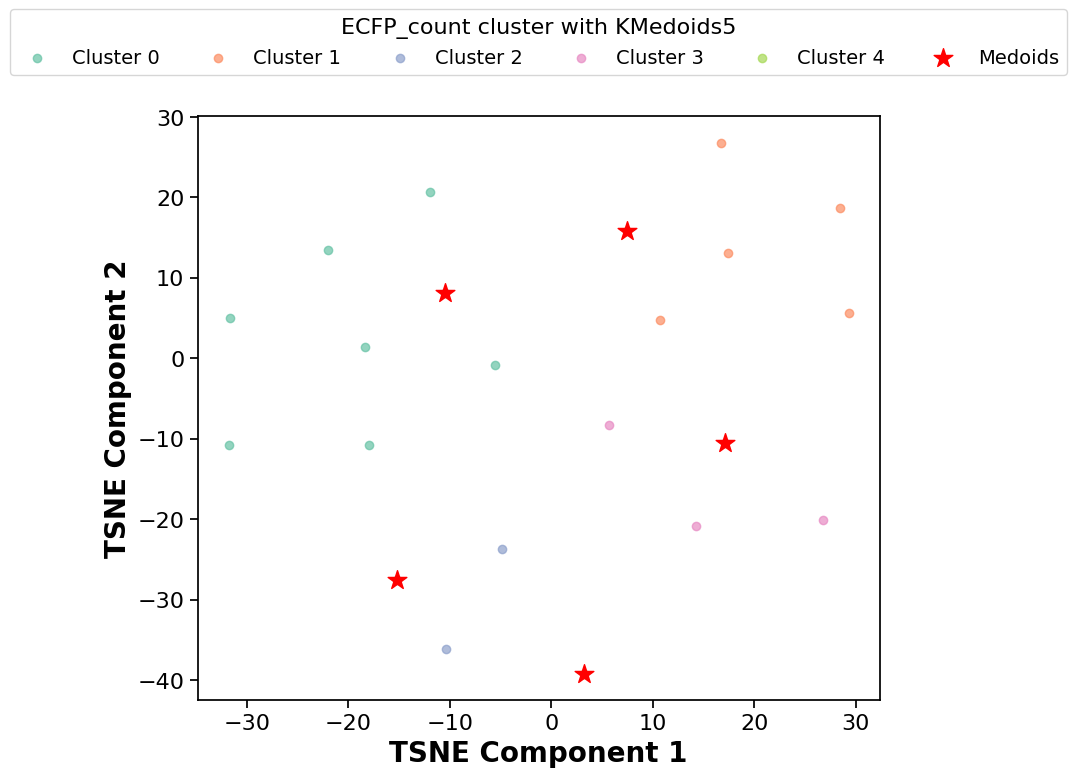

In [ ]:
k4_Rg_ECFP, KMedoids4_label_Rg_ECFP, medoids4_Rg_ECFP, km4_tsne_Rg_ECFP = get_clusters(
                  fp='Rg_ECFP_count_vectors_unique',
                  method='KMedoids',
                  n_clusters=4,
                  plotting=True,
                  get_label=True,
                  perplexity=15,
                  loc = 'upper center'
                  )


k5_Rg_ECFP, KMedoids5_label_Rg_ECFP, medoids5_Rg_ECFP, km5_tsne_Rg_ECFP = get_clusters(
                  fp='Rg_ECFP_count_vectors_unique',
                  method='KMedoids',
                  n_clusters=5,
                  plotting=True,
                  get_label=True,
                  perplexity=15,
                  loc = 'upper center'
                  )

jaccard
Silhouette score: 0.4
Davies-Bouldin score: 1.3
Calinski-Harabasz score: 8.72


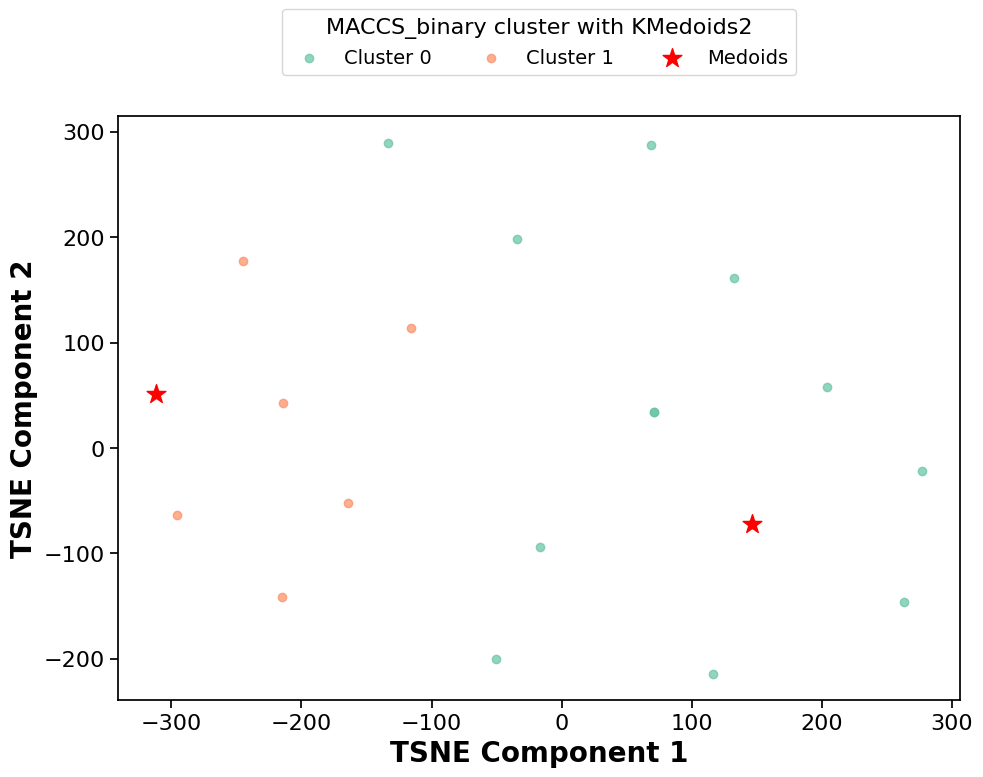

In [ ]:
k3_Rg_maccs, KMedoids3_label_Rg_maccs, medoids3_Rg_maccs, km3_tsne_Rg_maccs = get_clusters(
                  fp='Rg_MACCS_binary_vector_unique',
                  method='KMedoids',
                  n_clusters=2,
                  plotting=True,
                  get_label=True,
                  perplexity=15,
                  loc = 'upper center'
                  )

jaccard
Silhouette score: 0.38
Davies-Bouldin score: 1.72
Calinski-Harabasz score: 5.94


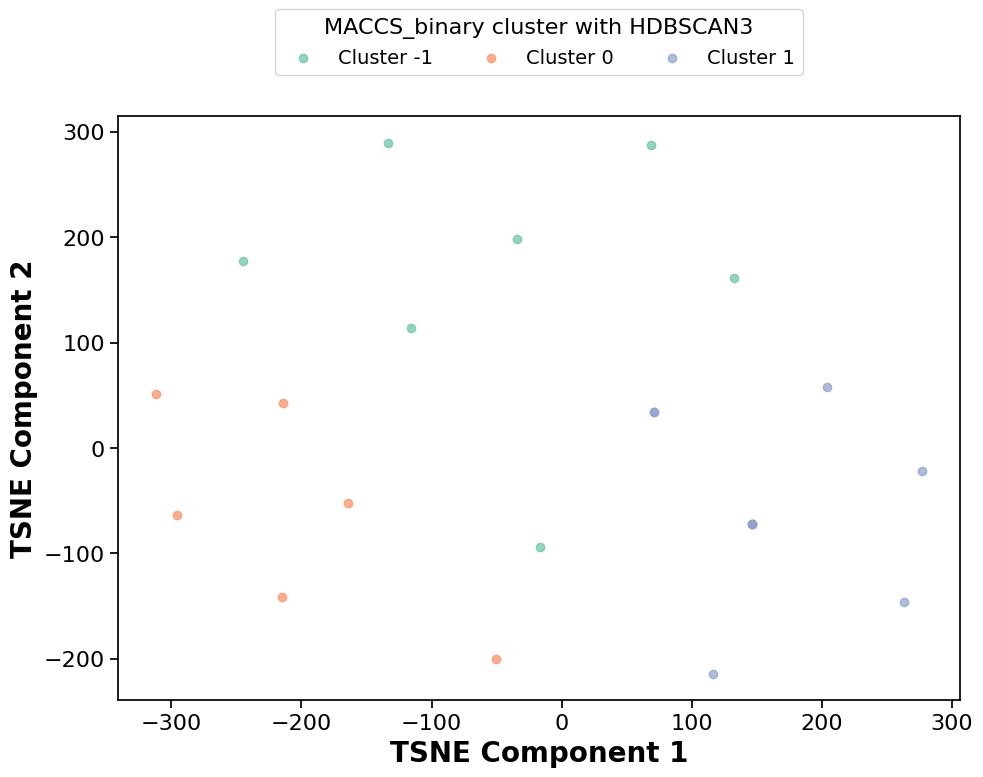

In [ ]:
HBD3_Rg_maccs, HBD3_label_Rg_maccs, HBD3_tsne_Rg_maccs = get_clusters(
                  fp='Rg_MACCS_binary_vector_unique',
                  method='HDBSCAN',
                  min_cluster_size=3,
                  cluster_selection_epsilon=.01,
                  plotting=True,
                  get_label=True,
                  perplexity=15,
                  loc = 'upper center'
                  )

jaccard
Silhouette score: 0.42
Davies-Bouldin score: 1.31
Calinski-Harabasz score: 6.14


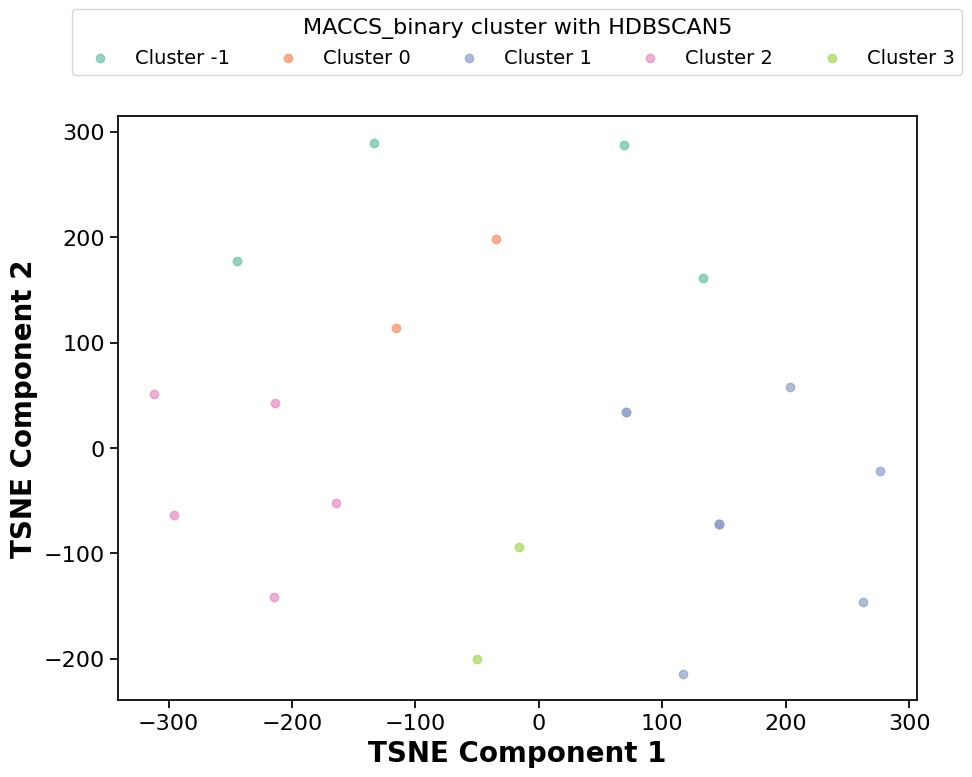

In [ ]:
HBD5_Rg_maccs, HBD5_label_Rg_maccs, HBD5_tsne_Rg_maccs = get_clusters(
                  fp='Rg_MACCS_binary_vector_unique',
                  method='HDBSCAN',
                  min_cluster_size=2,
                  cluster_selection_epsilon=.25,
                  plotting=True,
                  get_label=True,
                  perplexity=15,
                  loc = 'upper center'
                  )

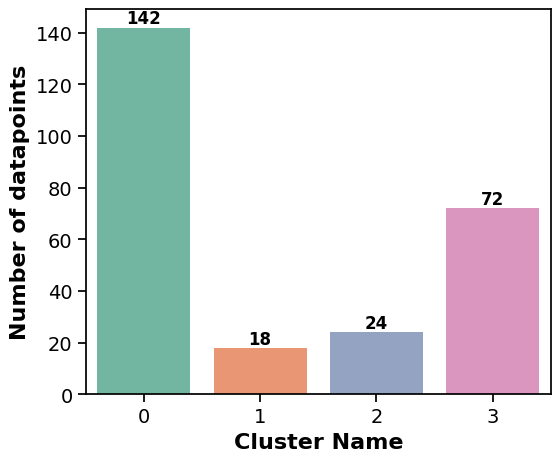

In [ ]:
map_to_main_data(Rg_data_test, Rg_unique_data_test,'KM4 ECFP6_Count_512bit cluster',KMedoids4_label_Rg_ECFP)
plot_cluster_count(Rg_data_test,'KM4 ECFP6_Count_512bit cluster',fig_size=(6,5))

In [ ]:
Rg_data_test

name  Mw (g/mol)  Mn (g/mol)       PDI Regioregularity R%    DP  \
0     MEH-PPV    611000.0         NaN  1.965375                NaN  2350   
1     BEH-PPV    306000.0         NaN  1.965375                NaN   854   
2    BCHA-PPV    920000.0         NaN  1.965375                NaN  1055   
3         PFO     46000.0         NaN  1.965375                NaN   NaN   
4         PFO     46000.0         NaN  1.965375                NaN   NaN   
..        ...         ...         ...       ...                ...   ...   
251      P3HT     24000.0     16000.0  1.500000                NaN   NaN   
252      P3HT     24000.0     16000.0  1.500000                NaN   NaN   
253      P3HT     24000.0     16000.0  1.500000                NaN   NaN   
254      P3HT     24000.0     16000.0  1.500000                NaN   NaN   
255      P3HT     24000.0     16000.0  1.500000                NaN   NaN   

     SANS  SAXS/GWAXS  DLS  SLS  ...  solvent dH  polymer dH        Ra  \
0       0           0  1.0    1  ...       3.100         4.0  2.774887   
1       0           0  1.0    1  ...       3.100         3.1  2.193171   
2       0           0  1.0    1  ...       3.100         1.0  2.714774   
3       0           0  1.0    1  ...       2.522         0.9  2.150719   
4       0           0  1.0    1  ...       3.044         0.9  2.568962   
..    ...         ...  ...  ...  ...         ...         ...       ...   
251     0           0  1.0    1  ...       8.000         4.3  5.209607   
252     0           0  1.0    1  ...       8.000         4.3  5.209607   
253     0           0  1.0    1  ...       8.000         4.3  5.209607   
254     0           0  1.0    1  ...       8.000         4.3  5.209607   
255     0           0  1.0    1  ...       8.000         4.3  5.209607   

     abs(solvent dD - polymer dD)  abs(solvent dP - polymer dP)  \
0                           0.400                         2.500   
1                           0.800                         1.500   
2                           0.500                         1.400   
3                           0.634                         0.622   
4                           0.568                         0.844   
..                            ...                           ...   
251                         0.800                         3.300   
252                         0.800                         3.300   
253                         0.800                         3.300   
254                         0.800                         3.300   
255                         0.800                         3.300   

     abs(solvent dH - polymer dH)  log Rg (nm)  \
0                           0.900     1.719331   
1                           0.000     1.624282   
2                           2.100     1.964260   
3                           1.622     1.721151   
4                           2.144     1.822560   
..                            ...          ...   
251                         3.700     1.895975   
252                         3.700     1.948413   
253                         3.700     1.943495   
254                         3.700     1.962369   
255                         3.700     1.962369   

    Merged Stirring /sonication/heating time(min)           Xn  \
0                                             0.0  2346.597434   
1                                             0.0   853.399374   
2                                             0.0  1018.242027   
3                                             0.0   118.361770   
4                                             0.0   118.361770   
..                                            ...          ...   
251                                           0.0   144.327045   
252                                           0.0   144.327045   
253                                           0.0   144.327045   
254                                           0.0   144.327045   
255                                           0.0   144.327045   

     KM4

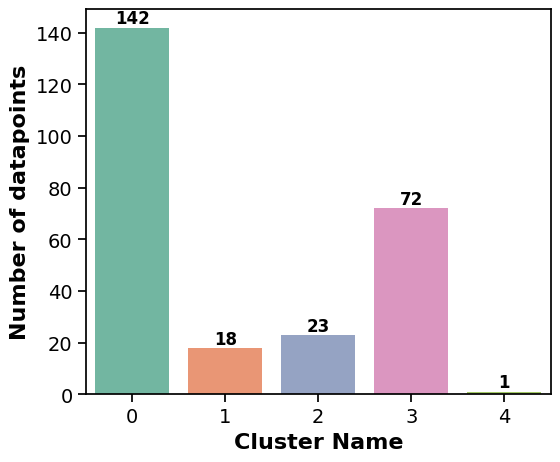

In [ ]:
map_to_main_data(Rg_data_test, Rg_unique_data_test,'KM5 ECFP6_Count_512bit cluster',KMedoids5_label_Rg_ECFP)
plot_cluster_count(Rg_data_test,'KM5 ECFP6_Count_512bit cluster',fig_size=(6,5))

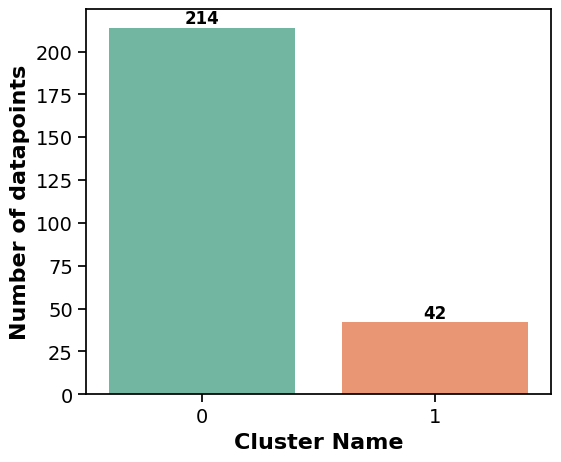

In [ ]:
map_to_main_data(Rg_data_test, Rg_unique_data_test,'KM3 MACCS cluster',KMedoids3_label_Rg_maccs)
plot_cluster_count(Rg_data_test,'KM3 MACCS cluster',fig_size=(6,5))

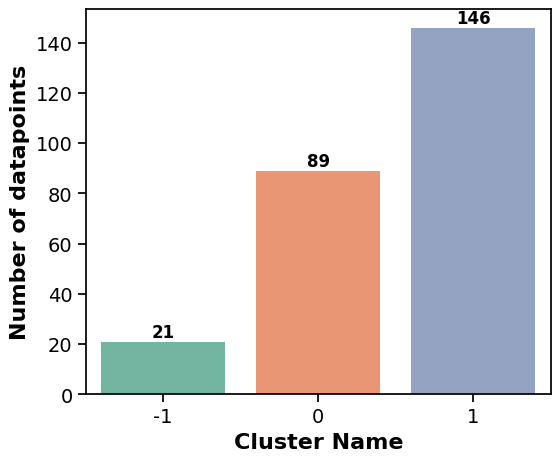

In [ ]:
map_to_main_data(Rg_data_test, Rg_unique_data_test,'HBD3 MACCS cluster',HBD3_label_Rg_maccs)
plot_cluster_count(Rg_data_test,'HBD3 MACCS cluster',fig_size=(6,5))

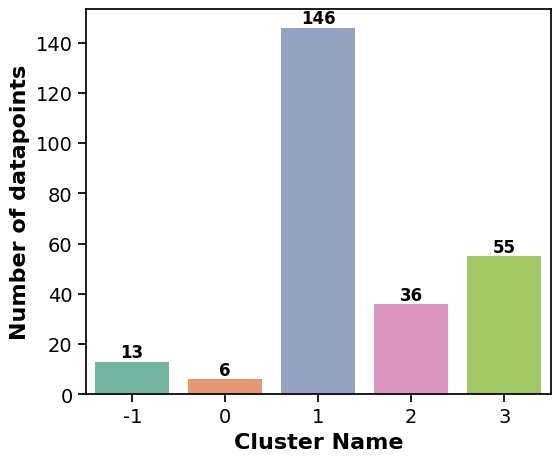

In [ ]:
map_to_main_data(Rg_data_test, Rg_unique_data_test,'HBD5 MACCS cluster',HBD5_label_Rg_maccs)
plot_cluster_count(Rg_data_test,'HBD5 MACCS cluster',fig_size=(6,5))

### Modred, HSP, HSPpolysize

In [ ]:
Rg_mordred_hsp_polysiz_list = ['Rg_Mordred_vector_unique_scaled','Rg_HSP_vector','Rg_HSPPolysize_vector_scaled']

In [ ]:
aggregated_msp_results = save_all_clustering_scores(Rg_mordred_hsp_polysiz_list,eps_range=np.arange(0.01, 60, 0.3))
aggregated_msp_results.shape

Streaming output truncated to the last 5000 lines.
Calinski-Harabasz score: 1084.68
euclidean
Silhouette score: 0.87
Davies-Bouldin score: 0.26
Calinski-Harabasz score: 1084.68
euclidean
Silhouette score: 0.87
Davies-Bouldin score: 0.26
Calinski-Harabasz score: 1084.68
euclidean
Silhouette score: 0.87
Davies-Bouldin score: 0.26
Calinski-Harabasz score: 1084.68
euclidean
Silhouette score: 0.87
Davies-Bouldin score: 0.26
Calinski-Harabasz score: 1084.68
euclidean
Silhouette score: 0.87
Davies-Bouldin score: 0.26
Calinski-Harabasz score: 1084.68
euclidean
Silhouette score: 0.87
Davies-Bouldin score: 0.26
Calinski-Harabasz score: 1084.68
euclidean
Silhouette score: 0.87
Davies-Bouldin score: 0.26
Calinski-Harabasz score: 1084.68
euclidean
Silhouette score: 0.87
Davies-Bouldin score: 0.26
Calinski-Harabasz score: 1084.68
euclidean
Silhouette score: 0.87
Davies-Bouldin score: 0.26
Calinski-Harabasz score: 1084.68
euclidean
Silhouette score: 0.87
Davies-Bouldin score: 0.26
Calinski-Harabasz s

(2278, 10)

In [ ]:
# aggregated_msp_results.to_pickle(clustering_folder/'aggregated_modred_HSPPolysize_HSP_results.pkl')
# aggregated_msp_results.to_csv(clustering_folder/'aggregated_modred_HSPPolysize_HSP_results.csv')
aggregated_msp_results.to_pickle(clustering_folder/'aggregated_modred_HSPPolysize_HSP_results.pkl')

In [ ]:
msp_best_scores = get_best_clustering_scores(aggregated_msp_results)
# visualize_cluster_number_and_method(msp_best_scores,'number of clusters')
# visualize_cluster_number_and_method(msp_best_scores,'clustering method')

In [ ]:
msp_best_scores[msp_best_scores['vector']=='HSP']

target            metric clustering method vector number of clusters  \
0      Rg  manual_euclidean            Butina    HSP                  3   
1      Rg  manual_euclidean            Butina    HSP                  4   
2      Rg  manual_euclidean            Butina    HSP                  5   
3      Rg  manual_euclidean            Butina    HSP                  6   
4      Rg  manual_euclidean            Butina    HSP                  6   
5      Rg  manual_euclidean            Butina    HSP                  7   
17     Rg         euclidean            DBSCAN    HSP                  3   
18     Rg         euclidean            DBSCAN    HSP                  3   
19     Rg         euclidean            DBSCAN    HSP                  4   
20     Rg         euclidean            DBSCAN    HSP                  4   
21     Rg         euclidean            DBSCAN    HSP                  5   
22     Rg         euclidean            DBSCAN    HSP                  6   
38     Rg         euclidean   GaussianMixture    HSP                  3   
39     Rg         euclidean   GaussianMixture    HSP                  4   
40     Rg         euclidean   GaussianMixture    HSP                  5   
41     Rg         euclidean   GaussianMixture    HSP                  6   
50     Rg         euclidean           HDBSCAN    HSP                  3   
51     Rg         euclidean           HDBSCAN    HSP                  4   
52     Rg         euclidean           HDBSCAN    HSP                  5   
53     Rg         euclidean           HDBSCAN    HSP                  6   
66     Rg         euclidean          KMedoids    HSP                  3   
67     Rg         euclidean          KMedoids    HSP                  4   
68     Rg         euclidean          KMedoids    HSP                  5   
69     Rg         euclidean          KMedoids    HSP                  6   

                                        cluster sizes  \
0                   {'C_0': 241, 'C_1': 14, 'C_2': 1}   
1          {'C_0': 241, 'C_1': 9, 'C_2': 5, 'C_3': 1}   
2   {'C_0': 240, 'C_1': 9, 'C_2': 5, 'C_3': 1, 'C_...   
3   {'C_0': 233, 'C_1': 7, 'C_2': 9, 'C_3': 5, 'C_...   
4   {'C_0': 235, 'C_1': 5, 'C_2': 9, 'C_3': 5, 'C_...   
5   {'C_0': 227, 'C_1': 8, 'C_2': 5, 'C_3': 9, 'C_...   
17                  {'C_-1': 6, 'C_0': 241, 'C_1': 9}   
18                 {'C_-1': 1, 'C_0': 241, 'C_1': 14}   
19        {'C_-1': 2, 'C_0': 240, 'C_1': 5, 'C_2': 9}   
20        {'C_-1': 1, 'C_0': 241, 'C_1': 5, 'C_2': 9}   
21  {'C_-1': 2, 'C_0': 229, 'C_1': 5, 'C_2': 9, 'C...   
22  {'C_-1': 2, 'C_0': 210, 'C_1': 5, 'C_2': 9, 'C...   
38                 {'C_0': 156, 'C_1': 14, 'C_2': 86}   
39      {'C_0': 107, 'C_1': 14, 'C_2': 77, 'C_3': 58}   
40  {'C_0': 88, 'C_1': 14, 'C_2': 77, 'C_3': 64, '...   
41  {'C_0': 88, 'C_1': 9, 'C_2': 77, 'C_3': 64, 'C...   
50                   {'C_0': 242, 'C_1': 5, 'C_2': 9}   
51      {'C_-1': 2, 'C_0': 14, 'C_1': 229, 'C_2': 11}   
52  {'C_-1': 2, 'C_0': 5, 'C_1': 9, 'C_2': 229, 'C...   
53  {'C_-1': 2, 'C_0': 5, 'C_1': 9, 'C_2': 11, 'C_...   
66                 {'C_0': 95, 'C_1': 14, 'C_2': 147}   
67       {'C_0': 95, 'C_1': 14, 'C_2': 83, 'C_3': 64}   
68  {'C_0': 90, 'C_1': 14, 'C_2': 45, 'C_3': 44, '...   
69  {'C_0': 90, 'C_1': 9, 'C_2': 45, 'C_3': 5, 'C_...   

                                            threshold  Silhouette score  \
0                                      {'eps': 15.01}          0.803541   
1                         {'eps': 14.409999999999998}          0.812652   
2                          {'eps': 7.209999999999999}          0.761361   
3                                       {'eps': 6.31}          0.346025   
4                          {'eps': 6.609999999999999}          0.361063   
5                                       {'eps': 5.71}          0.282215   
17  {'eps': 14.409999999999998, 'min sample/size': 6}          0.865421   
18               {'eps': 15.01, 'min sample/size': 2}          0.803541   
19                {'eps': 

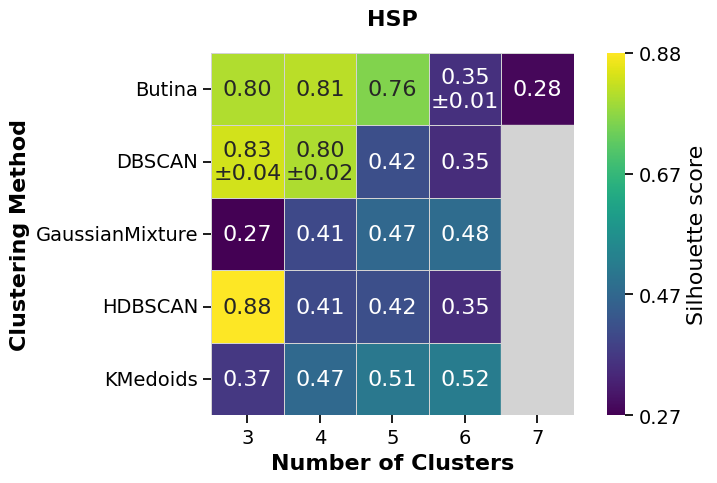

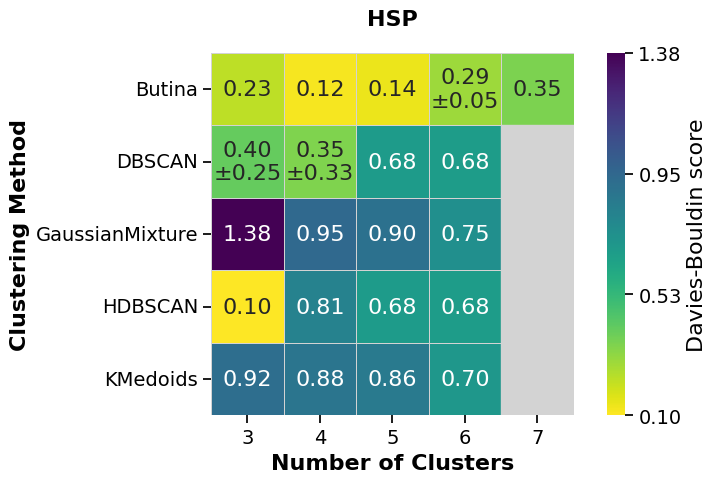

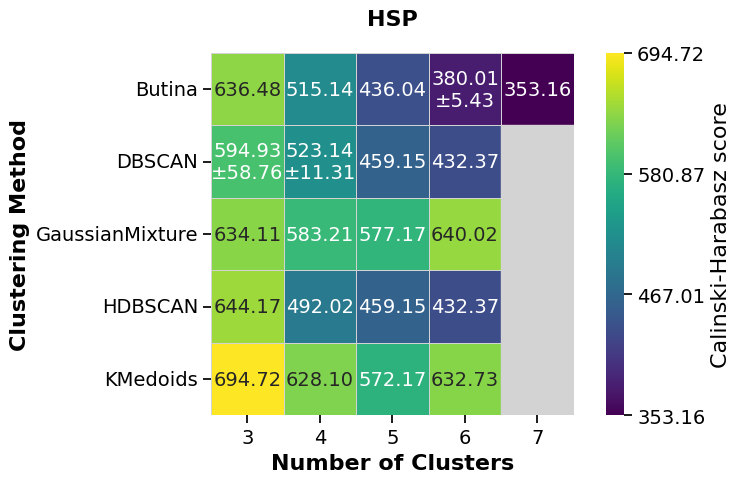

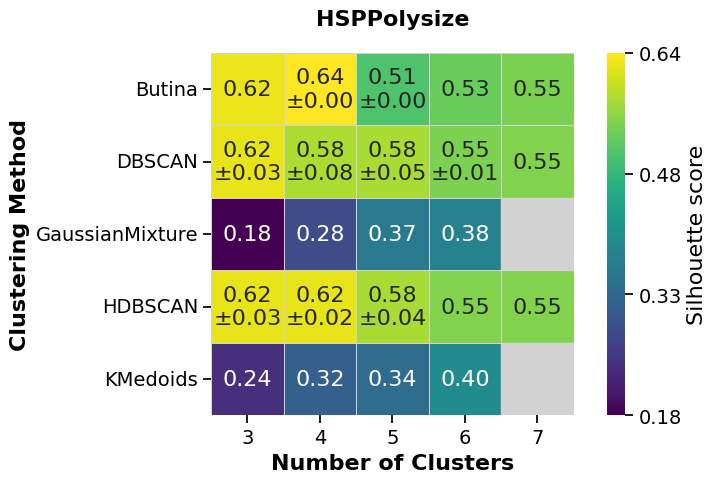

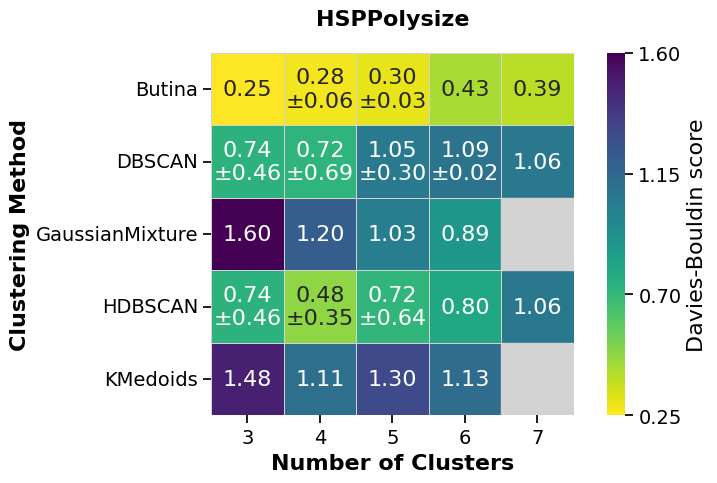

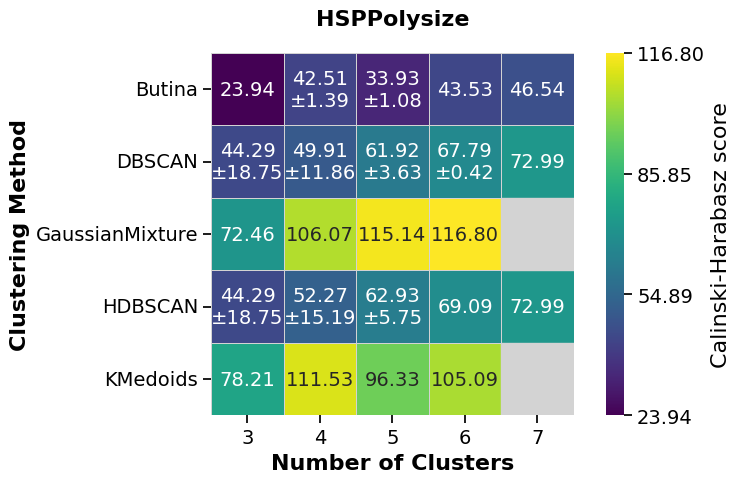

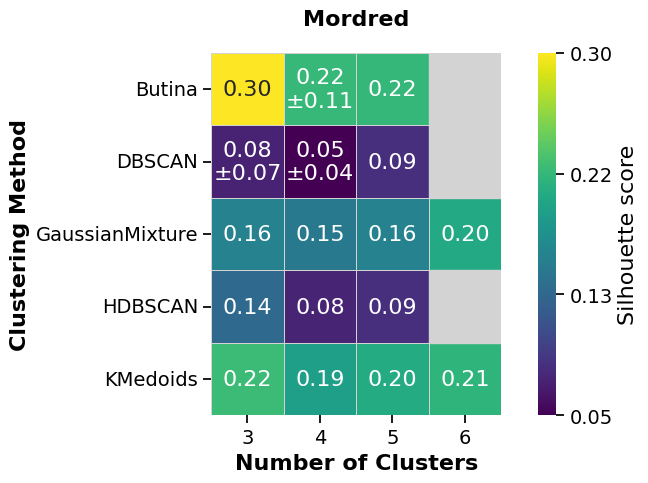

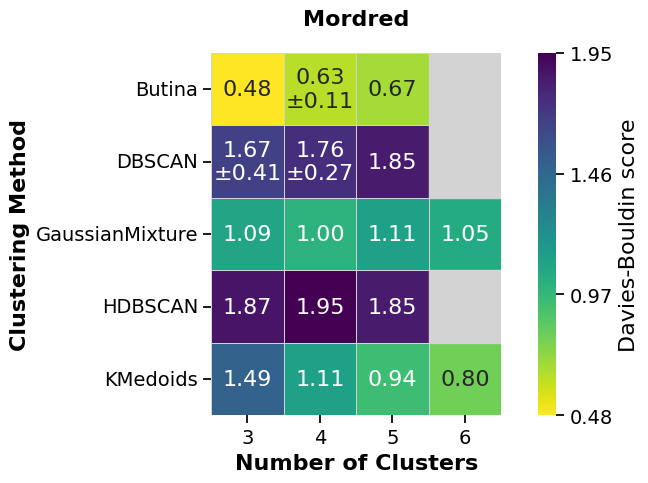

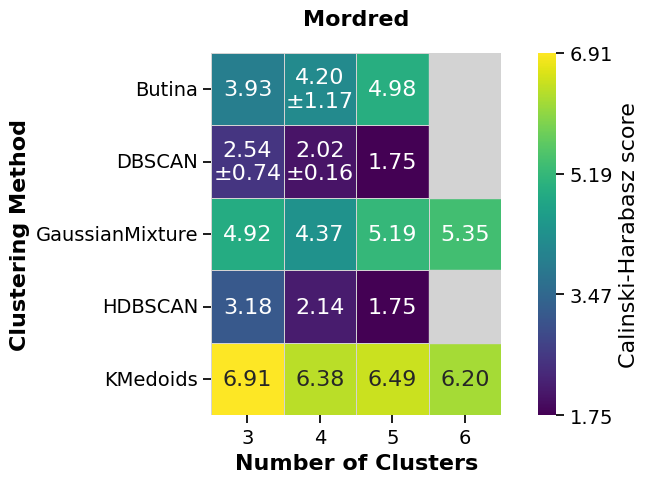

In [ ]:
plot_clustering_score_heatmap(msp_best_scores)

In [ ]:
# map_to_main_data(Rg_data_test, Rg_unique_data_test,'KM4 ECFP6_Count_512bit cluster',KMedoids4_label_Rg_count)
# plot_count(Rg_data,'KM4 ECFP6_Count_512bit cluster',"Rg1 (nm)")

euclidean
Silhouette score: 0.22
Davies-Bouldin score: 1.49
Calinski-Harabasz score: 6.91


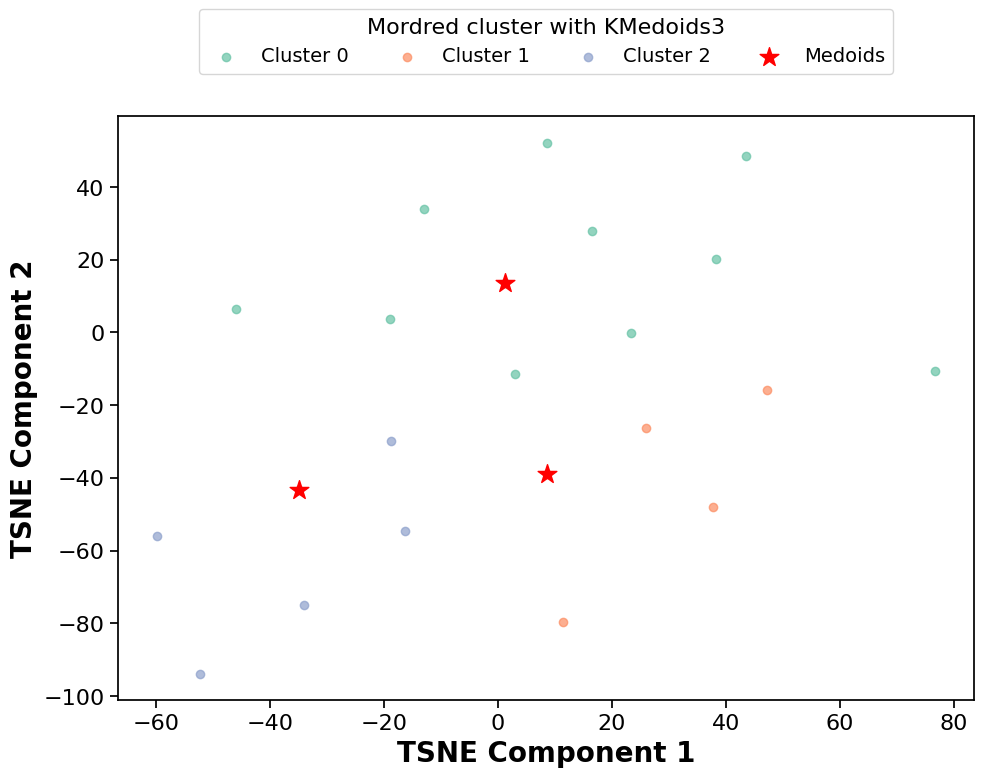

In [ ]:
k3_Rg_Mordred, KMedoids3_label_Rg_Mordred, medoids3_Rg_Mordred, km3_tsne_Rg_Mordred = get_clusters(
                  fp='Rg_Mordred_vector_unique_scaled',
                  method='KMedoids',
                  n_clusters=3,
                  plotting=True,
                  get_label=True,
                  perplexity=15,
                  loc = 'upper center'
                  )

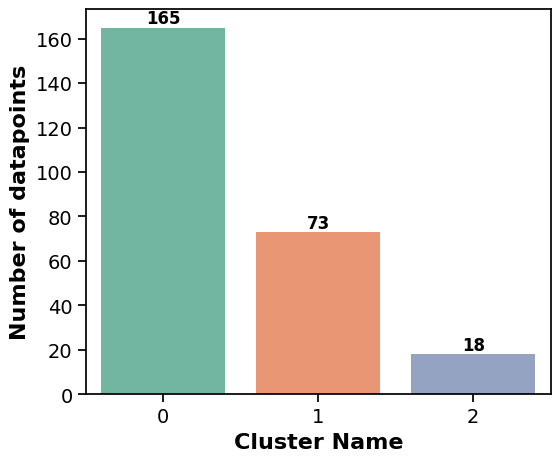

In [ ]:
map_to_main_data(Rg_data_test, Rg_unique_data_test,'KM3 Mordred cluster',KMedoids3_label_Rg_Mordred)
plot_cluster_count(Rg_data_test,'KM3 Mordred cluster',fig_size=(6,5))

euclidean
Silhouette score: 0.37
Davies-Bouldin score: 0.92
Calinski-Harabasz score: 694.72


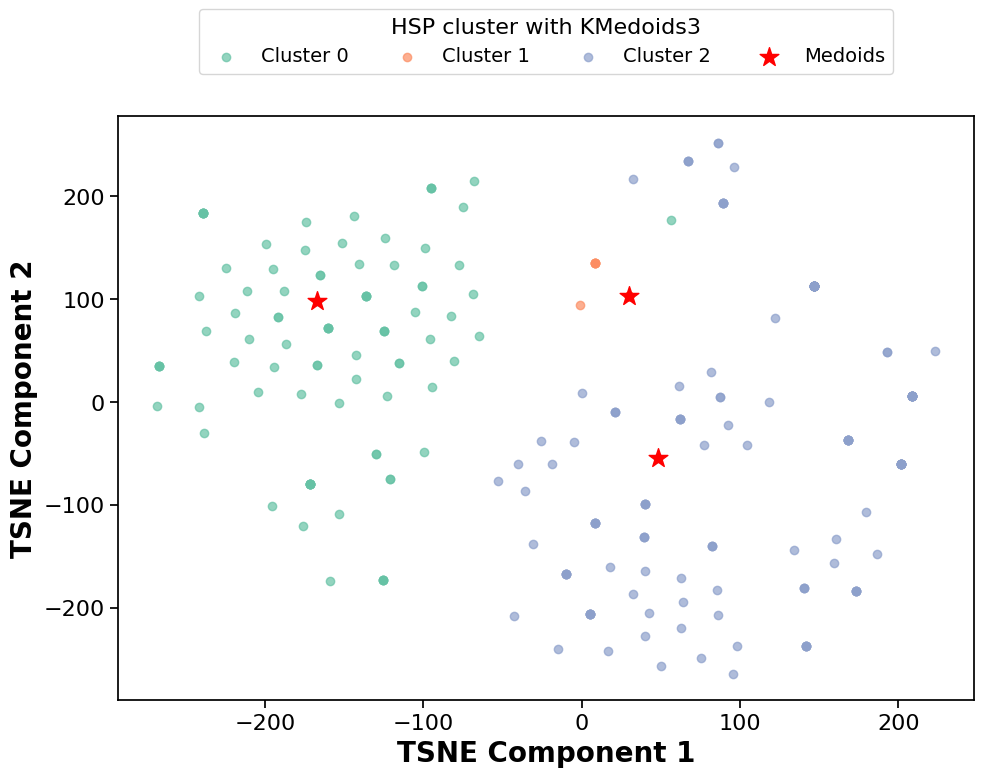

In [ ]:
k3_Rg_hsp, KMedoids3_label_Rg_hsp, medoids3_Rg_hsp, km3_tsne_Rg_hsp = get_clusters(
                  fp='Rg_HSP_vector',
                  method='KMedoids',
                  n_clusters=3,
                  plotting=True,
                  get_label=True,
                  perplexity=50,
                  loc = 'upper center'
                  )

euclidean
Silhouette score: 0.47
Davies-Bouldin score: 0.88
Calinski-Harabasz score: 628.1


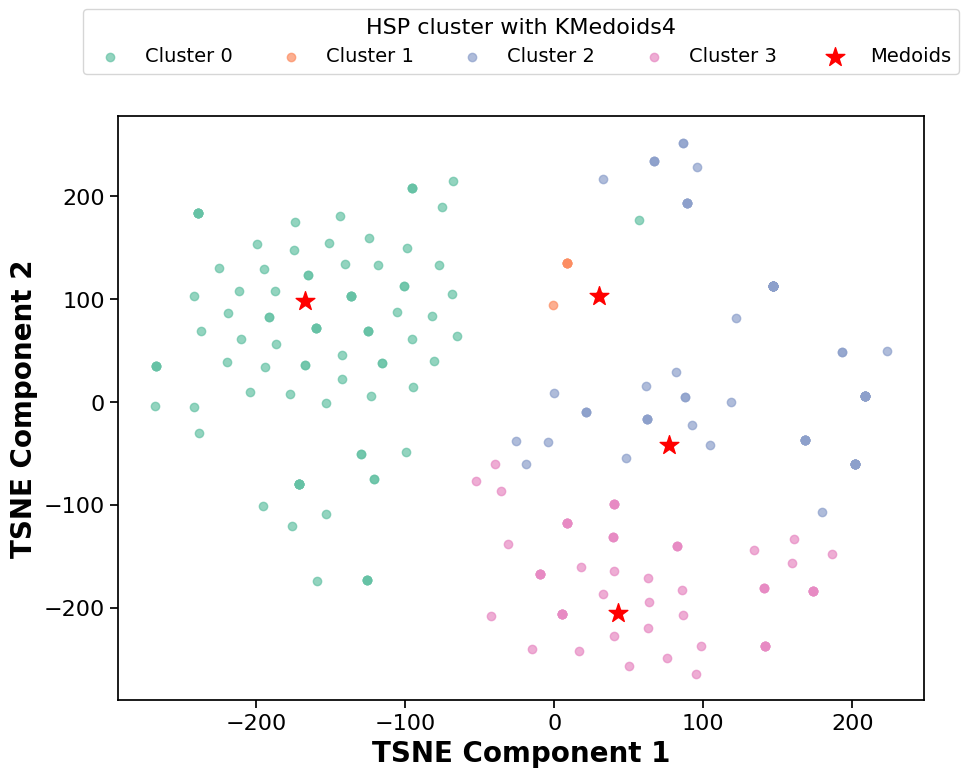

array([102, 239, 148, 152])

In [ ]:
k4_Rg_hsp, KMedoids4_label_Rg_hsp, medoids4_Rg_hsp, km4_tsne_Rg_hsp = get_clusters(
                  fp='Rg_HSP_vector',
                  method='KMedoids',
                  n_clusters=4,
                  plotting=True,
                  get_label=True,
                  perplexity=50,
                  loc = 'upper center'
                  )
medoids4_Rg_hsp

euclidean
Silhouette score: 0.51
Davies-Bouldin score: 0.86
Calinski-Harabasz score: 572.17


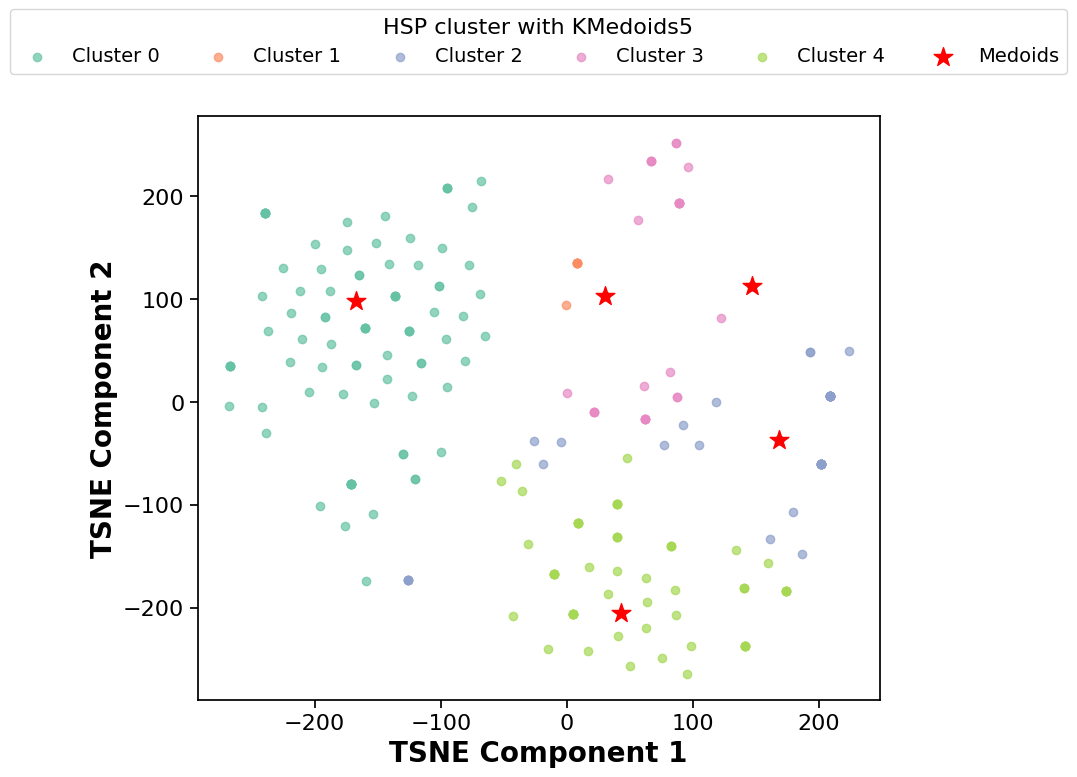

In [ ]:
k5_Rg_hsp, KMedoids5_label_Rg_hsp, medoids5_Rg_hsp, km5_tsne_Rg_hsp = get_clusters(
                  fp='Rg_HSP_vector',
                  method='KMedoids',
                  n_clusters=5,
                  plotting=True,
                  get_label=True,
                  perplexity=50,
                  loc = 'upper center'
                  )

euclidean
Silhouette score: 0.32
Davies-Bouldin score: 1.11
Calinski-Harabasz score: 111.53


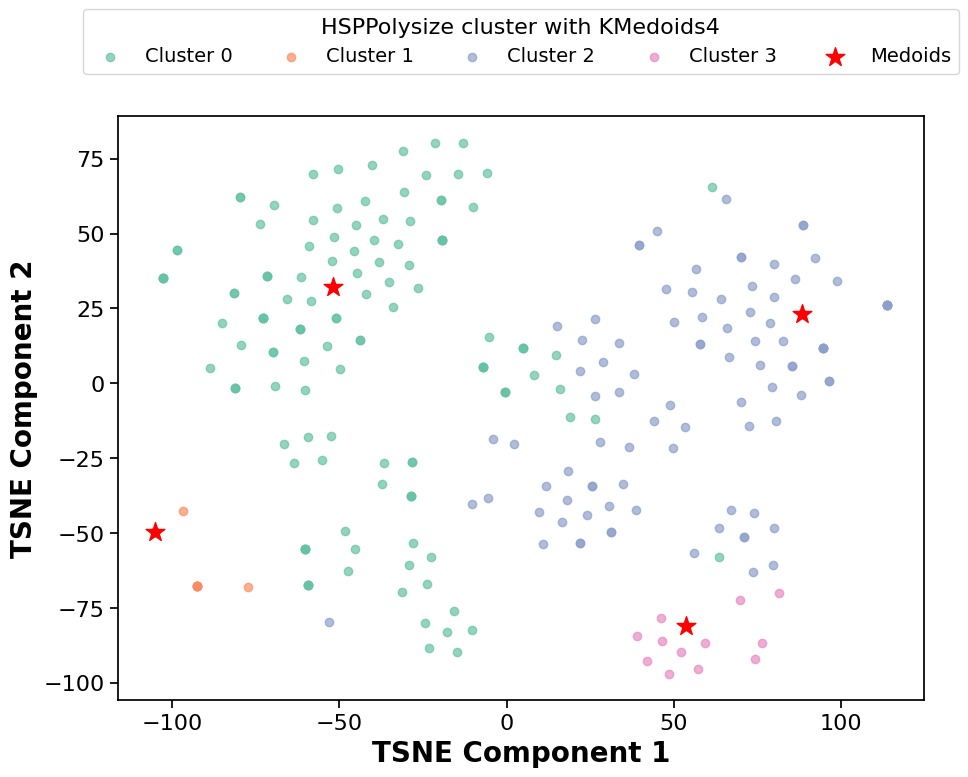

In [ ]:
k4_Rg_hsppoly, KMedoids4_label_Rg_hsppoly, medoids4_Rg_hsppoly, km4_tsne_Rg_hsppoly = get_clusters(
                  fp='Rg_HSPPolysize_vector_scaled',
                  method='KMedoids',
                  n_clusters=4,
                  plotting=True,
                  get_label=True,
                  perplexity=50,
                  loc = 'upper center'
                  )

euclidean
Silhouette score: 0.34
Davies-Bouldin score: 1.3
Calinski-Harabasz score: 96.33


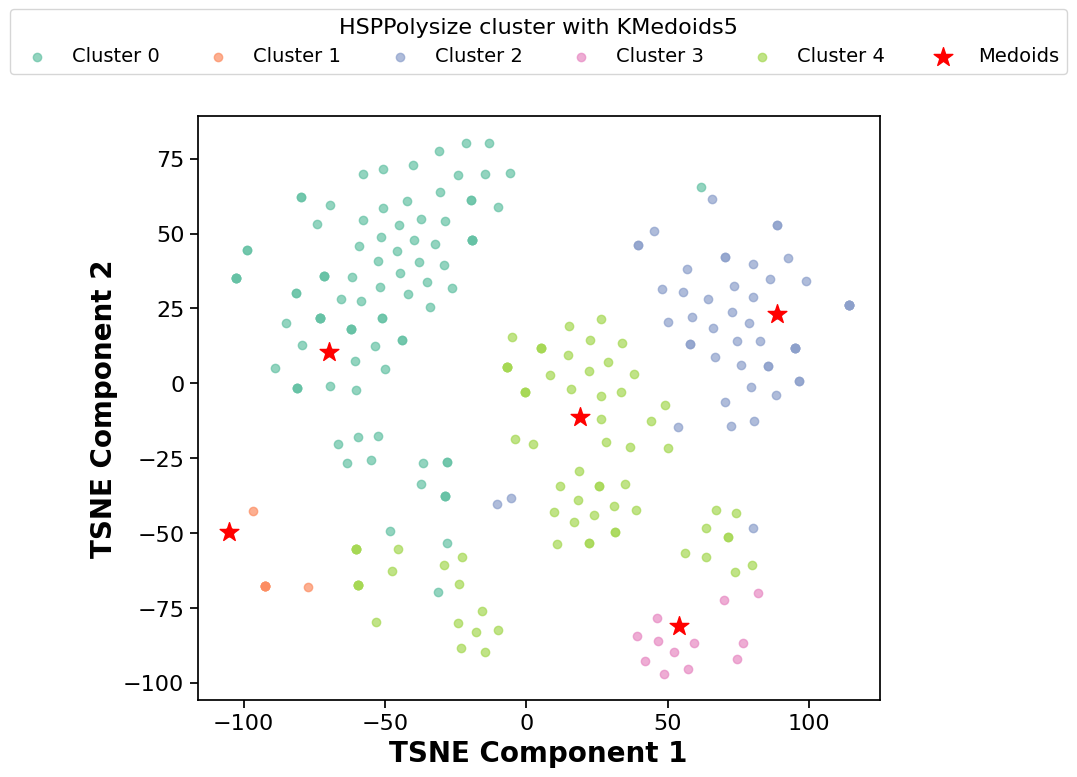

In [ ]:
k5_Rg_hsppoly, KMedoids5_label_Rg_hsppoly, medoids5_Rg_hsppoly, km5_tsne_Rg_hsppoly = get_clusters(
                  fp='Rg_HSPPolysize_vector_scaled',
                  method='KMedoids',
                  n_clusters=5,
                  plotting=True,
                  get_label=True,
                  perplexity=50,
                  loc = 'upper center'
                  )

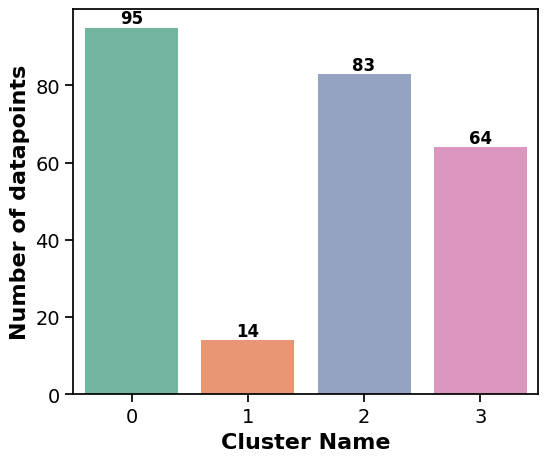

In [ ]:
Rg_data_test['KM4 polymer_solvent HSP cluster'] = KMedoids4_label_Rg_hsp
plot_cluster_count(Rg_data_test,'KM4 polymer_solvent HSP cluster',fig_size=(6,5))

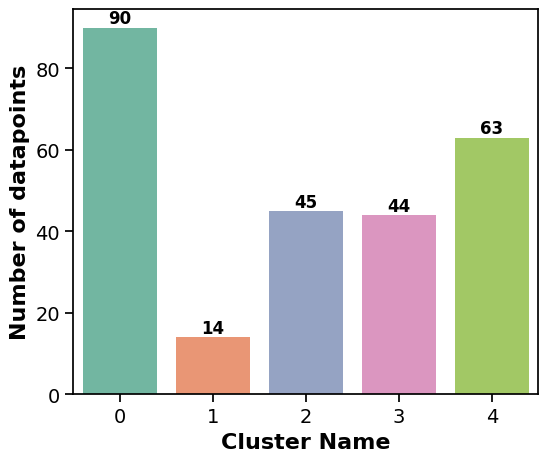

In [ ]:
Rg_data_test['KM5 polymer_solvent HSP cluster'] = KMedoids5_label_Rg_hsp

# map_to_main_data(Rg_data_test, Rg_unique_data_test,'KM5 polymer_solvent HSP cluster',KMedoids5_label_Rg_hsp)
plot_cluster_count(Rg_data_test,'KM5 polymer_solvent HSP cluster',fig_size=(6,5))

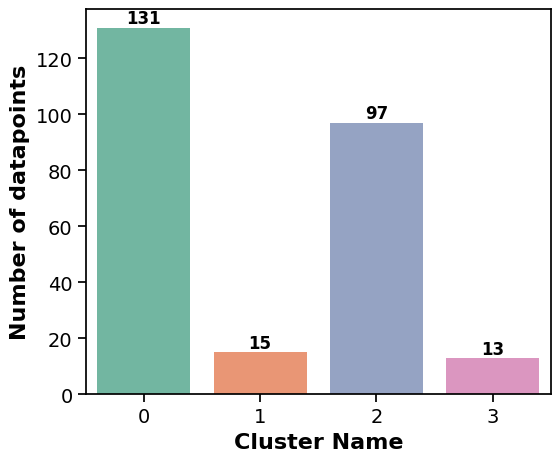

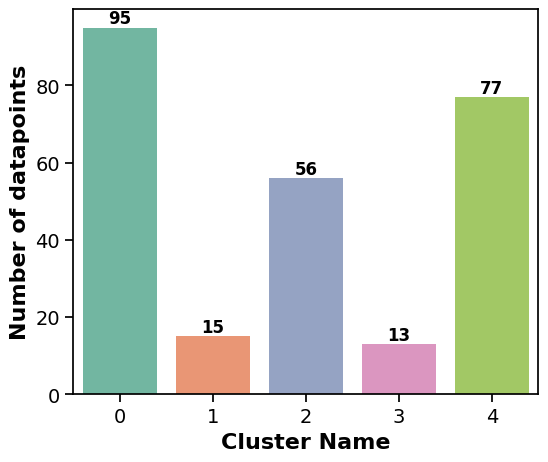

In [ ]:
Rg_data_test['KM4 polymer_solvent HSP and polysize cluster'] = KMedoids4_label_Rg_hsppoly
Rg_data_test['KM5 polymer_solvent HSP and polysize cluster'] = KMedoids5_label_Rg_hsppoly

# map_to_main_data(Rg_data_test, Rg_unique_data_test,'KM5 polymer_solvent HSP cluster',KMedoids5_label_Rg_hsp)
plot_cluster_count(Rg_data_test,'KM4 polymer_solvent HSP and polysize cluster',fig_size=(6,5))
plot_cluster_count(Rg_data_test,'KM5 polymer_solvent HSP and polysize cluster',fig_size=(6,5))

### Mordred Polysize

In [ ]:
Rg_mordredpolysiz_list = ['Rg_MordredPolysize_vector_scaled']

In [ ]:
aggregated_mp_results  = save_all_clustering_scores(Rg_mordredpolysiz_list,eps_range=np.arange(0.01,100, 0.5))
aggregated_mp_results.shape

Streaming output truncated to the last 5000 lines.
Davies-Bouldin score: 1.36
Calinski-Harabasz score: 93.72
euclidean
Silhouette score: 0.77
Davies-Bouldin score: 1.28
Calinski-Harabasz score: 111.55
euclidean
Silhouette score: 0.75
Davies-Bouldin score: 1.25
Calinski-Harabasz score: 86.12
euclidean
Silhouette score: 0.76
Davies-Bouldin score: 1.07
Calinski-Harabasz score: 105.04
euclidean
Silhouette score: 0.79
Davies-Bouldin score: 1.46
Calinski-Harabasz score: 74.43
euclidean
Silhouette score: 0.81
Davies-Bouldin score: 1.09
Calinski-Harabasz score: 115.49
euclidean
Silhouette score: 0.76
Davies-Bouldin score: 1.54
Calinski-Harabasz score: 61.46
euclidean
Silhouette score: 0.78
Davies-Bouldin score: 1.41
Calinski-Harabasz score: 79.33
euclidean
Silhouette score: 0.83
Davies-Bouldin score: 1.21
Calinski-Harabasz score: 155.29
euclidean
Silhouette score: 0.84
Davies-Bouldin score: 1.17
Calinski-Harabasz score: 174.47
euclidean
Silhouette score: 0.81
Davies-Bouldin score: 1.39
Calinsk

(1449, 10)

In [ ]:
# aggregated_mp_results.to_pickle(clustering_folder/'aggregated_ModredPolysize_results.pkl')
# aggregated_mp_results.to_csv(clustering_folder/'aggregated_ModredPolysize_results.csv')
aggregated_mp_results.to_pickle(clustering_folder/'aggregated_ModredPolysize_results.pkl')

In [ ]:
mp_best_scores = get_best_clustering_scores(aggregated_mp_results)
# visualize_cluster_number_and_method(mp_best_scores,'number of clusters')
# visualize_cluster_number_and_method(mp_best_scores,'clustering method')

In [ ]:
mp_best_scores

target            metric clustering method           vector  \
0      Rg  manual_euclidean            Butina  MordredPolysize   
1      Rg  manual_euclidean            Butina  MordredPolysize   
2      Rg  manual_euclidean            Butina  MordredPolysize   
3      Rg  manual_euclidean            Butina  MordredPolysize   
4      Rg  manual_euclidean            Butina  MordredPolysize   
5      Rg         euclidean            DBSCAN  MordredPolysize   
6      Rg         euclidean            DBSCAN  MordredPolysize   
7      Rg         euclidean            DBSCAN  MordredPolysize   
8      Rg         euclidean            DBSCAN  MordredPolysize   
9      Rg         euclidean            DBSCAN  MordredPolysize   
10     Rg         euclidean            DBSCAN  MordredPolysize   
11     Rg         euclidean            DBSCAN  MordredPolysize   
12     Rg         euclidean            DBSCAN  MordredPolysize   
13     Rg         euclidean            DBSCAN  MordredPolysize   
14     Rg         euclidean            DBSCAN  MordredPolysize   
15     Rg         euclidean   GaussianMixture  MordredPolysize   
16     Rg         euclidean   GaussianMixture  MordredPolysize   
17     Rg         euclidean   GaussianMixture  MordredPolysize   
18     Rg         euclidean   GaussianMixture  MordredPolysize   
19     Rg         euclidean           HDBSCAN  MordredPolysize   
20     Rg         euclidean           HDBSCAN  MordredPolysize   
21     Rg         euclidean           HDBSCAN  MordredPolysize   
22     Rg         euclidean           HDBSCAN  MordredPolysize   
23     Rg         euclidean           HDBSCAN  MordredPolysize   
24     Rg         euclidean           HDBSCAN  MordredPolysize   
25     Rg         euclidean           HDBSCAN  MordredPolysize   
26     Rg         euclidean           HDBSCAN  MordredPolysize   
27     Rg         euclidean           HDBSCAN  MordredPolysize   
28     Rg         euclidean           HDBSCAN  MordredPolysize   
29     Rg         euclidean          KMedoids  MordredPolysize   
30     Rg         euclidean          KMedoids  MordredPolysize   
31     Rg         euclidean          KMedoids  MordredPolysize   
32     Rg         euclidean          KMedoids  MordredPolysize   

   number of clusters                                      cluster sizes  \
0                   3                   {'C_0': 253, 'C_1': 2, 'C_2': 1}   
1                   4         {'C_0': 252, 'C_1': 1, 'C_2': 2, 'C_3': 1}   
2                   5  {'C_0': 249, 'C_1': 3, 'C_2': 2, 'C_3': 1, 'C_...   
3                   6  {'C_0': 248, 'C_1': 3, 'C_2': 2, 'C_3': 1, 'C_...   
4                   7  {'C_0': 247, 'C_1': 3, 'C_2': 2, 'C_3': 1, 'C_...   
5                   3                {'C_-1': 14, 'C_0': 230, 'C_1': 12}   
6                   3                  {'C_-1': 1, 'C_0': 253, 'C_1': 2}   
7                   4       {'C_-1': 9, 'C_0': 230, 'C_1': 12, 'C_2': 5}   
8                   4        {'C_-1': 4, 'C_0': 247, 'C_1': 3, 'C_2': 2}   
9                   5  {'C_-1': 9, 'C_0': 219, 'C_1': 12, 'C_2': 5, '...   
10                  5  {'C_-1': 4, 'C_0': 242, 'C_1': 3, 'C_2': 5, 'C...   
11                  6  {'C_-1': 6, 'C_0': 219, 'C_1': 3, 'C_2': 12, '...   
12                  6  {'C_-1': 4, 'C_0': 230, 'C_1': 3, 'C_2': 12, '...   
13                  7  {'C_-1': 14, 'C_0': 150, 'C_1': 55, 'C_2': 12,...   
14                  7  {'C_-1': 9, 'C_0': 205, 'C_1': 12, 'C_2': 5, '...   
15                  3                  {'C_0': 163, 'C_1': 87, 'C_2': 6}   
16                  4       {'C_0': 158, 'C_1': 74, 'C_2': 6, 'C_3': 18}   
17                  5  {'C_0': 158, 'C_1': 62, 'C_2': 6, 'C_3': 18, '...   
18                  6  {'C_0': 158, 'C_1': 62, 'C_2': 6, 'C_3': 12, '...   
19                  3                {'C_-1': 14, 'C_0': 230, 'C_1': 12}   
20                  3                  {'C_-1': 1, 'C_0': 253, 'C_1': 2}   
21                  4       {'C_-1': 9, 'C_0': 5, 'C_1': 230, 'C_2': 12}   
22        

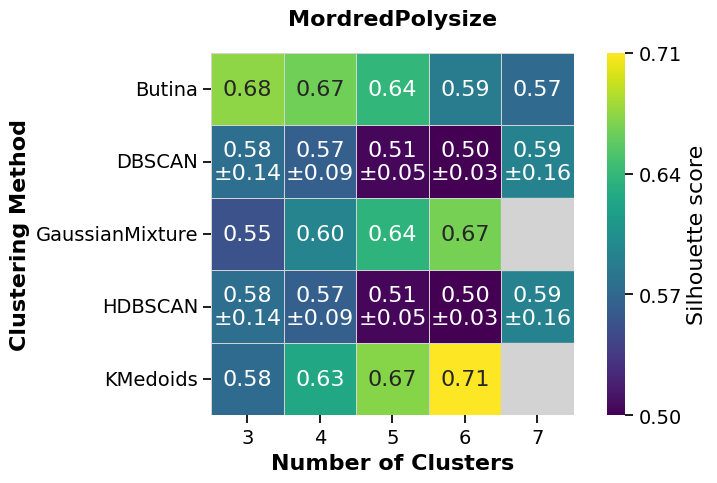

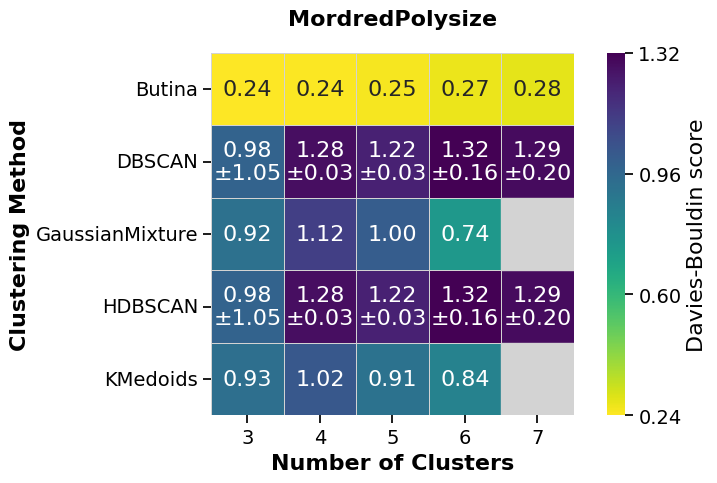

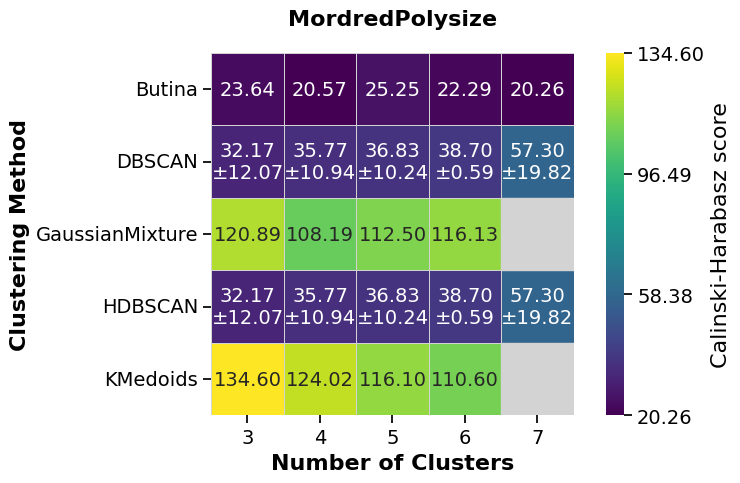

In [ ]:
plot_clustering_score_heatmap(mp_best_scores)

euclidean
Silhouette score: 0.63
Davies-Bouldin score: 1.02
Calinski-Harabasz score: 124.02


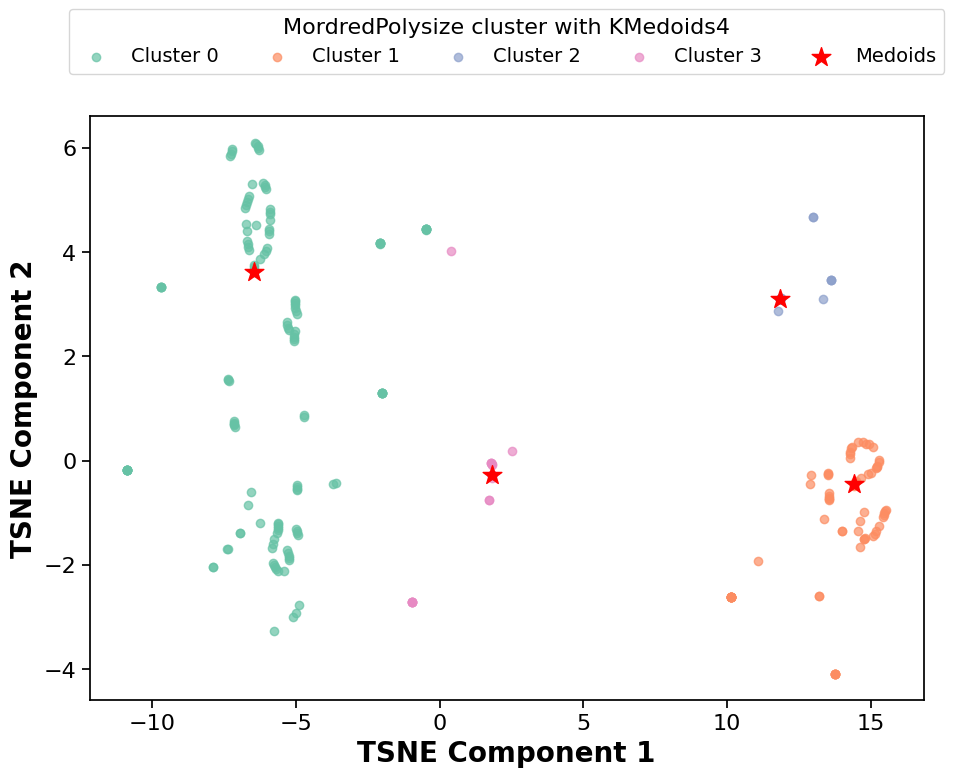

In [ ]:
k4_Rg_mp, KMedoids4_label_Rg_mp, medoids4_Rg_mp, km4_tsne_Rg_mp = get_clusters(
                  fp='Rg_MordredPolysize_vector_scaled',
                  method='KMedoids',
                  n_clusters=4,
                  plotting=True,
                  get_label=True,
                  perplexity=50,
                  loc = 'upper center'
                  )


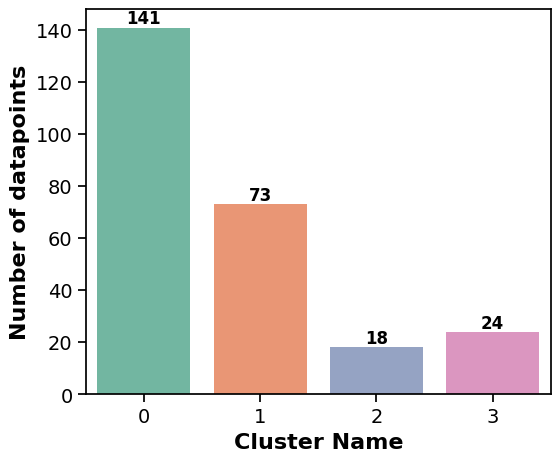

In [ ]:
Rg_data_test['KM4 Mordred_Polysize cluster'] = KMedoids4_label_Rg_mp

# map_to_main_data(Rg_data_test, Rg_unique_data_test,'KM5 polymer_solvent HSP cluster',KMedoids5_label_Rg_hsp)
plot_cluster_count(Rg_data_test,'KM4 Mordred_Polysize cluster',fig_size=(6,5))

In [ ]:
Rg_data_test

name  Mw (g/mol)  Mn (g/mol)       PDI Regioregularity R%    DP  \
0     MEH-PPV    611000.0         NaN  1.965375                NaN  2350   
1     BEH-PPV    306000.0         NaN  1.965375                NaN   854   
2    BCHA-PPV    920000.0         NaN  1.965375                NaN  1055   
3         PFO     46000.0         NaN  1.965375                NaN   NaN   
4         PFO     46000.0         NaN  1.965375                NaN   NaN   
..        ...         ...         ...       ...                ...   ...   
251      P3HT     24000.0     16000.0  1.500000                NaN   NaN   
252      P3HT     24000.0     16000.0  1.500000                NaN   NaN   
253      P3HT     24000.0     16000.0  1.500000                NaN   NaN   
254      P3HT     24000.0     16000.0  1.500000                NaN   NaN   
255      P3HT     24000.0     16000.0  1.500000                NaN   NaN   

     SANS  SAXS/GWAXS  DLS  SLS  ...  KM5 ECFP6_Count_512bit cluster  \
0       0           0  1.0    1  ...                               2   
1       0           0  1.0    1  ...                               2   
2       0           0  1.0    1  ...                               4   
3       0           0  1.0    1  ...                               3   
4       0           0  1.0    1  ...                               3   
..    ...         ...  ...  ...  ...                             ...   
251     0           0  1.0    1  ...                               0   
252     0           0  1.0    1  ...                               0   
253     0           0  1.0    1  ...                               0   
254     0           0  1.0    1  ...                               0   
255     0           0  1.0    1  ...                               0   

     KM3 MACCS cluster  HBD3 MACCS cluster  HBD5 MACCS cluster  \
0                    1                   0                   2   
1                    1                   0                   2   
2                    1                   0                   2   
3                    0                   0                   3   
4                    0                   0                   3   
..                 ...                 ...                 ...   
251                  0                   1                   1   
252                  0                   1                   1   
253                  0                   1                   1   
254                  0                   1                   1   
255                  0                   1                   1   

     KM3 Mordred cluster  KM4 polymer_solvent HSP cluster  \
0                      0                                3   
1                      0                                3   
2                      1                                3   
3                      1                                3   
4                      1                                3   
..                   ...                              ...   
251                    0                                2   
252                    0                                2   
253                    0                                2   
254                    0                                2   
255                    0                                2   

     KM5 polymer_solvent HSP cluster  \
0                                  4   
1                                  4   
2                                  4   
3                                  4   
4                                  2   
..                               ...   
251                                3   
252                                3   
253                                3   
254                                3   
255                                3   

    KM4 polymer_solvent HSP and polysize cluster  \
0                                              3   
1                                              2   
2                                              3   
3               

### Show strcuter on Plotly

In [ ]:
def create_plotly_dataframe(tsne:np.ndarray,cluster:np.ndarray,unique_data:pd.DataFrame)-> pd.DataFrame:

  active_plotly_df = pd.DataFrame()
  active_plotly_df["t-SNE1"] = tsne[:,1]
  active_plotly_df["t-SNE2"] = tsne[:,0]
  active_plotly_df["cluster"] = cluster.astype('str')
  active_plotly_df['canonical_name'] = unique_data['canonical_name'].values
  active_plotly_df['smiles'] =   unique_data['Monomer SMILES'].values

  return active_plotly_df

In [ ]:
# active_plotly_df_kmedoids5 = create_plotly_dataframe(tsne=km5_tsne,cluster=KMedoids5_label,unique_data=Rg_Rh_unique_data)
# active_plotly_df_kmedoids4 = create_plotly_dataframe(tsne=km4_tsne,cluster=KMedoids4_label,unique_data=Rg_Rh_unique_data)

# active_plotly_df_HBD5 = create_plotly_dataframe(tsne=HBD5_tsne, cluster=HBD5_label, unique_data=Rg_Rh_unique_data)
# active_plotly_df_HBD4 = create_plotly_dataframe(tsne=HBD4_tsne, cluster=HBD4_label, unique_data=Rg_Rh_unique_data)
# active_plotly_df_Rg_unique_kmedoids4 = create_plotly_dataframe(tsne=km4_tsne_Rg,cluster=KMedoids4_label_Rg,unique_data=Rg_unique_data)
# active_plotly_df_Rg_unique_kmedoids3 = create_plotly_dataframe(tsne=km3_tsne_Rg,cluster=KMedoids3_label_Rg,unique_data=Rg_unique_data)
# active_plotly_df_Rg_unique_HBD3 = create_plotly_dataframe(tsne=HBD3_tsne_Rg,cluster=HBD3_label_Rg,unique_data=Rg_unique_data)
# active_plotly_df_Rg_unique_but3 = create_plotly_dataframe(tsne=but3_tsne_Rg,cluster=but3_label_Rg,unique_data=Rg_unique_data)

#km
active_plotly_df_Rg_unique_km3_count = create_plotly_dataframe(tsne=km3_tsne_Rg_count,cluster=KMedoids3_label_Rg_count,unique_data=Rg_unique_data)
active_plotly_df_Rg_unique_km4_count = create_plotly_dataframe(tsne=km4_tsne_Rg_count,cluster=KMedoids4_label_Rg_count,unique_data=Rg_unique_data)

active_plotly_df_Rg_unique_km3_bin = create_plotly_dataframe(tsne=km3_tsne_Rg_bin,cluster=KMedoids3_label_Rg_bin,unique_data=Rg_unique_data)

# DBS
active_plotly_df_Rg_unique_DBS3_count = create_plotly_dataframe(tsne=DBS3_tsne_Rg_bin,cluster=DBS3_label_Rg_bin,unique_data=Rg_unique_data)
active_plotly_df_Rg_unique_DBS3_bin = create_plotly_dataframe(tsne=DBS3_tsne_Rg_count,cluster=DBS3_label_Rg_count,unique_data=Rg_unique_data)
#mordred:

active_plotly_df_Rg_unique_but3_mordred = create_plotly_dataframe(tsne=but3_tsne_Rg_mordred,cluster=but3_label_Rg_mordred,unique_data=Rg_unique_data)
active_plotly_df_Rg_unique_but4_mordred = create_plotly_dataframe(tsne=but4_tsne_Rg_mordred,cluster=but4_label_Rg_mordred,unique_data=Rg_unique_data)
active_plotly_df_Rg_unique_km4_mordred = create_plotly_dataframe(tsne=km4_tsne_Rg_mordred,cluster=KMedoids4_label_Rg_mordred,unique_data=Rg_unique_data)
active_plotly_df_Rg_unique_km3_mordred = create_plotly_dataframe(tsne=km3_tsne_Rg_mordred,cluster=KMedoids3_label_Rg_mordred,unique_data=Rg_unique_data)


NameError: name 'km3_tsne_Rg_count' is not defined

In [ ]:
# plotly_clusters(active_plotly_df_kmedoids4, 'kmedoids4')
# plotly_clusters(active_plotly_df_kmedoids5, 'kmedoids5')
# plotly_clusters(active_plotly_df_HBD4, 'HBDSCAN4')
# plotly_clusters(active_plotly_df_HBD5, 'HBDSCAN5')
# plotly_clusters(active_plotly_df_Rg_unique_kmedoids4, 'kmedoids4_Rg')
# plotly_clusters(active_plotly_df_Rg_unique_kmedoids3, 'kmedoids3_Rg')
# plotly_clusters(active_plotly_df_Rg_unique_HBD3, 'HBD3_Rg')
# plotly_clusters(active_plotly_df_Rg_unique_but3, 'Butina3')
# plotly_clusters(active_plotly_df_Rg_unique_but3_mordred, 'Butina3 mordred')
# plotly_clusters(active_plotly_df_Rg_unique_but4_mordred, 'Butina4 mordred')
# plotly_clusters(active_plotly_df_Rg_unique_km3_mordred, 'kmedoids3 mordred')
# plotly_clusters(active_plotly_df_Rg_unique_km4_mordred, 'kmedoids4 mordred')
plotly_clusters(active_plotly_df_Rg_unique_km4_count, 'kmedoids4 count')
plotly_clusters(active_plotly_df_Rg_unique_km3_bin, 'kmedoids3 binary')
plotly_clusters(active_plotly_df_Rg_unique_km3_count, 'kmedoids3 count')
# plotly_clusters(active_plotly_df_Rg_unique_DBS3_bin, 'kmedoids4 binary')
# plotly_clusters(active_plotly_df_Rg_unique_DBS3_count, 'kmedoids4 count')


### Plot feature distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_ood_combined(
    data: pd.DataFrame,
    target: str,
    features: list,
    hue: str,
    ncols: int = 2,
    figsize=(12, 18),
    fontsize: int = 14,   # <--- new arg
):
    n_feats = len(features)
    nrows = math.ceil(n_feats / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten() if n_feats > 1 else [axes]

    # Define relative scaling
    label_font = {"fontsize": fontsize, "fontweight": "bold"}
    tick_fontsize = int(fontsize * 1.1)
    legend_fontsize = int(fontsize * 1.0)
    legend_title_fontsize = int(fontsize * .9)
    suptitle_fontsize = int(fontsize * 1.6)

    for i, feat in enumerate(features):
        df = data.dropna(subset=[target]).reset_index()
        if isinstance(df[target].iloc[1], (list, np.ndarray)):
            reordered_df = pd.DataFrame(
                df[target].tolist(),
                columns=["First Peak", "Second Peak", "Third Peak"]
            )
            df = pd.concat([df, reordered_df], axis=1)

        ax = axes[i]
        sns.histplot(
            data=df, x=feat, hue=hue, ax=ax,
            palette='Set2', element="step",
            stat="density", common_norm=False
        )

        changed_x_label = (
            'Temperature (K)' if feat == 'Temperature SANS/SLS/DLS/SEC (K)' else feat
        )
        x_label = f'log (Rh {changed_x_label})' if 'Peak' in changed_x_label else changed_x_label

        sns.move_legend(ax, loc='upper right', title='Clusters',
                        title_fontsize=legend_title_fontsize, fontsize=legend_fontsize)
        ax.set_xlabel(x_label, fontdict=label_font)
        ax.set_ylabel('Occurrence', fontdict=label_font)
        ax.tick_params(axis='x', labelsize=tick_fontsize)
        ax.tick_params(axis='y', labelsize=tick_fontsize)

        # Inset boxplot
        box_inset = ax.inset_axes([0.01, -0.5, 0.99, 0.2])
        sns.boxplot(x=feat, data=df, hue=hue, ax=box_inset, palette='Set2')
        box_inset.set(yticks=[], xlabel=None)
        box_inset.legend_.remove()
        box_inset.tick_params(axis='x', labelsize=tick_fontsize)

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(
        f'Feature-wise OOD Analysis in {hue}',
        fontsize=suptitle_fontsize, y=1.001, fontweight='bold'
    )
    plt.subplots_adjust(top=0.94)
    plt.tight_layout()
    plt.show()




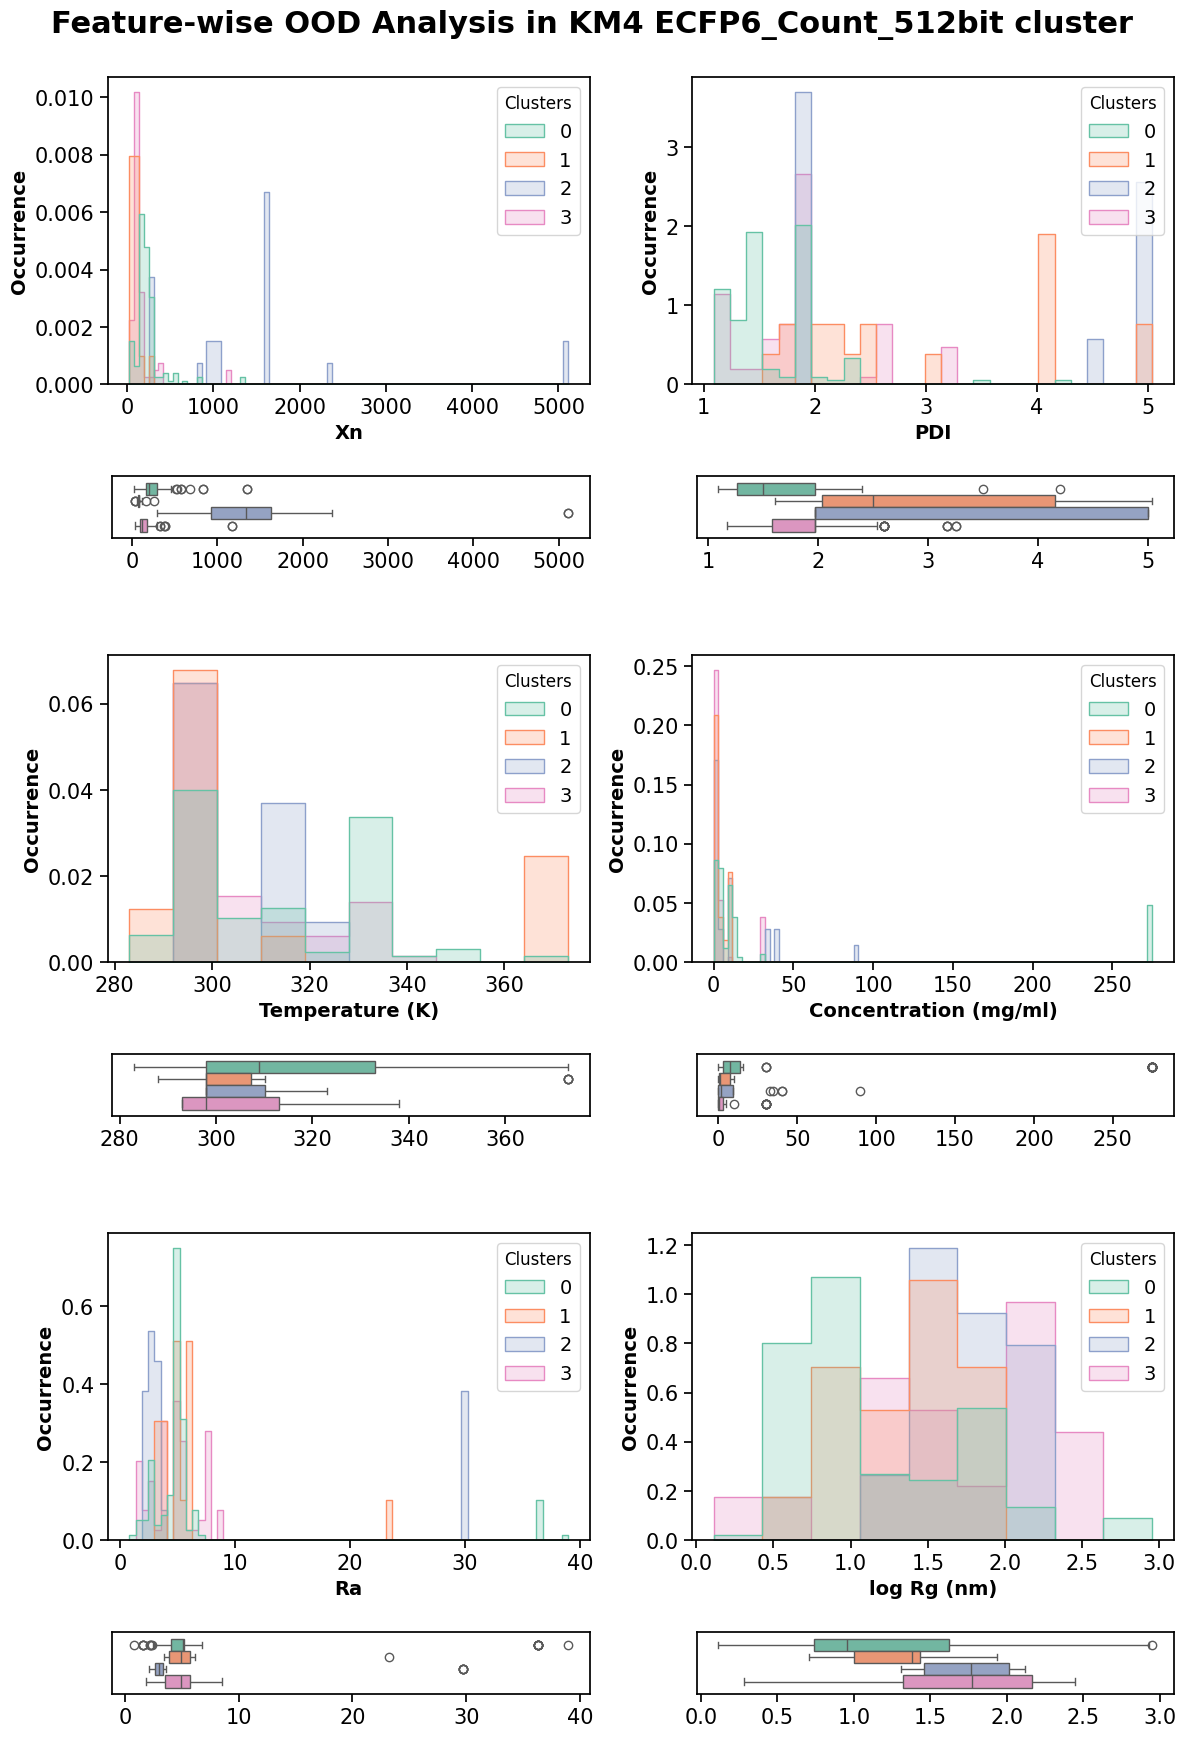

In [ ]:
features = ['Xn', 'PDI', 'Temperature SANS/SLS/DLS/SEC (K)', 'Concentration (mg/ml)', 'Ra', 'log Rg (nm)']
plot_feature_ood_combined(
    Rg_data_test,
    target='log Rg (nm)',
    features=features,
    hue='KM4 ECFP6_Count_512bit cluster',
    ncols=2  # You can change this to 3 or more if you prefer
)

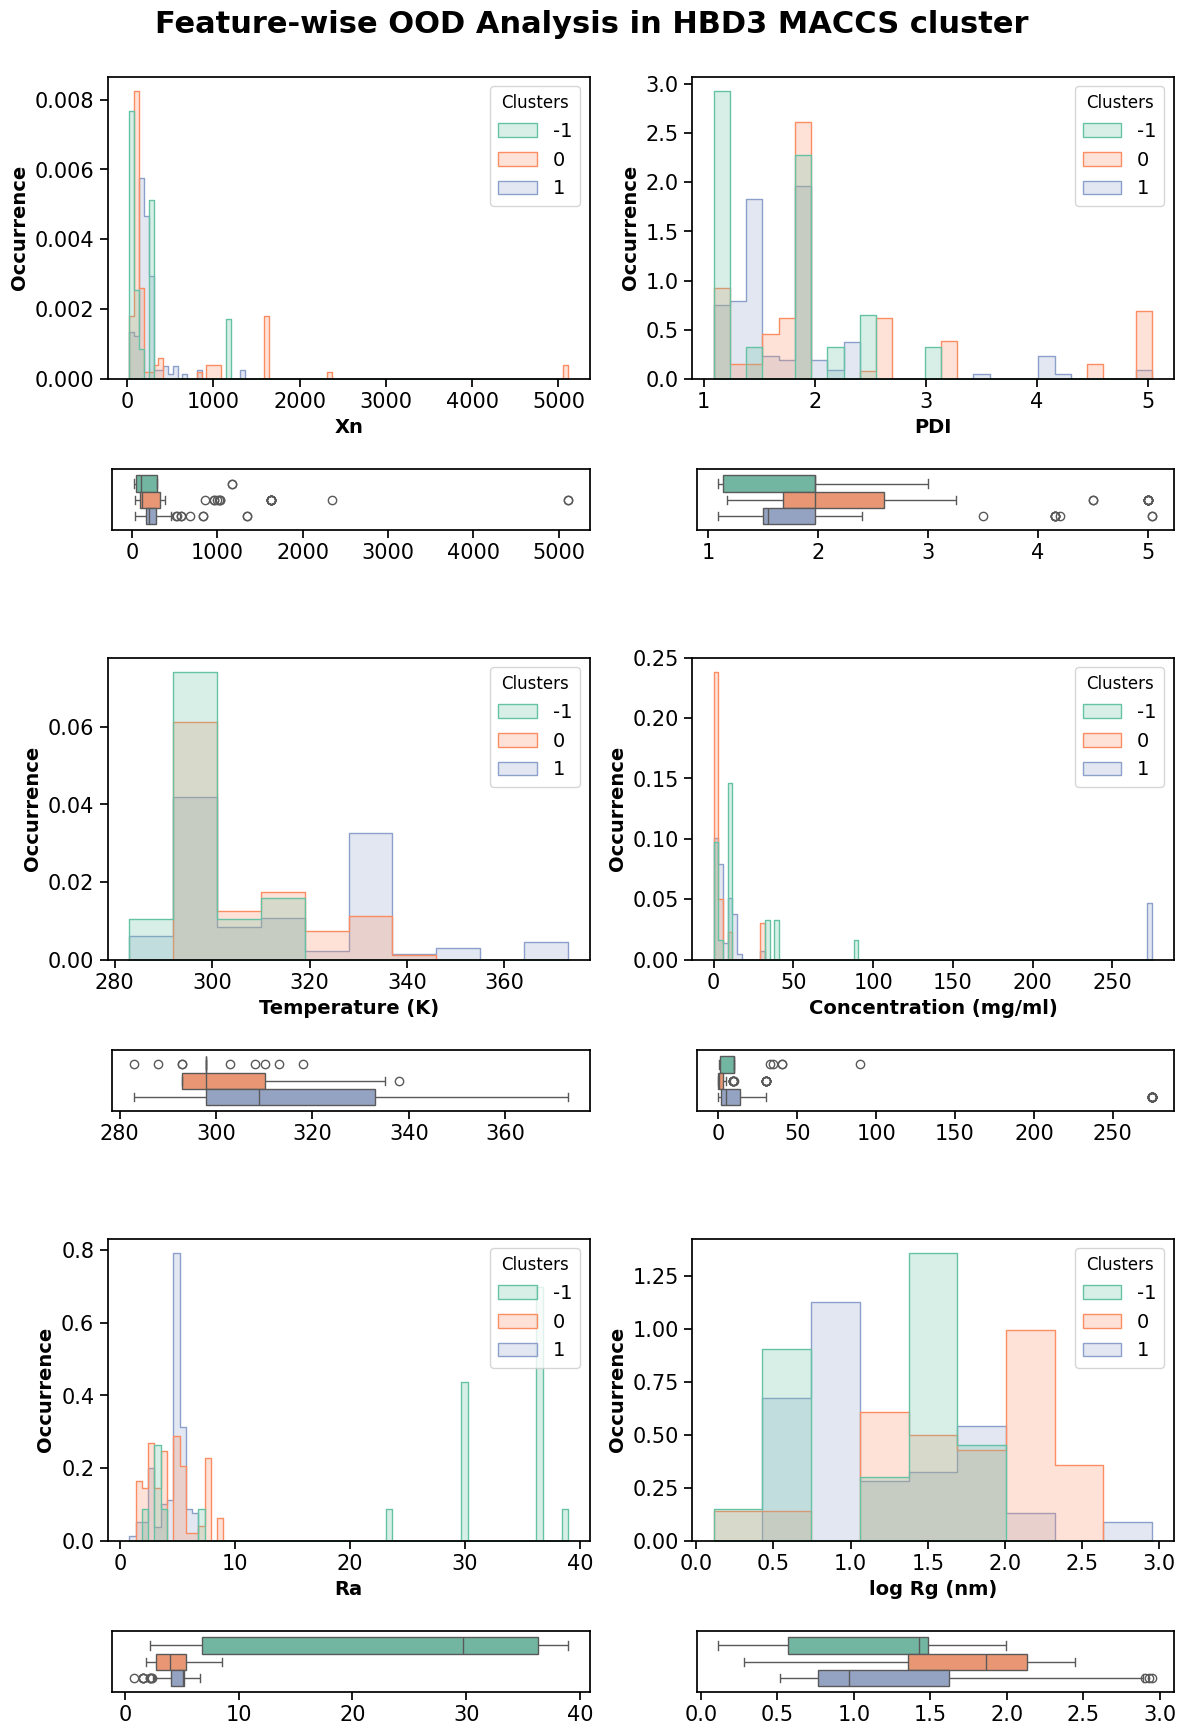

In [ ]:
plot_feature_ood_combined(
    Rg_data_test,
    target='log Rg (nm)',
    features=features,
    hue='HBD3 MACCS cluster',
    ncols=2  # You can change this to 3 or more if you prefer
)

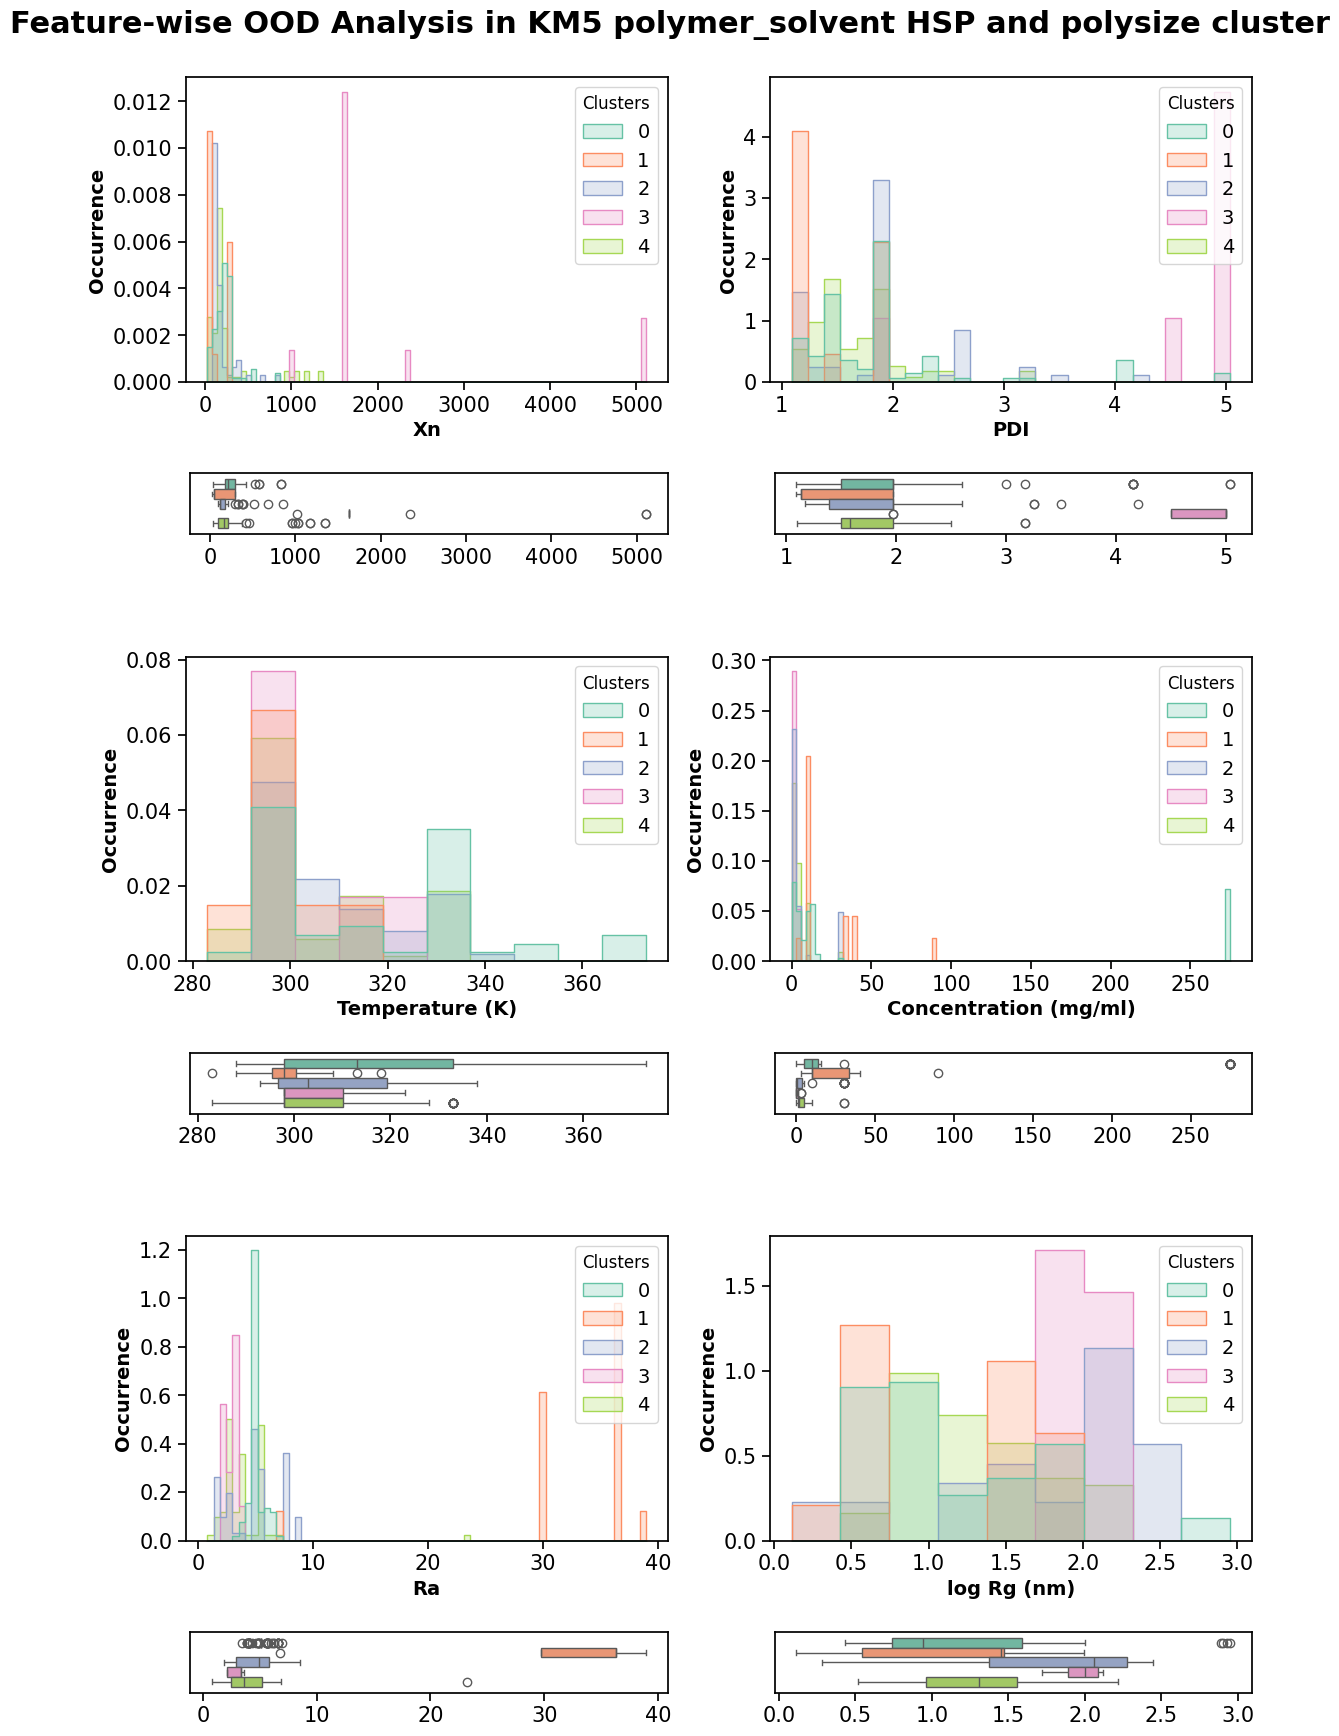

In [ ]:
plot_feature_ood_combined(
    Rg_data_test,
    target='log Rg (nm)',
    features=features,
    hue='KM5 polymer_solvent HSP and polysize cluster',
    ncols=2  # You can change this to 3 or more if you prefer
)

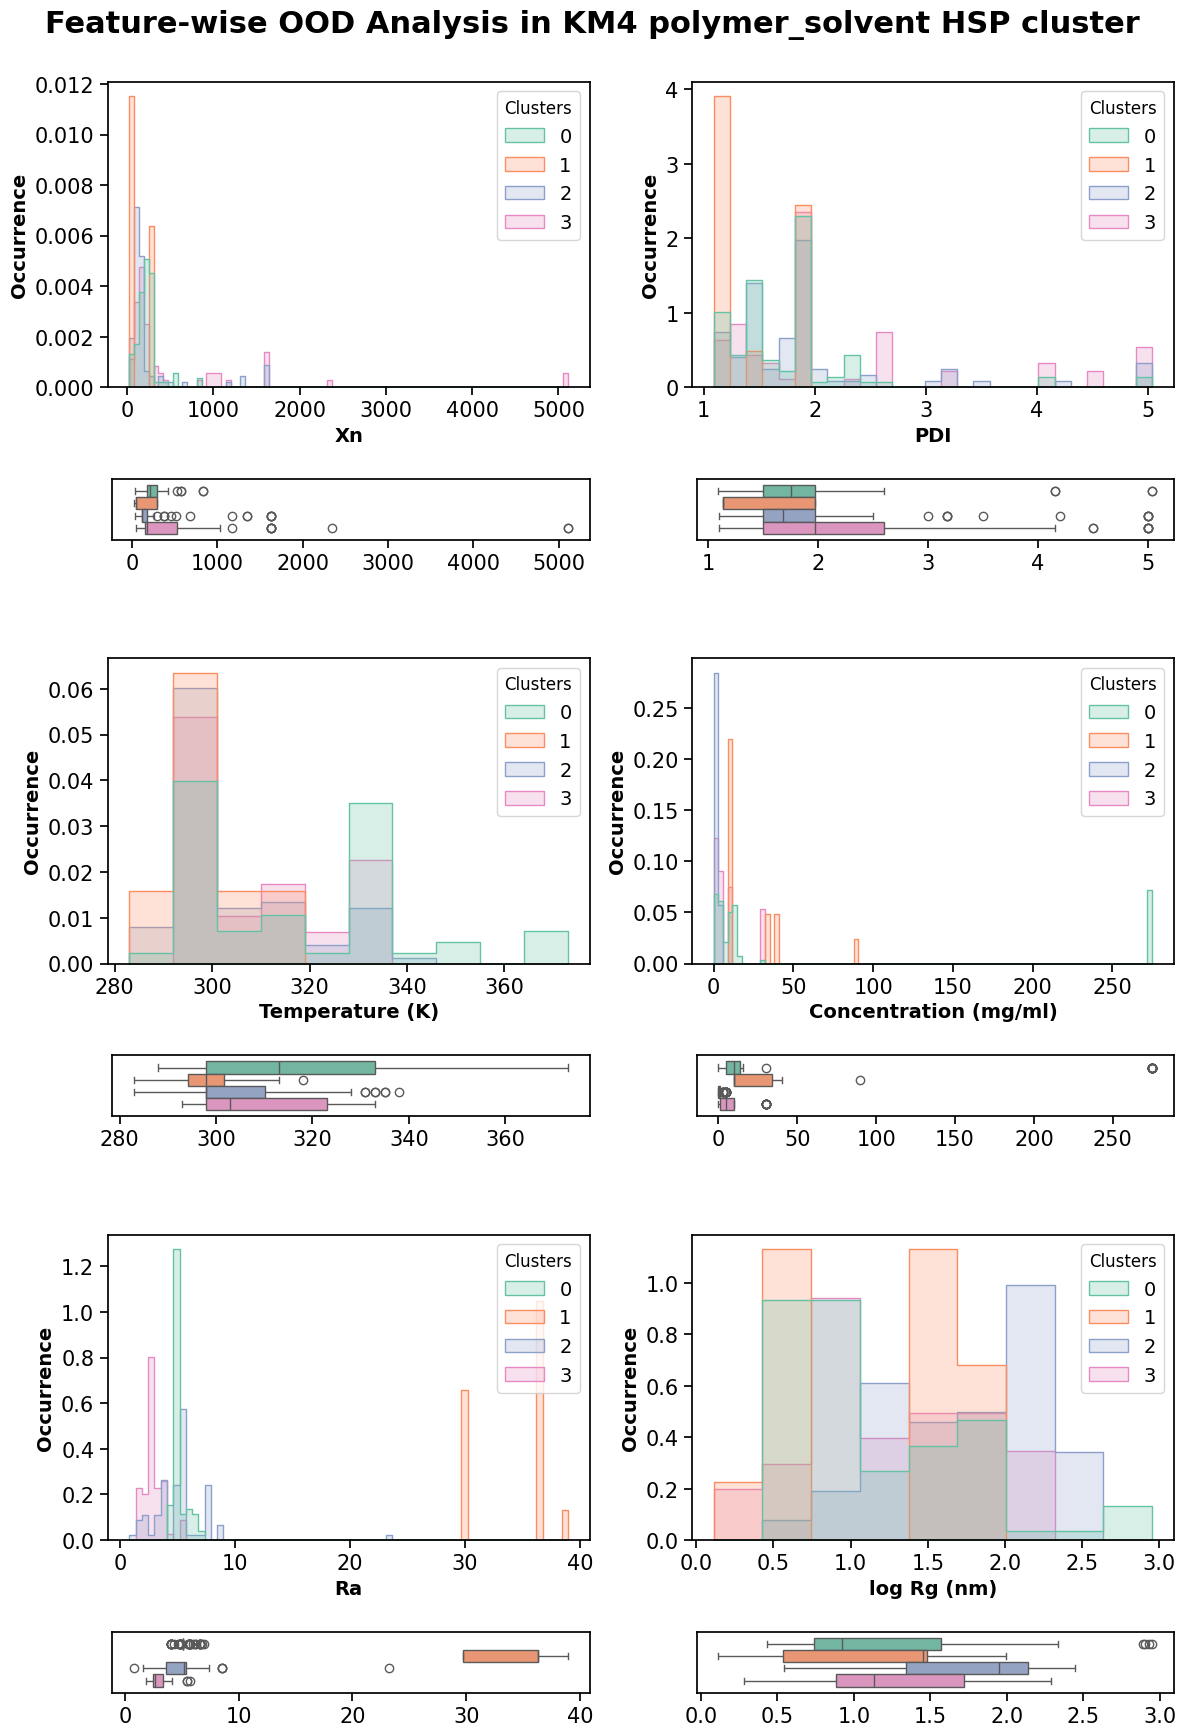

In [ ]:
plot_feature_ood_combined(
    Rg_data_test,
    target='log Rg (nm)',
    features=features,
    hue='KM4 polymer_solvent HSP cluster',
    ncols=2  # You can change this to 3 or more if you prefer
)

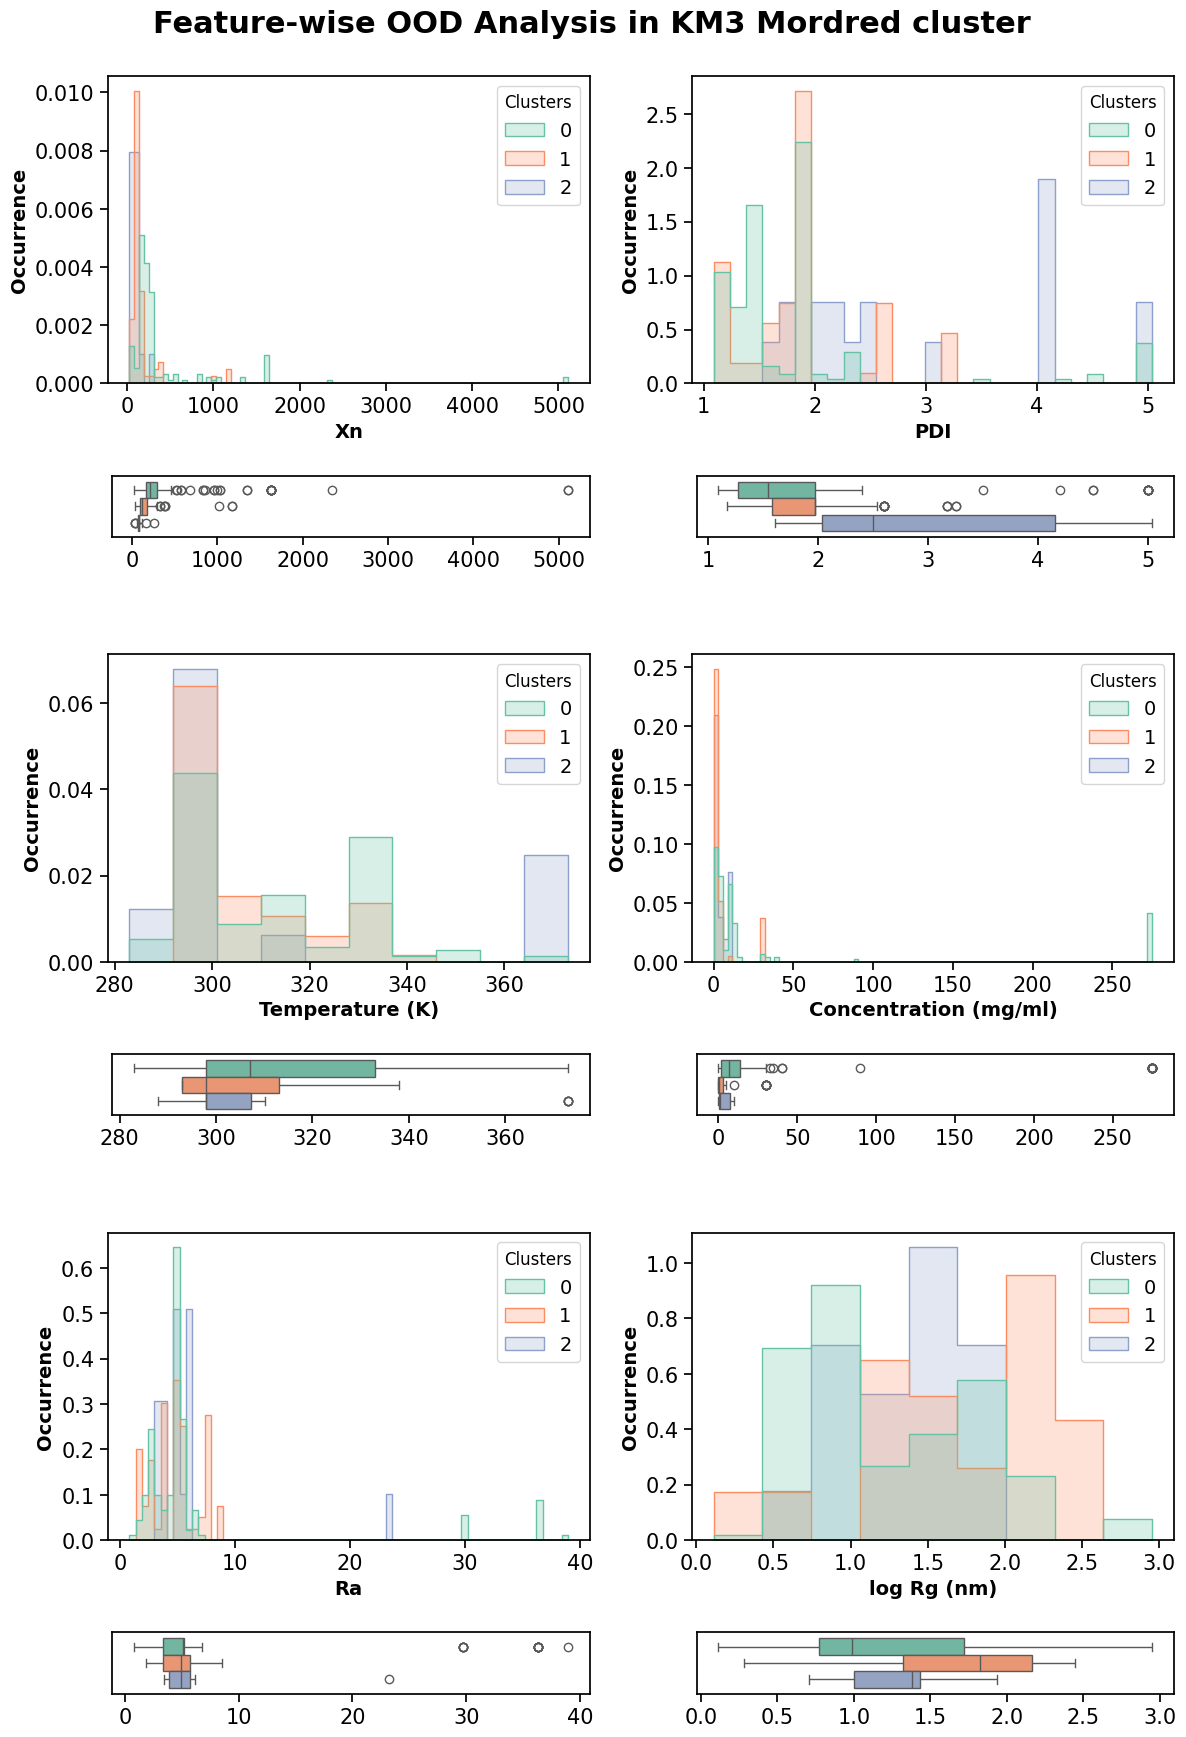

In [ ]:
plot_feature_ood_combined(
    Rg_data_test,
    target='log Rg (nm)',
    features=features,
    hue='KM3 Mordred cluster',
    ncols=2  # You can change this to 3 or more if you prefer
)

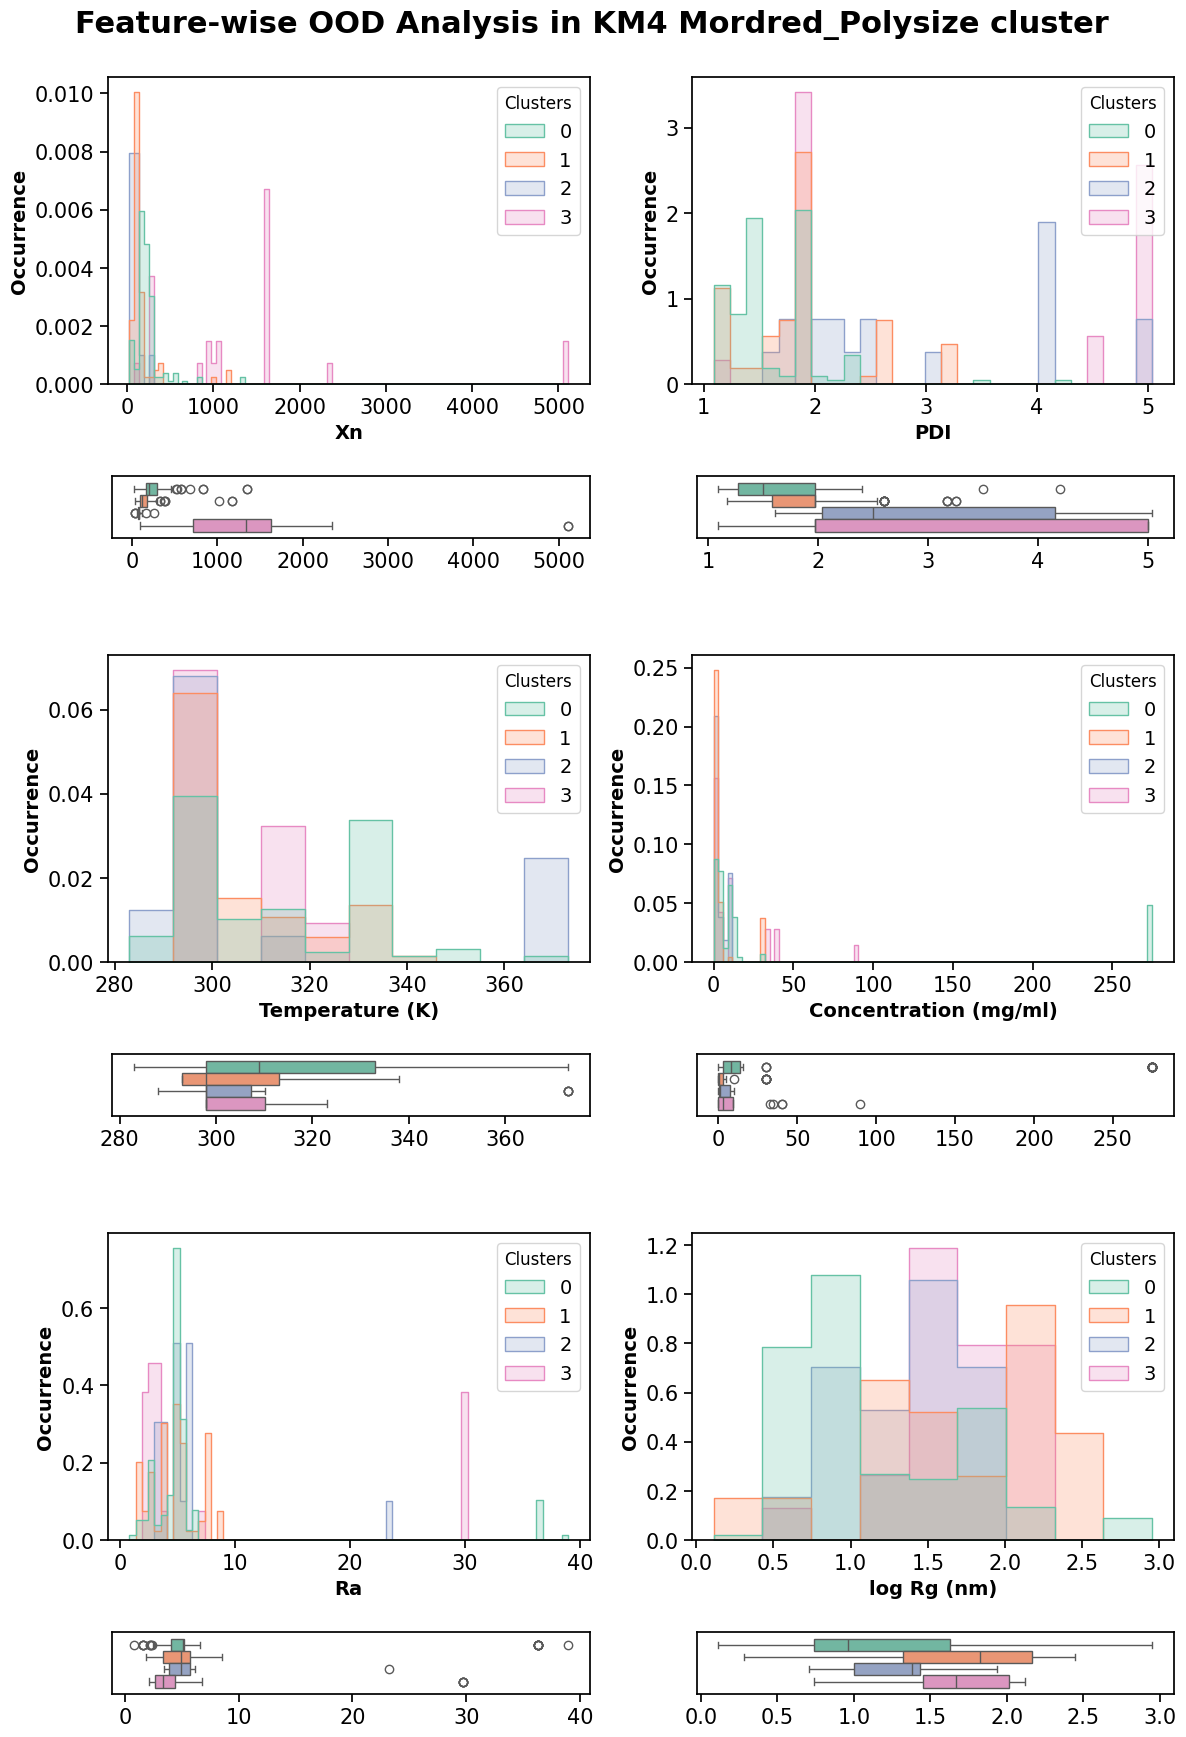

In [ ]:
plot_feature_ood_combined(
    Rg_data_test,
    target='log Rg (nm)',
    features=features,
    hue='KM4 Mordred_Polysize cluster',
    ncols=2  # You can change this to 3 or more if you prefer
)

### Draw structure of clusters

In [ ]:
def draw_cluster_structures(df:pd.DataFrame,cluster_labels:np.ndarray,medoid_point_indices:np.ndarray=None):
    cluster_smiles = df['Monomer SMILES'].tolist()
    cluster_mols = [Chem.MolFromSmiles(smiles) for smiles in cluster_smiles ]
    options = Draw.MolDrawOptions()
    legends=[str(f'Cluster {label}') for label in cluster_labels.tolist()]
    if medoid_point_indices is not None:
        for idx in medoid_point_indices:
            legends[idx] += " (Medoid)"
    options = Draw.MolDrawOptions()
    options.legendFontSize = 50
    img = Draw.MolsToGridImage(
        cluster_mols,
        legends=legends,
        molsPerRow=4,
        subImgSize=(800, 800),
        drawOptions=options
    )
    display(img)

In [ ]:
# draw_cluster_structures(Rg_unique_data,HBD3_label_Rg)

In [ ]:
# draw_cluster_structures(Rg_Rh_unique_data,KMedoids6_label,medoids6)

# Sub-structure Clustering

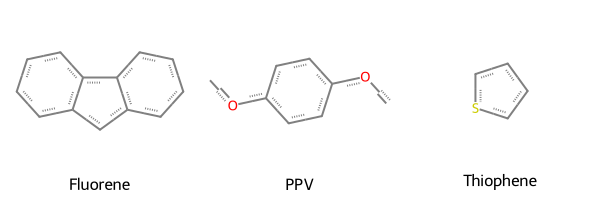

In [ ]:
patterns = {
    "Fluorene": "c1ccc3c(c1)Cc2ccccc23",  # Fluorene pattern
    "PPV": "COc1ccc(OC)cc1",  # Phenylenevinylene pattern
    "Thiophene": "c1ccsc1"  # Thiophene pattern
}

# Convert SMARTS to RDKit Mol objects
mols = [Chem.MolFromSmarts(smarts) for smarts in patterns.values()]

# Generate image
img = Draw.MolsToGridImage(mols, molsPerRow=3, legends=list(patterns.keys()))
img

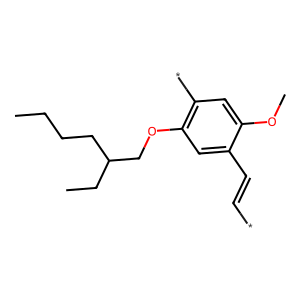

SMILES: */C=C/c1cc(OCC(CC)CCCC)c(*)cc1OC
Category: PPV



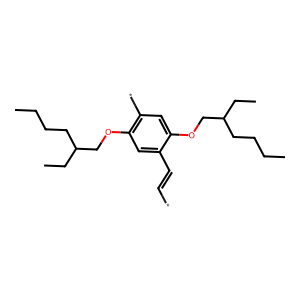

SMILES: */C=C/c1cc(OCC(CC)CCCC)c(*)cc1OCC(CC)CCCC
Category: PPV



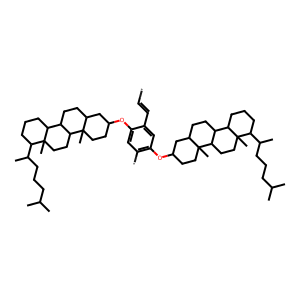

SMILES: */C=C/c1cc(OC2CCC3(C)C(CCC4C3CCC3(C)C(C(C)CCCC(C)C)CCCC43)C2)c(*)cc1OC1CCC2(C)C(CCC3C2CCC2(C)C(C(C)CCCC(C)C)CCCC32)C1
Category: PPV



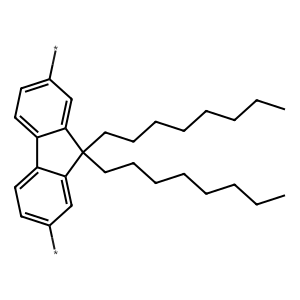

SMILES: *c1ccc2c(c1)C(CCCCCCCC)(CCCCCCCC)c1cc(*)ccc1-2
Category: Fluorene



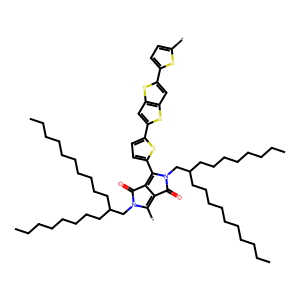

SMILES: *C1=C2C(=O)N(CC(CCCCCCCC)CCCCCCCCCC)C(c3ccc(-c4cc5sc(-c6ccc(*)s6)cc5s4)s3)=C2C(=O)N1CC(CCCCCCCC)CCCCCCCCCC
Category: Thiophene



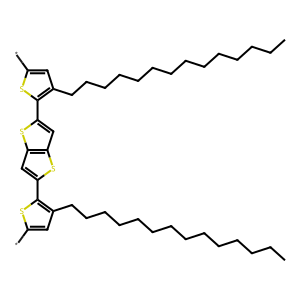

SMILES: *c1cc(CCCCCCCCCCCCCC)c(-c2cc3sc(-c4sc(*)cc4CCCCCCCCCCCCCC)cc3s2)s1
Category: Thiophene



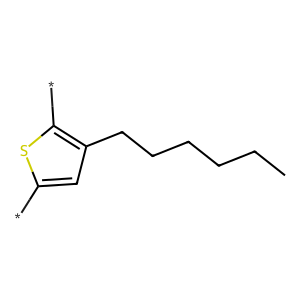

SMILES: *c1cc(CCCCCC)c(*)s1
Category: Thiophene



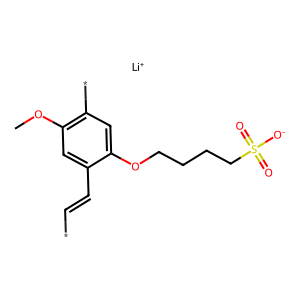

SMILES: */C=C/c1cc(OC)c(*)cc1OCCCCS(=O)(=O)[O-].[Li+]
Category: PPV



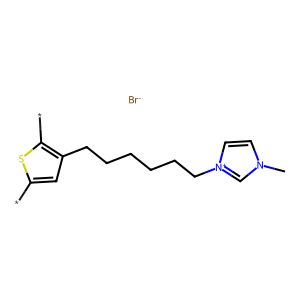

SMILES: *c1cc(CCCCCC[n+]2ccn(C)c2)c(*)s1.[Br-]
Category: Thiophene



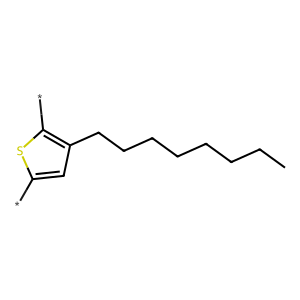

SMILES: *c1cc(CCCCCCCC)c(*)s1
Category: Thiophene



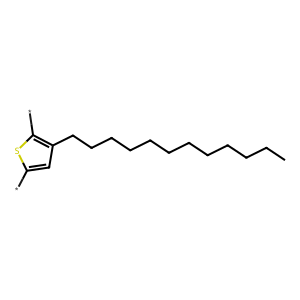

SMILES: *c1cc(CCCCCCCCCCCC)c(*)s1
Category: Thiophene



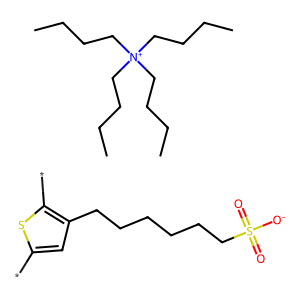

SMILES: *c1cc(CCCCCCS(=O)(=O)[O-])c(*)s1.CCCC[N+](CCCC)(CCCC)CCCC
Category: Thiophene



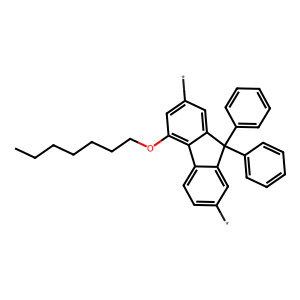

SMILES: *c1ccc2c(c1)C(c1ccccc1)(c1ccccc1)c1cc(*)cc(OCCCCCCC)c1-2
Category: Fluorene



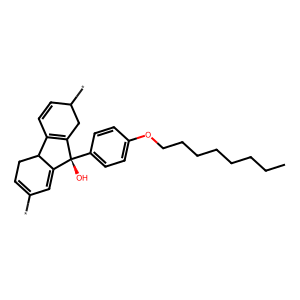

SMILES: *C1=CCC2C(=C1)[C@@](O)(c1ccc(OCCCCCCCC)cc1)C1=C2C=CC(*)C1
Category: Fluorene



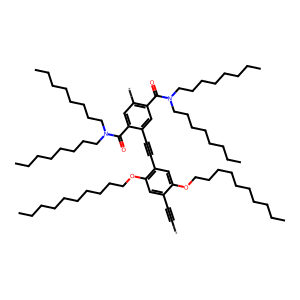

SMILES: *C#Cc1cc(OCCCCCCCCCC)c(C#Cc2cc(C(=O)N(CCCCCCCC)CCCCCCCC)c(*)cc2C(=O)N(CCCCCCCC)CCCCCCCC)cc1OCCCCCCCCCC
Category: PPV



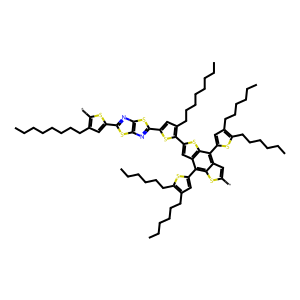

SMILES: *c1cc2c(-c3cc(CCCCCC)c(CCCCCC)s3)c3sc(-c4sc(-c5nc6sc(-c7cc(CCCCCCCC)c(*)s7)nc6s5)cc4CCCCCCCC)cc3c(-c3cc(CCCCCC)c(CCCCCC)s3)c2s1
Category: Thiophene



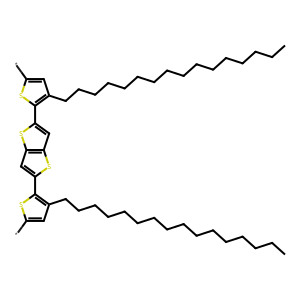

SMILES: *c1cc(CCCCCCCCCCCCCCCC)c(-c2cc3sc(-c4sc(*)cc4CCCCCCCCCCCCCCCC)cc3s2)s1
Category: Thiophene



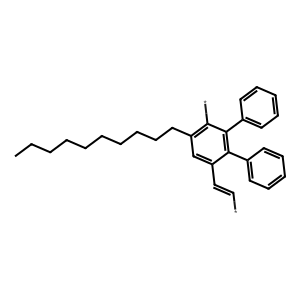

SMILES: */C=C/c1cc(CCCCCCCCCC)c(*)c(-c2ccccc2)c1-c1ccccc1
Category: PPV



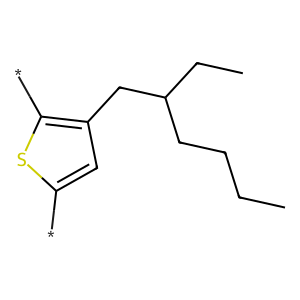

SMILES: *c1cc(CC(CC)CCCC)c(*)s1
Category: Thiophene



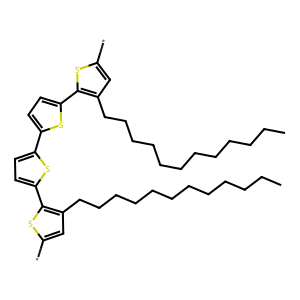

SMILES: *c1cc(CCCCCCCCCCCC)c(-c2ccc(-c3ccc(-c4sc(*)cc4CCCCCCCCCCCC)s3)s2)s1
Category: Thiophene



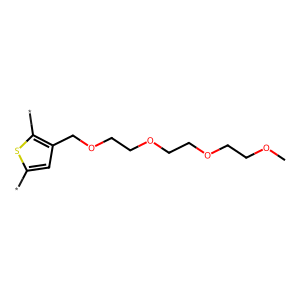

SMILES: *c1cc(COCCOCCOCCOC)c(*)s1
Category: Thiophene



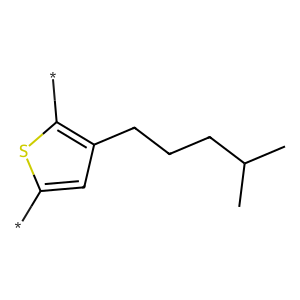

SMILES: *c1cc(CCCC(C)C)c(*)s1
Category: Thiophene



In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw


def categorize_molecule(smiles):
    mol = Chem.MolFromSmiles(Chem.CanonSmiles(smiles))
    for category, smarts in patterns.items():
        pattern = Chem.MolFromSmarts(smarts)
        if mol.HasSubstructMatch(pattern):
            return category

        if smiles ==	"*C1=CCC2C(=C1)[C@@](O)(c1ccc(OCCCCCCCC)cc1)C1=C2C=CC(*)C1":
          return "Fluorene"

        if  smiles == "*/C=C/c1cc(CCCCCCCCCC)c(*)c(-c2ccccc2)c1-c1ccccc1":
          return "PPV"


# Example list of molecules with their SMILES
molecule_smiles = Rg_unique_data['Monomer SMILES'].to_list()
# Categorize each molecule
categorized_molecules = {smiles: categorize_molecule(smiles) for smiles in molecule_smiles}

# Visualize and display the molecules
for smiles, category in categorized_molecules.items():
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol)
    display(img)
    print(f"SMILES: {smiles}\nCategory: {category}\n")


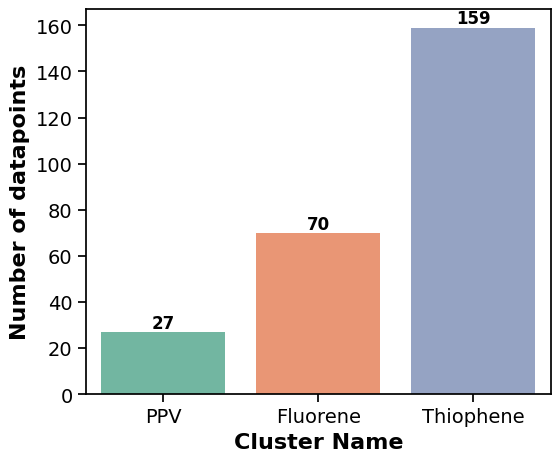

In [ ]:
Rg_data_test['substructure cluster'] = Rg_data['Monomer SMILES'].apply(categorize_molecule)

plot_cluster_count(Rg_data_test,'substructure cluster',fig_size=(6,5))

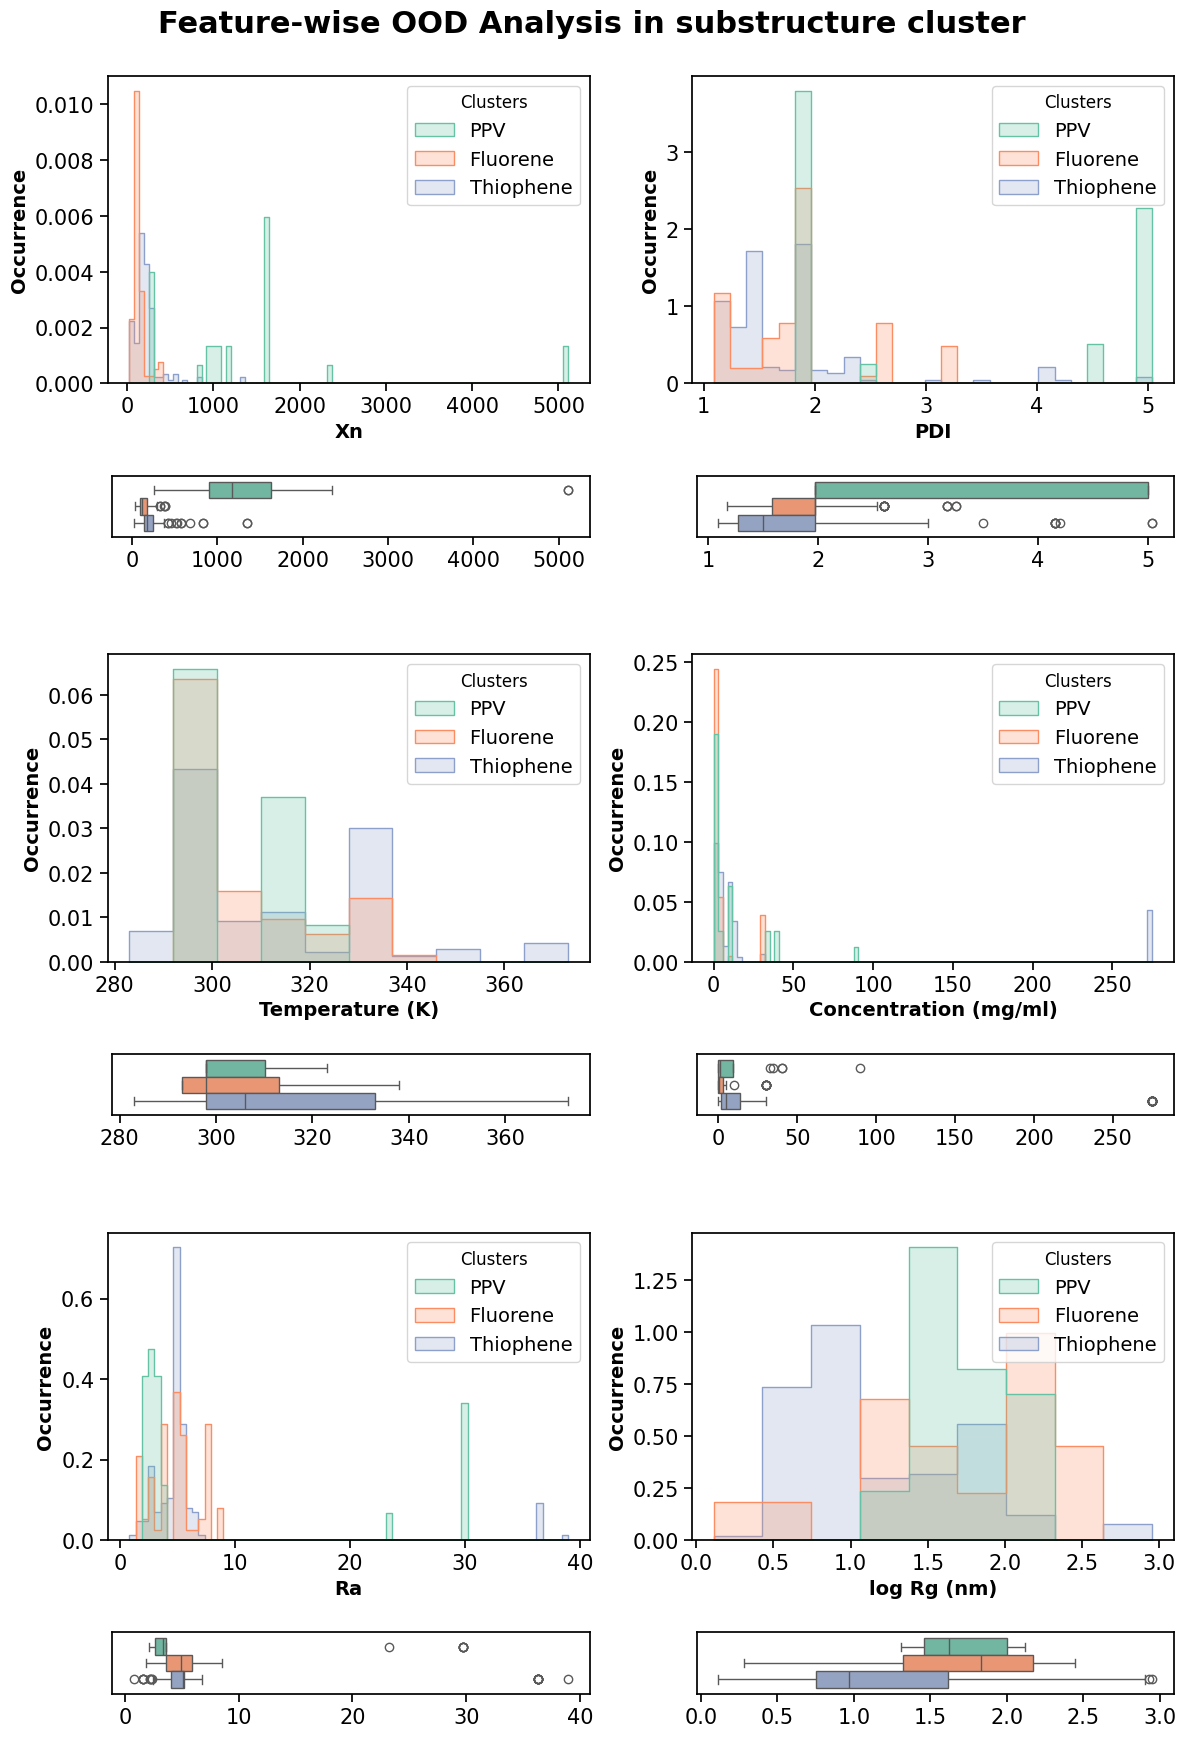

In [ ]:
plot_feature_ood_combined(
    Rg_data_test,
    target='log Rg (nm)',
    features=features,
    hue='substructure cluster',
    ncols=2  # You can change this to 3 or more if you prefer
)

# Ethylene Glycol + Ionic

In [ ]:
eg_mol = Chem.MolFromSmiles('COCCOC')
ionic_mol = Chem.MolFromSmarts('[+,-]')


def determine_side_chain_type(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles, sanitize=True)
        if not mol:
            return "Invalid SMILES"

        if mol.HasSubstructMatch(ionic_mol) or  mol.HasSubstructMatch(eg_mol):
            return "Polar"

        else:
             return "Alkyl"

    except Exception as e:
        print(f"Error processing SMILES {smiles}: {e}")
        return "Error"


Rg_unique_data_test["Side Chain cluster"] = Rg_unique_data_test["Trimer SMILES"].apply(determine_side_chain_type)
Rg_data_test["Side Chain cluster"] = Rg_data_test["Trimer SMILES"].apply(determine_side_chain_type)

In [ ]:
def display_molecules(df, structure_type:str=None):
    molecules = []
    captions = []
    for _, row in df.iterrows():
        smiles = row['Monomer SMILES']

        mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to RDKit molecule

        if mol:
            molecules.append(mol)
            if structure_type:
                captions.append(f"{row['canonical_name']} ,\n structure_type: {row[structure_type]}")
            else:
                captions.append(f"{row['canonical_name']}")
        else:
            print(f"Invalid SMILES skipped: {smiles}")

    options = Draw.MolDrawOptions()
    options.legendFontSize = 70

    # Draw molecules with captions
    img = Draw.MolsToGridImage(
        molecules,
        legends=captions,
        molsPerRow=4,  # Adjust based on how many structures you want in a row
        subImgSize=(1000, 1000),  # Image size for each molecule,
        drawOptions=options
    )
    # Display the image
    display(img)


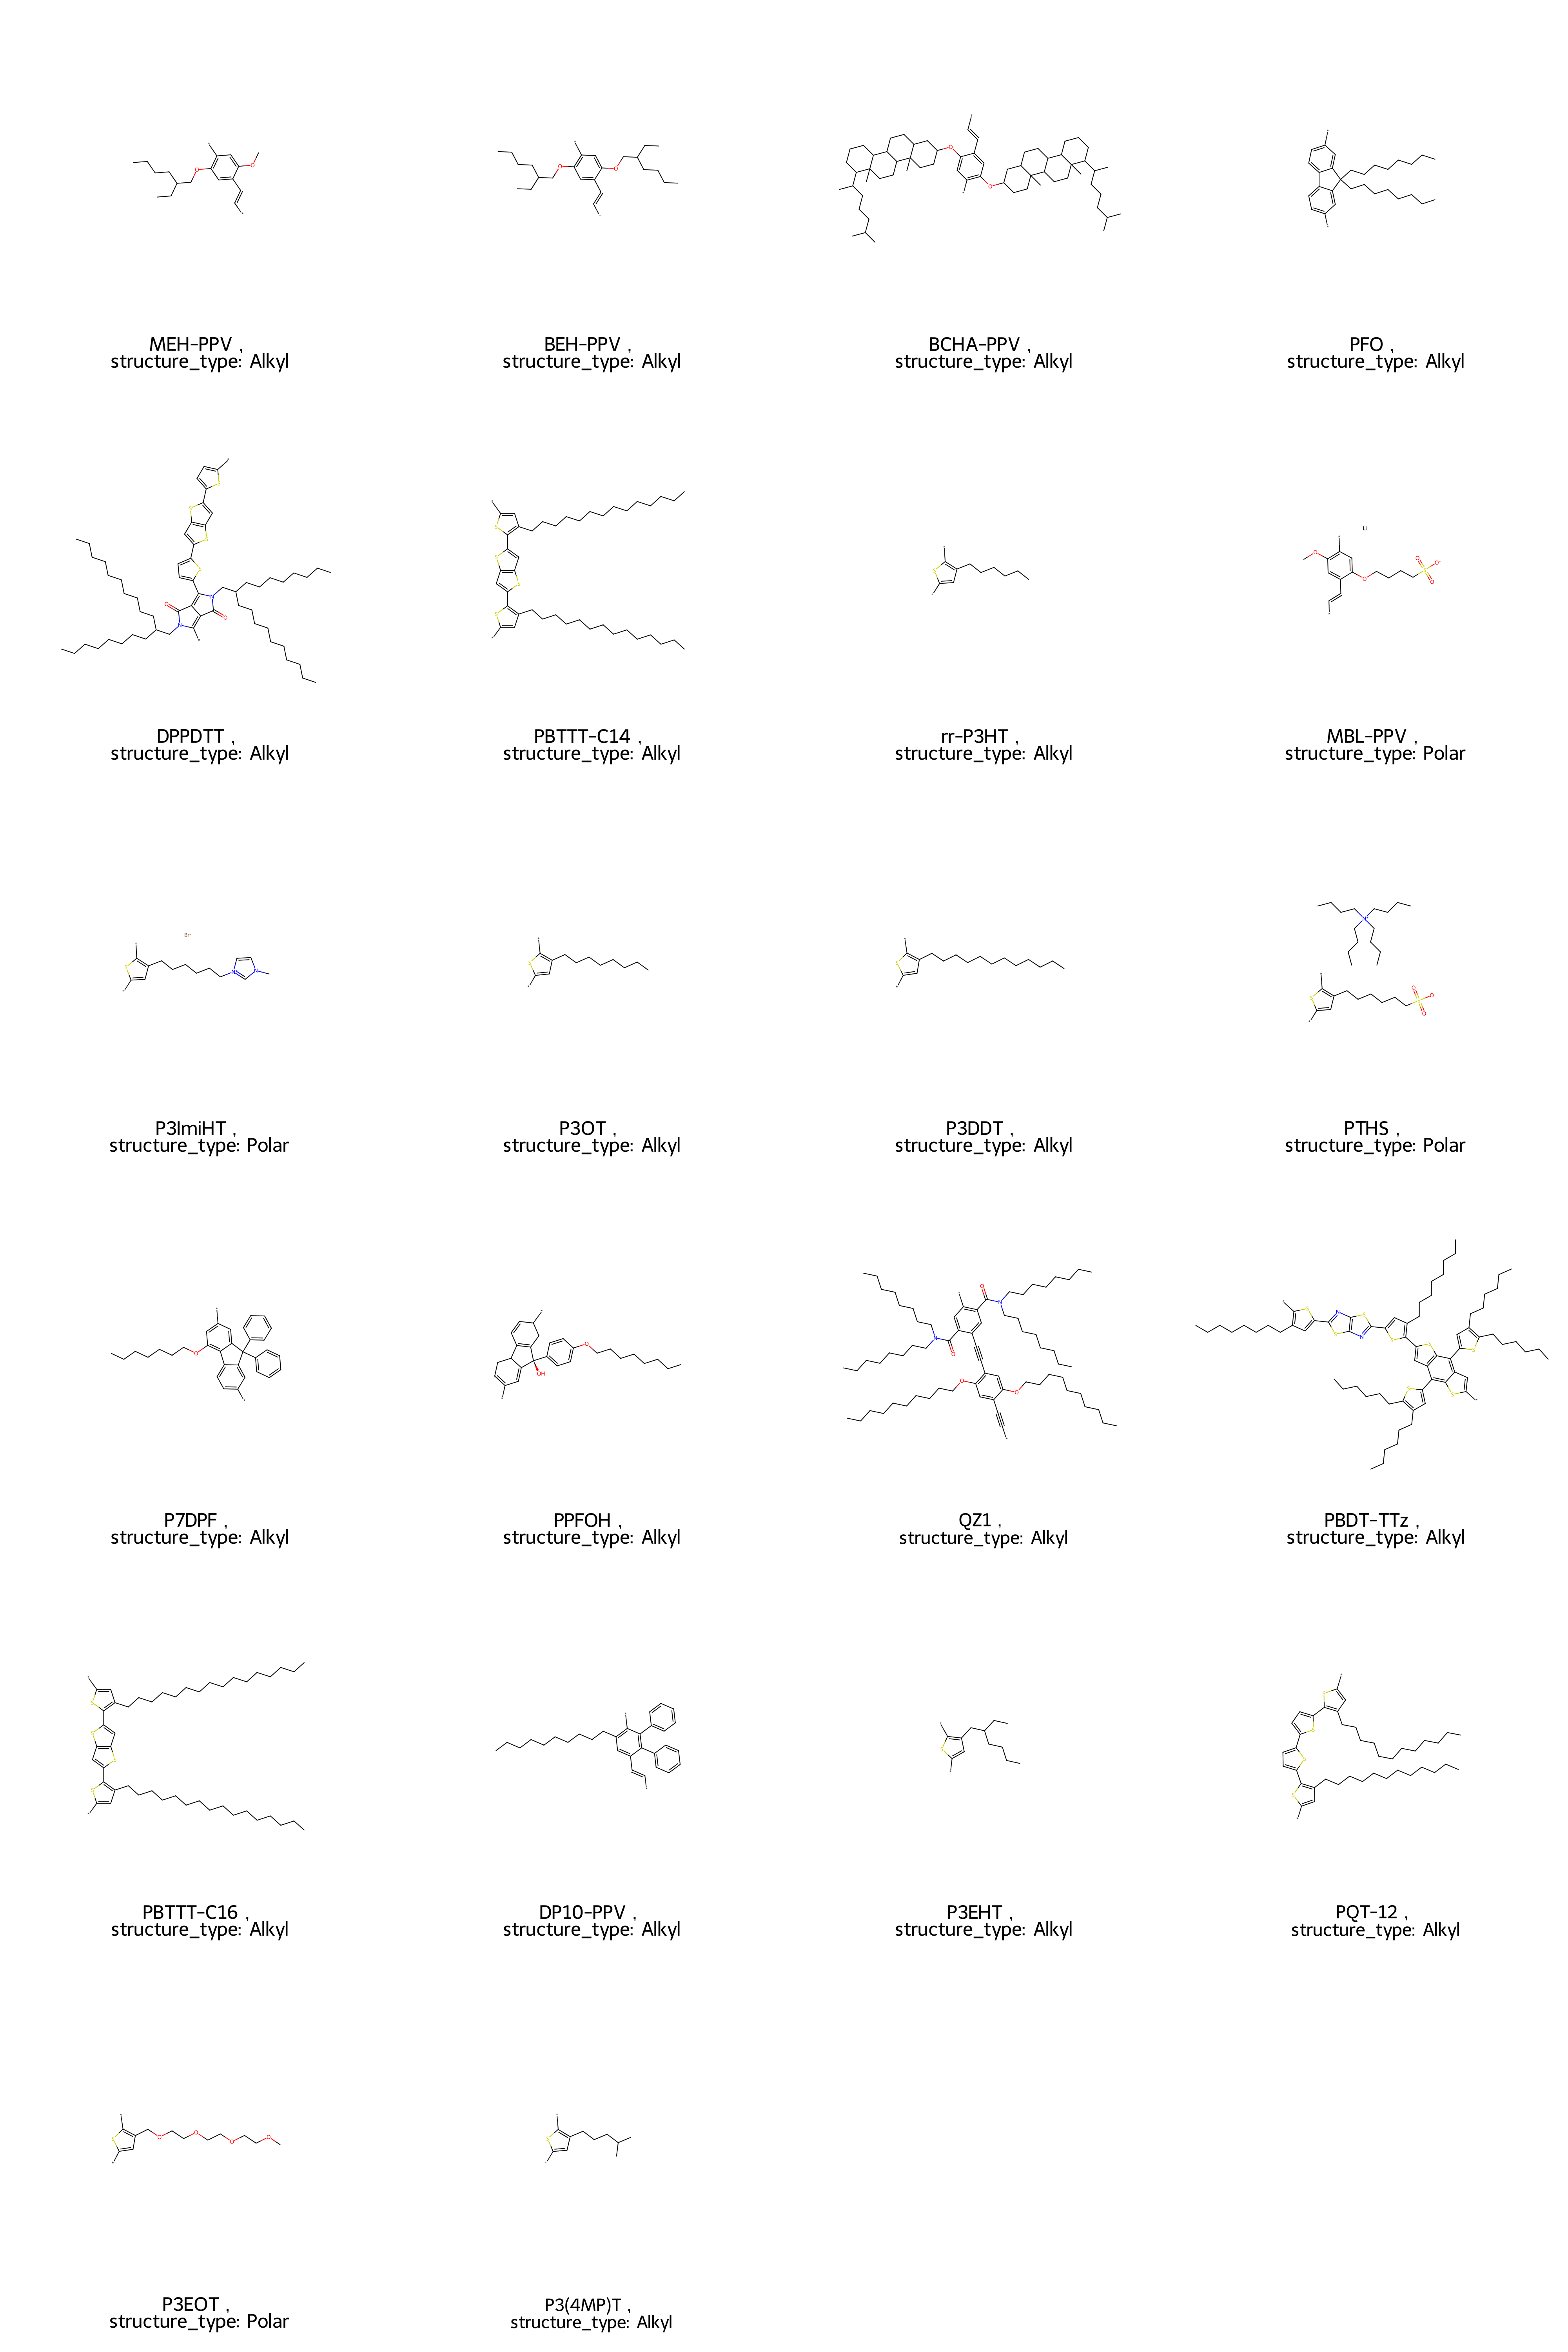

In [ ]:
display_molecules(Rg_unique_data_test,'Side Chain cluster')

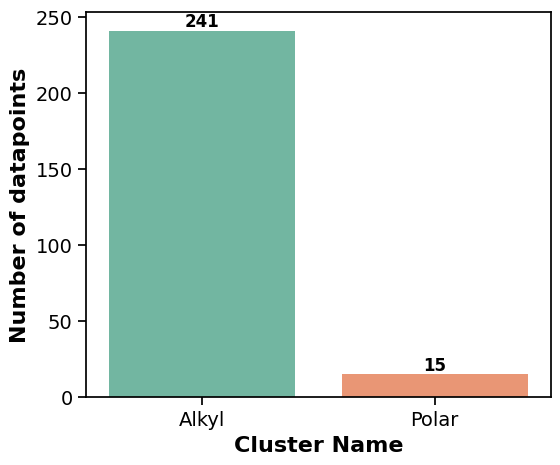

In [ ]:
plot_cluster_count(Rg_data_test,x_label="Side Chain cluster",fig_size=(6,5))

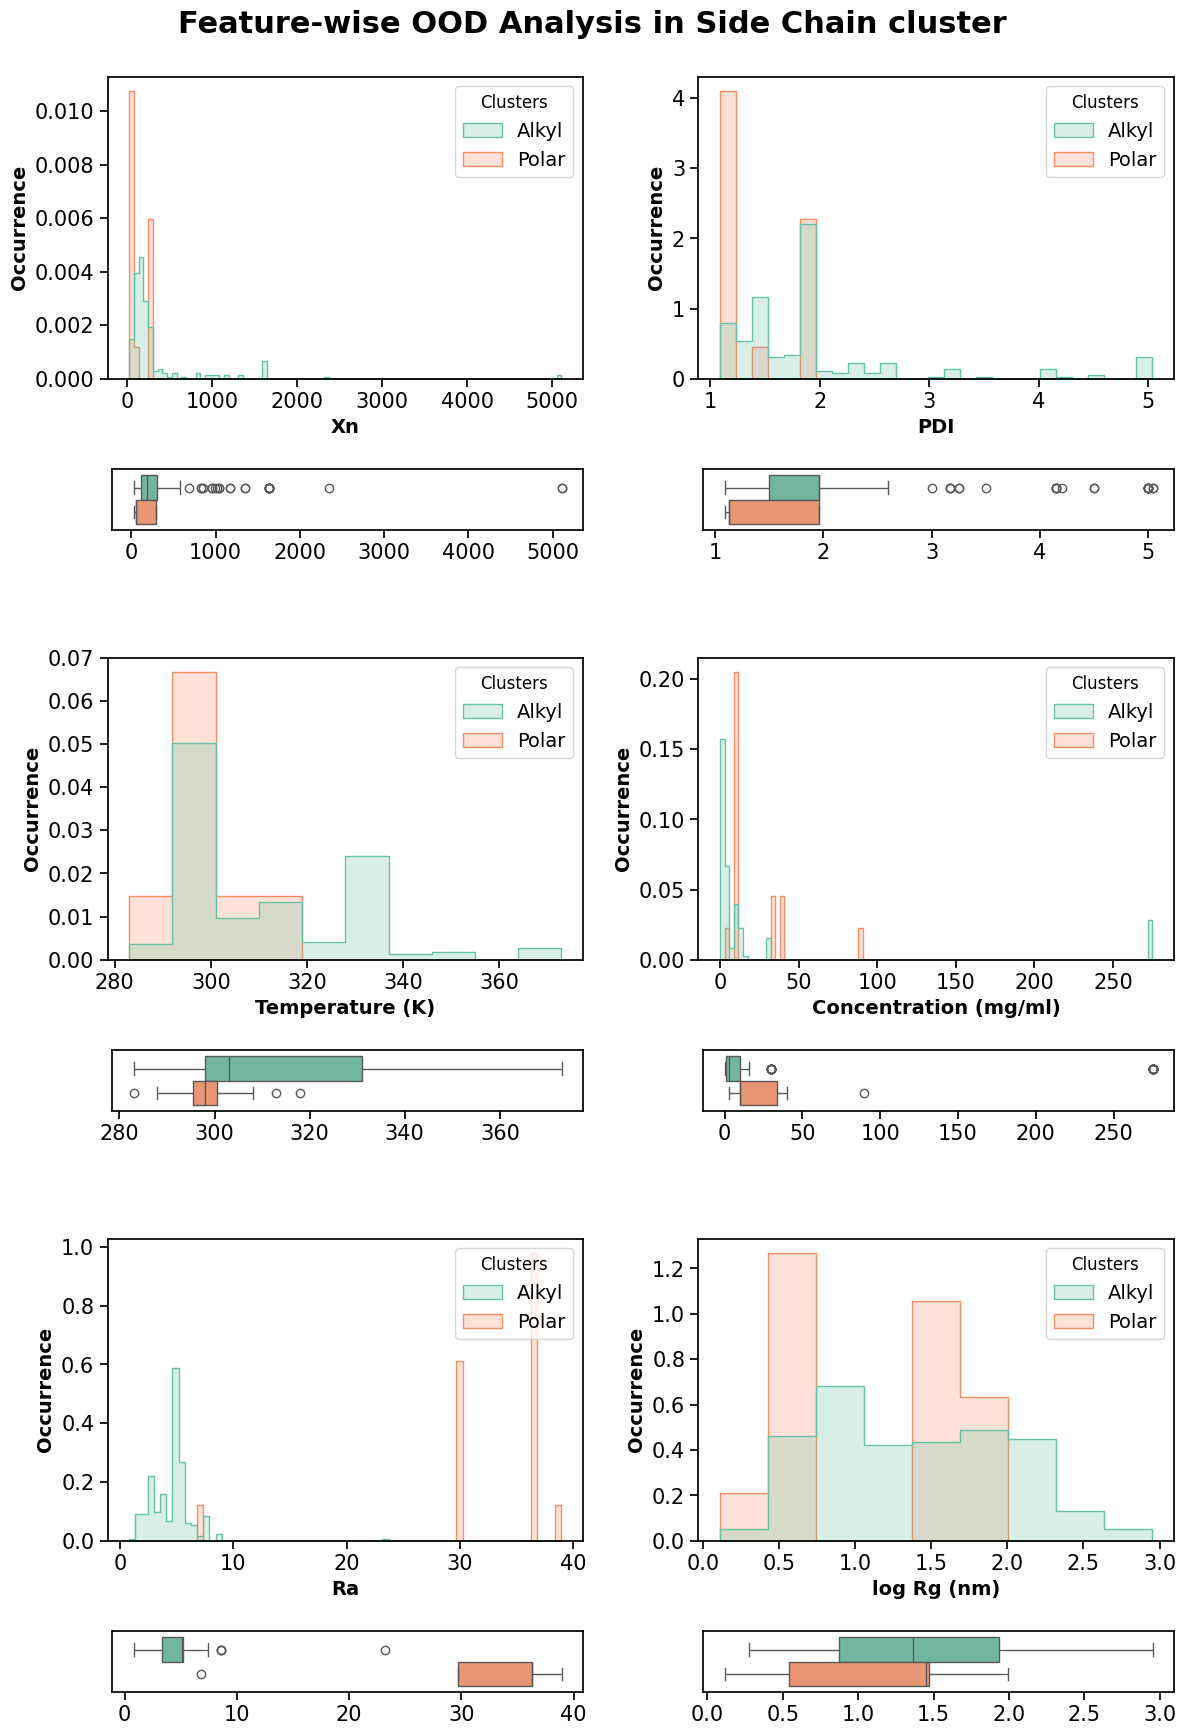

In [ ]:
plot_feature_ood_combined(
    Rg_data_test,
    target='log Rg (nm)',
    features=features,
    hue='Side Chain cluster',
    ncols=2  # You can change this to 3 or more if you prefer
)

In [ ]:
# for feat in features:
#   plot_feature_ood(Rg_data,target='Rg1 (nm)',column_to_draw=feat,hue="EG-Ionic-Based Cluster")

#Save dataset

In [ ]:
Rg_data_test.to_pickle(data_folder/'Rg data with clusters aging imputed.pkl')
Rg_data_test.to_csv(data_folder/'Rg data with clusters aging imputed.csv')

# OOD map and reduced dimensions

In [ ]:
rg_clusters_map.columns.to_list()

['name',
 'Mw (g/mol)',
 'Mn (g/mol)',
 'PDI',
 'Regioregularity R%',
 'DP',
 'SANS',
 'SAXS/GWAXS',
 'DLS',
 'SLS',
 'SEC (GPC)',
 'DLS Angle (deg)',
 'Concentration (mg/ml)',
 'Temperature SANS/SLS/DLS/SEC (K)',
 'Dark/light',
 'Applied Electrical Field (Kv/cm)',
 'Duration of Applied Electrical Field (min)',
 'Aging type',
 'Aging temp (K)',
 'Sonic/stir (bool)',
 'E field (kV/cm)',
 'Illumination (lux)',
 'Aging time (hour)',
 'To Aging Temperature (K)',
 'Stirring /heating time(min)',
 'Sonication time (min)',
 'Sonication/Stirring/heating Temperature (K)',
 'storage temperature (K)',
 'Storage time (hour)',
 'Solvent(s)',
 'Deuterated solvent',
 'Solid additive',
 'Solid additive quantity (mg/ml)',
 'Solvent solubility parameter (Hansen)',
 'Polymer solubility parameter ',
 'Polymer solubility parameter 𝛿d [MPa1/2]',
 'Polymer solubility parameter  𝛿p [MPa1/2]',
 'Polymer solubility parameter 𝛿h [MPa1/2]',
 'Rh1 (nm)',
 'I1 (Normalized 1-0)',
 'Rh2 (nm)',
 'I2 (Normalized 1-0)',


In [5]:
rg_clusters_map: pd.DataFrame = pd.read_pickle(data_folder/'Rg data with clusters aging imputed.pkl')

<Axes: xlabel='PDI', ylabel='Count'>

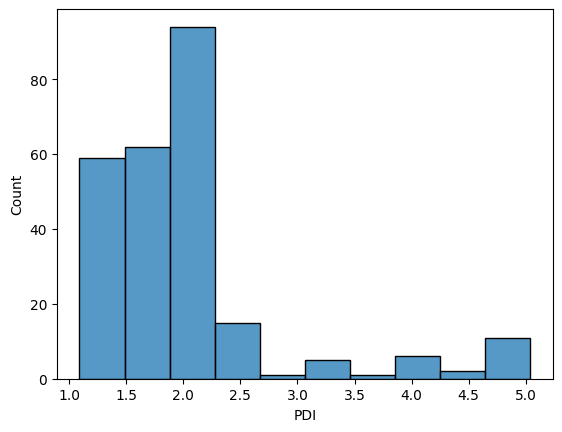

In [6]:
sns.histplot(data=rg_clusters_map, x='PDI', bins=10, kde=False)


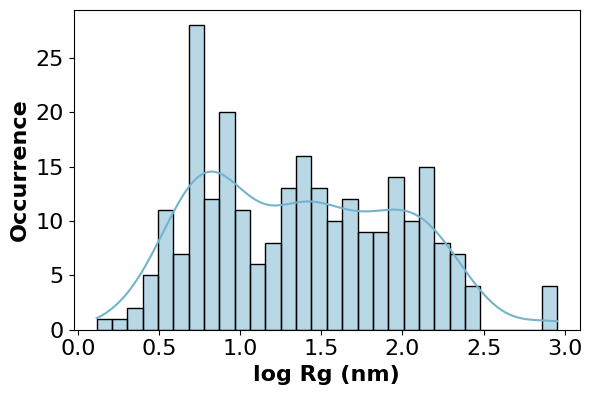

In [7]:
from matplotlib.gridspec import GridSpec

def plot_distribution_with_box(data, feature, fontsize=14, figsize=(6, 5)):
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(2, 1, height_ratios=[4, 1])

    # Main histogram with KDE
    ax_main = fig.add_subplot(gs[0])
    sns.histplot(data[feature], kde=True, bins=30, ax=ax_main, color='#74B3CE')
    ax_main.set_ylabel('Occurrence', fontsize=fontsize,fontweight='bold')
    # ax_main.set_title(f'Distribution of {feature}', fontsize=fontsize)
    ax_main.tick_params(labelsize=fontsize)
    ax_main.set_xlabel(feature, fontsize=fontsize,fontweight='bold')

    # Boxplot below
    # ax_box = fig.add_subplot(gs[1], sharex=ax_main)
    # sns.boxplot(x=data[feature], ax=ax_box, color='#259AC1')
    # ax_box.set_xlabel('')
    # ax_box.set_yticks([])  # Remove y-axis ticks
    # ax_box.tick_params(labelsize=fontsize)

    plt.tight_layout()
    plt.show()

plot_distribution_with_box(rg_clusters_map, feature='log Rg (nm)',fontsize=16)

# plot_distribution_with_box(clean_rg, feature='Rg1 (nm)',fontsize=16)


## t-SNE

In [8]:
sd_caler = StandardScaler()
HSP_vector = rg_clusters_map[['solvent dP','polymer dP','solvent dD', 'polymer dD','solvent dH','polymer dH']].to_numpy(dtype=float)
all_features = ['Xn',  'PDI', 'Temperature SANS/SLS/DLS/SEC (K)', 'Concentration (mg/ml)',
                'solvent dD', 'solvent dH', 'solvent dP',
                'polymer dD', 'polymer dH', 'polymer dP',
                "Dark/light", "Aging time (hour)", "To Aging Temperature (K)", "Sonication/Stirring/heating Temperature (K)", "Merged Stirring /sonication/heating time(min)"
                ]

solvent_prop_vec = ['Temperature SANS/SLS/DLS/SEC (K)', 'Concentration (mg/ml)',
                'solvent dD', 'solvent dH', 'solvent dP',
                    ]

polysize_vec = ['Xn','Mw (g/mol)', 'PDI']


sd_scaler_all = StandardScaler()
scaled_all_features = sd_scaler_all.fit_transform(rg_clusters_map[all_features])

sd_scaler_solv = StandardScaler()
scaled_solv_prop_features = sd_scaler_solv.fit_transform(rg_clusters_map[solvent_prop_vec])

sd_scaler_poly = StandardScaler()
scaled_polysize_features = sd_scaler_poly.fit_transform(rg_clusters_map[polysize_vec])

In [9]:
def plot_correlation_per_cluster(features: list, cluster_col: str,
                                 data: pd.DataFrame,fontsize=16,figsize=(20, 9)):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.stats import spearmanr
    import numpy as np

    target = 'log Rg (nm)'
    # clusters = data[cluster_col].unique().tolist()
    n_features = len(features)
    clusters = sorted(
        data[cluster_col].unique(),
        key=lambda x: int(x) if str(x).isdigit() else x
    )
    # If cluster_col is 'substructure cluster', also add 'Polar' group from 'Side Chain Cluster'
    if cluster_col == 'substructure cluster':
        clusters.append('Polar')  # This ensures Polar comes last

    n_clusters = len(clusters)
    palette = sns.color_palette("tab10", n_features)

    # Prepare correlation storage
    test_corrs = {feature: [] for feature in features}
    train_corrs = {feature: [] for feature in features}

    for feature in features:
        for cluster in clusters:
            if cluster_col == 'substructure cluster' and cluster == 'Polar':
                test_subset = data[data[ 'Side Chain cluster'] == 'Polar']
                train_subset = data[data[ 'Side Chain cluster'] != 'Polar']
            else:
                test_subset = data[data[cluster_col] == cluster]
                train_subset = data[data[cluster_col] != cluster]

            test_corr, _ = spearmanr(test_subset[feature], test_subset[target])
            train_corr, _ = spearmanr(train_subset[feature], train_subset[target])

            test_corrs[feature].append(test_corr)
            train_corrs[feature].append(train_corr)

    # Plotting
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title("Spearman Correlation per Cluster", fontsize=fontsize + 4)
    bar_group_width = 0.8
    bar_width = bar_group_width / (2 * n_features)
    x = np.arange(n_clusters)
    for i, feature in enumerate(features):
        offset_test = (i - n_features / 2) * 2 * bar_width + bar_width / 2
        offset_train = offset_test + bar_width

        test_values = test_corrs[feature]
        train_values = train_corrs[feature]

        # Test (opaque)
        ax.bar(
            x + offset_test,
            test_values,
            bar_width,
            label=f'{feature} (test)',
            color=palette[i],
            edgecolor='black',
            alpha=1.0
        )

        # Train (transparent)
        ax.bar(
            x + offset_train,
            train_values,
            bar_width,
            label=f'{feature} (train)',
            color=palette[i],
            edgecolor='black',
            alpha=0.4
        )

    ax.set_xticks(x)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_xticklabels(clusters, rotation=45,fontsize=fontsize)
    ax.set_ylabel("Spearman Correlation with log Rg (nm)",fontsize=fontsize+2)
    ax.set_xlabel("Cluster",fontsize=fontsize+2)
    ax.set_ylim(-1, 1)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=fontsize-2)
    plt.tight_layout()
    plt.show()


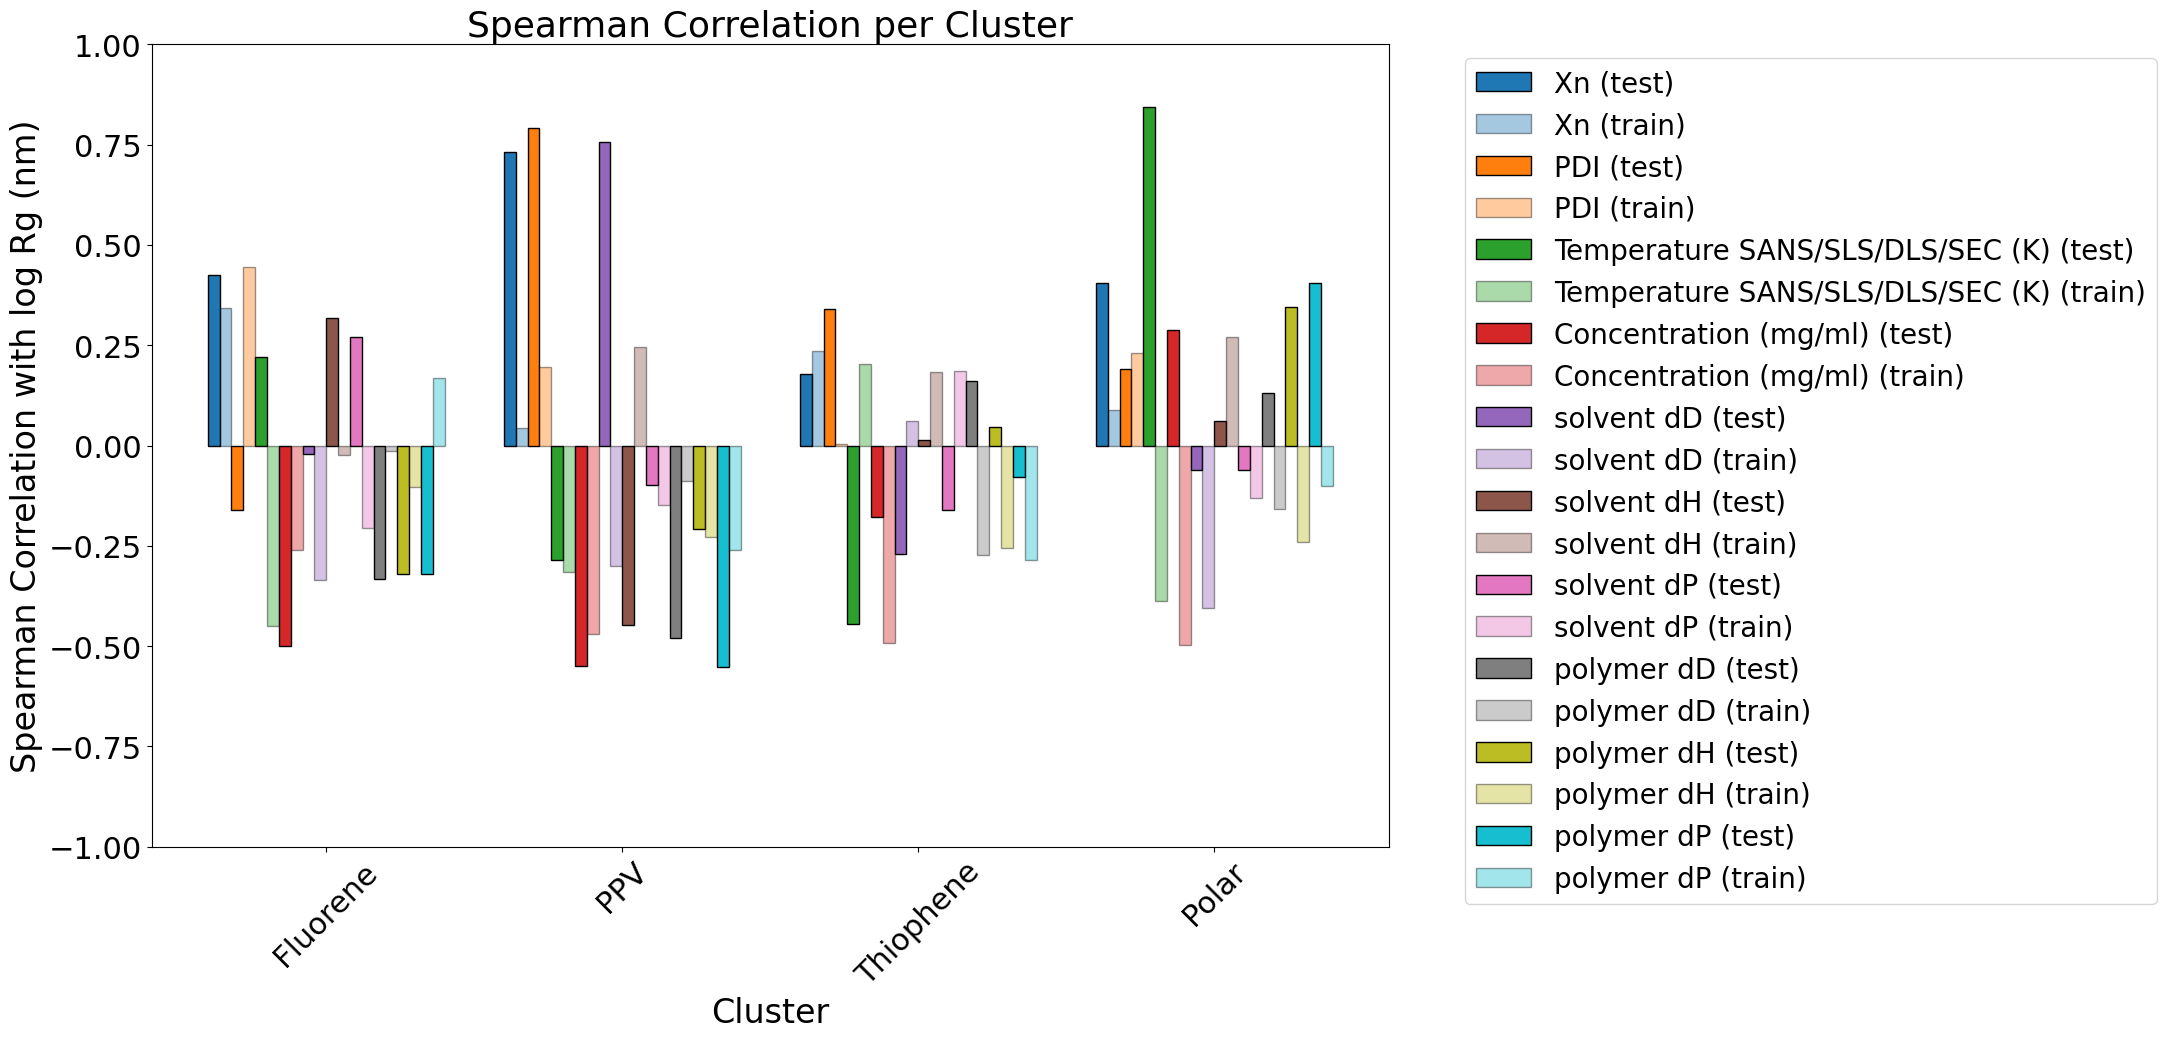

In [10]:
features = ['Xn',  'PDI', 'Temperature SANS/SLS/DLS/SEC (K)', 'Concentration (mg/ml)',
                'solvent dD', 'solvent dH', 'solvent dP',
                'polymer dD', 'polymer dH', 'polymer dP',
                # "Dark/light", "Aging time (hour)", "To Aging Temperature (K)", "Sonication/Stirring/heating Temperature (K)", "Merged Stirring /sonication/heating time(min)"
                ]
plot_correlation_per_cluster(features, 'substructure cluster', rg_clusters_map,fontsize=22, figsize=(22,10.5))

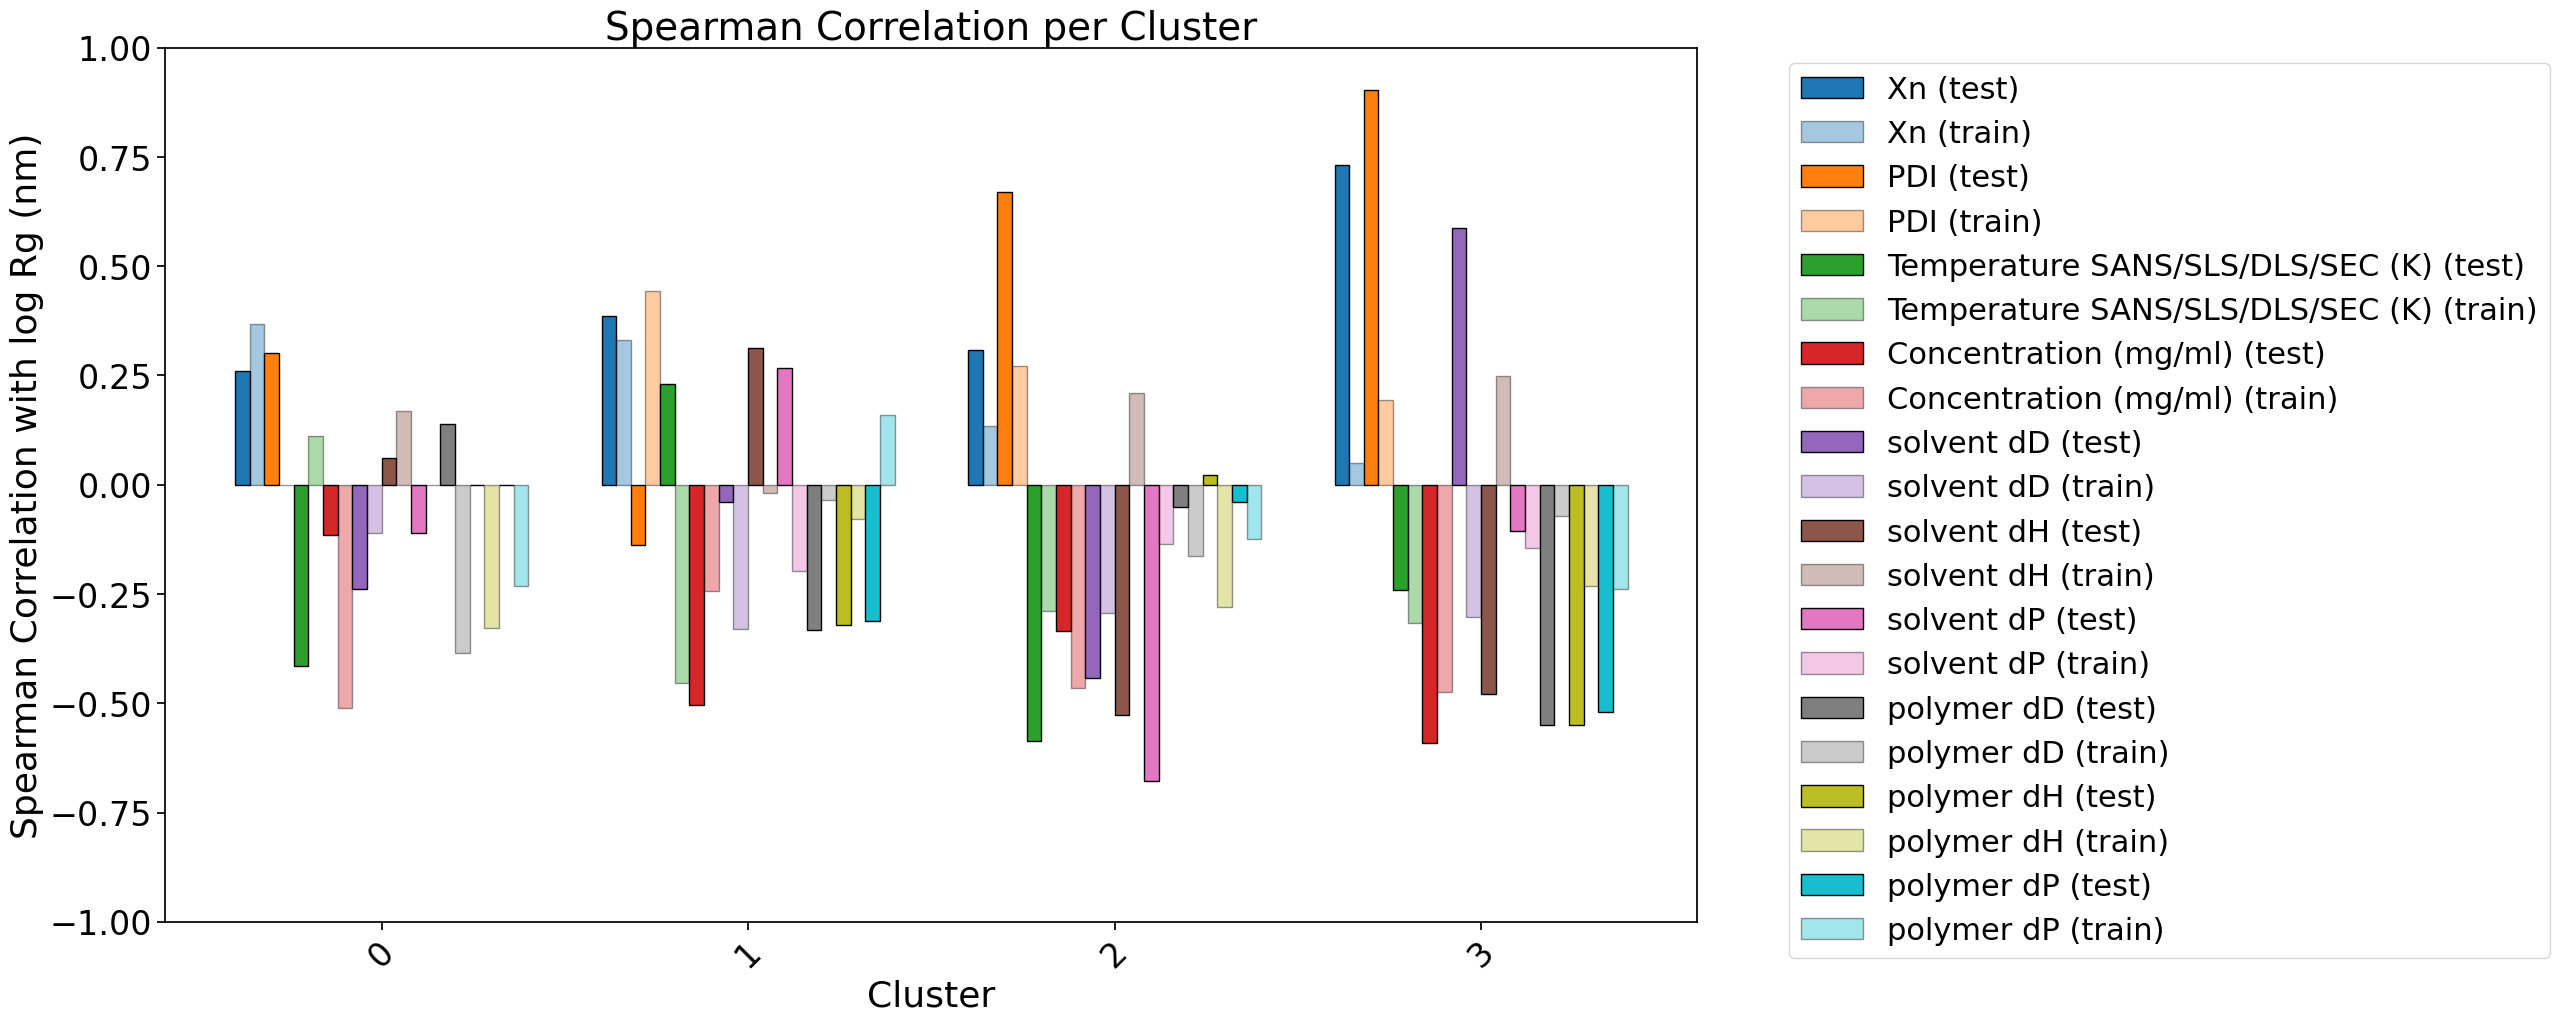

In [ ]:
plot_correlation_per_cluster(features, 'KM4 Mordred_Polysize cluster', rg_clusters_map,fontsize=24, figsize=(26,10.5))

In [20]:
def reduce_dim(fp_vector,metric,perplexity):
  tsne = TSNE(n_components=2, metric=naming[metric], random_state=42,perplexity=perplexity)
  tsne_results = tsne.fit_transform(fp_vector)
  return tsne_results

In [11]:
def plot_tsne_interactive(vector: np.array, cluster_col: str, metric: str, perplexity: int, data: pd.DataFrame, title: str = ''):
    # Reduce the dimensionality
    tsne_data = reduce_dim(vector, metric, perplexity)

    # Create DataFrame for Plotly
    tsne_df = pd.DataFrame({
        't-SNE 1': tsne_data[:, 0],
        't-SNE 2': tsne_data[:, 1],
        'Cluster': data[cluster_col].astype(str),
        'Polymer Name': data['canonical_name'],
        'Index': data.index,
    })

    # Define Set2 color palette manually (up to 8 colors)
    set2_colors = [
        '#fc8d62','#66c2a5', '#8da0cb', '#e78ac3',
        '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3'
    ]

    # Get unique clusters and assign color
    unique_clusters = tsne_df['Cluster'].unique()
    cluster_color_map = {cluster: set2_colors[i % len(set2_colors)] for i, cluster in enumerate(unique_clusters)}

    # Add color column
    tsne_df['Color'] = tsne_df['Cluster'].map(cluster_color_map)

    # Create interactive plot
    fig = px.scatter(
        tsne_df, x='t-SNE 1', y='t-SNE 2',
        color='Cluster',
        color_discrete_map=cluster_color_map,
        hover_data={'Polymer Name': True, 'Index': True, 'Cluster': True},
        title=title,
        width=800,
        height=700
    )

    # Update layout to remove grid and adjust fonts
    fig.update_layout(
        title_font_size=18,
        title_x=0.5,
        legend_title_text='Cluster',
        legend=dict(font=dict(size=12)),
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False)
    )

    # Update marker style
    fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))

    fig.show()

In [12]:
def calculate_wasserstein_distance(feature_space:np.ndarray, cluster_col:str,
                                   data:pd.DataFrame,fontsize:float=14,
                                   title:str="Wasserstein Distance Between Test vs. Train"):
  all_cat =  data[cluster_col].to_numpy()
  unique_all_clusters, label_counts = np.unique(all_cat, return_counts=True)
  wasserstein_scores = {}
  if cluster_col =='substructure cluster':
    side_chain_cat = data[ 'Side Chain cluster'].to_numpy()
    unique_side_clusters, label_counts = np.unique(side_chain_cat, return_counts=True)
    for test_label in unique_all_clusters:
      test_mask = all_cat == test_label
      train_mask = ~test_mask
      distance_scores= wasserstein_distance_nd(feature_space[test_mask],feature_space[train_mask])
      wasserstein_scores[test_label] = distance_scores
    for test_label in unique_side_clusters:
      test_mask = side_chain_cat == test_label
      train_mask = ~test_mask
      distance_scores= wasserstein_distance_nd(feature_space[test_mask],feature_space[train_mask])
      wasserstein_scores['Polar'] = distance_scores
      break

  else:
      for test_label in unique_all_clusters:
        test_mask = all_cat == test_label
        train_mask = ~test_mask
        distance_scores= wasserstein_distance_nd(feature_space[test_mask],feature_space[train_mask])
        wasserstein_scores[test_label] = distance_scores

  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(list(map(str, wasserstein_scores.keys())), wasserstein_scores.values(),
                color=sns.color_palette("Set2", len(wasserstein_scores)), edgecolor='black')
  ax.set_ylabel("Wasserstein Distance", fontsize=fontsize+4,fontweight='bold')
  ax.set_xlabel("Test Cluster", fontsize=fontsize+4,fontweight='bold')
  ax.set_title(title, fontsize=fontsize+4, fontweight='bold',pad=30)
  ax.tick_params(axis='x', labelsize=fontsize+2)
  ax.tick_params(axis='y', labelsize=fontsize+2)

  # Add value labels on top
  for bar in bars:
      height = bar.get_height()
      ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', fontsize=fontsize+2)

  plt.tight_layout()
  plt.show()

In [13]:
def plot_tsne(vector: np.array, cluster_col: str, metric: str, perplexity: int,
              data: pd.DataFrame, medoid_indices: list = None,
              title: str = '', fontsize: float = 14, figsize=(8, 7)):
    tsne_data = reduce_dim(vector, metric, perplexity)
    cluster_cat = data[cluster_col].to_numpy()

    unique_clusters, label_counts = np.unique(cluster_cat, return_counts=True)
    palette = sns.color_palette("Set2", len(unique_clusters))
    cluster_colors = {label: palette[i] for i, label in enumerate(unique_clusters)}

    fig, ax = plt.subplots(figsize=figsize)
    kde = sns.kdeplot(
        x=tsne_data[:, 0], y=tsne_data[:, 1],
        fill=True, cmap="Greys", alpha=0.4, levels=100, thresh=0.01,
        ax=ax, cbar=True, cbar_kws={'label': 'Density'}
    )

    # Remove ticks and tick labels from colorbar
    cbar_ax = kde.figure.axes[-1]
    if cbar_ax != ax:
        cbar_ax.set_yticks([])
        cbar_ax.set_yticklabels([])
        cbar_ax.tick_params(left=False, right=False)
        cbar_ax.set_ylabel("Density", fontsize=fontsize + 5)

    # Plot clusters
    for label in unique_clusters:
        indices = cluster_cat == label
        ax.scatter(tsne_data[indices, 0], tsne_data[indices, 1],
                   color=cluster_colors[label], label=f'{label}', alpha=0.9, s=50)

    # Overlay medoids with different shape
    if medoid_indices is not None:
        # Plot filled points (so they still look like cluster members)
        ax.scatter(tsne_data[medoid_indices, 0], tsne_data[medoid_indices, 1],
                  color='red', s=70, zorder=5)

        # Add diamond outline around them
        ax.scatter(tsne_data[medoid_indices, 0], tsne_data[medoid_indices, 1],
                  facecolors='none', edgecolors='gold',
                  marker='D', s=180, linewidths=2, label='Medoids', zorder=6)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(left=False, bottom=False)

    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),
        title_fontsize=fontsize,
        fontsize=fontsize + 3,
        ncol=len(unique_clusters) + (1 if medoid_indices is not None else 0),
        handletextpad=0.2
    )

    ax.set_title(title, fontsize=fontsize + 4, fontweight='bold', pad=65)
    plt.tight_layout(rect=[0, 0, 1, 1.05])
    plt.show()


In [14]:
oo_vectors = {
    "all features": {
        "vector": scaled_all_features,
        "perplexity": 10
    },
    "Xn + polysize": {
        "vector": scaled_polysize_features,
        "perplexity": 30
    },
    "solvent_properties + Solvent HSP": {
        "vector": scaled_solv_prop_features,
        "perplexity": 10
    },
    "HSP": {
        "vector": HSP_vector,
        "perplexity": 30
    }
}

cluster_list = [
    'KM4 ECFP6_Count_512bit cluster',
    'KM3 Mordred cluster',
    'substructure cluster',
    'KM4 polymer_solvent HSP cluster',
    'KM4 Mordred_Polysize cluster',
     'Side Chain cluster',
]


In [15]:
features

['Xn',
 'PDI',
 'Temperature SANS/SLS/DLS/SEC (K)',
 'Concentration (mg/ml)',
 'solvent dD',
 'solvent dH',
 'solvent dP',
 'polymer dD',
 'polymer dH',
 'polymer dP']

In [ ]:
rename_map = {
    "Ra": r"$R_a$",
    "abs(solvent dD - polymer dD)": r"$|\Delta \delta^D|$",
    "abs(solvent dP - polymer dP)": r"$|\Delta \delta^P|$",
    "abs(solvent dH - polymer dH)": r"$|\Delta \delta^H|$",
    "solvent dD": r"$\delta^D_{\text{solvent}}$",
    "solvent dH": r"$\delta^H_{\text{solvent}}$",
    "solvent dP": r"$\delta^P_{\text{solvent}}$",
    "polymer dD": r"$\delta^D_{\text{polymer}}$",
    "polymer dH": r"$\delta^H_{\text{polymer}}$",
    "polymer dP": r"$\delta^P_{\text{polymer}}$",
}


df = rg_clusters_map.rename(columns=rename_map)


In [ ]:
hsp_features_determination = [
    r"$R_a$",
    r"$|\Delta \delta^D|$",
    r"$|\Delta \delta^P|$",
    r"$|\Delta \delta^H|$",
    r"$\delta^D_{\text{solvent}}$",
    r"$\delta^H_{\text{solvent}}$",
    r"$\delta^P_{\text{solvent}}$",
    r"$\delta^D_{\text{polymer}}$",
    r"$\delta^H_{\text{polymer}}$",
    r"$\delta^P_{\text{polymer}}$",
]

In [16]:
def plot_feature_ood_combined(
    data: pd.DataFrame,
    target: str,
    features: list,
    hue: str,
    ncols: int = 2,
    figsize=(12, 18),
    fontsize: int = 14,   # <--- new arg
):
    n_feats = len(features)
    nrows = math.ceil(n_feats / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten() if n_feats > 1 else [axes]

    # Define relative scaling
    label_font = {"fontsize": fontsize, "fontweight": "bold"}
    tick_fontsize = int(fontsize * 1)
    legend_fontsize = int(fontsize * .8)
    legend_title_fontsize = int(fontsize * .8)
    suptitle_fontsize = int(fontsize * 1.6)

    for i, feat in enumerate(features):
        df = data.dropna(subset=[target]).reset_index()
        if isinstance(df[target].iloc[1], (list, np.ndarray)):
            reordered_df = pd.DataFrame(
                df[target].tolist(),
                columns=["First Peak", "Second Peak", "Third Peak"]
            )
            df = pd.concat([df, reordered_df], axis=1)

        ax = axes[i]
        sns.histplot(
            data=df, x=feat, hue=hue, ax=ax,
            palette='Set2', element="step",
            stat="density", common_norm=False
        )

        changed_x_label = (
            'Temperature (K)' if feat == 'Temperature SANS/SLS/DLS/SEC (K)' else feat
        )
        x_label = f'log (Rh {changed_x_label})' if 'Peak' in changed_x_label else changed_x_label

        sns.move_legend(ax, loc='upper right', title='Clusters',
                        title_fontsize=legend_title_fontsize, fontsize=legend_fontsize)
        ax.set_xlabel(x_label, fontdict=label_font)
        ax.set_ylabel('Occurrence', fontdict=label_font)
        ax.tick_params(axis='x', labelsize=tick_fontsize)
        ax.tick_params(axis='y', labelsize=tick_fontsize)

        # Inset boxplot
        box_inset = ax.inset_axes([0.01, -0.5, 0.99, 0.2])
        sns.boxplot(x=feat, data=df, hue=hue, ax=box_inset, palette='Set2')
        box_inset.set(yticks=[], xlabel=None)
        box_inset.legend_.remove()
        box_inset.tick_params(axis='x', labelsize=tick_fontsize)

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(
        f'Feature-wise OOD Analysis in {hue}',
        fontsize=suptitle_fontsize, y=1.001, fontweight='bold'
    )
    plt.subplots_adjust(top=0.94)
    plt.tight_layout()
    plt.show()




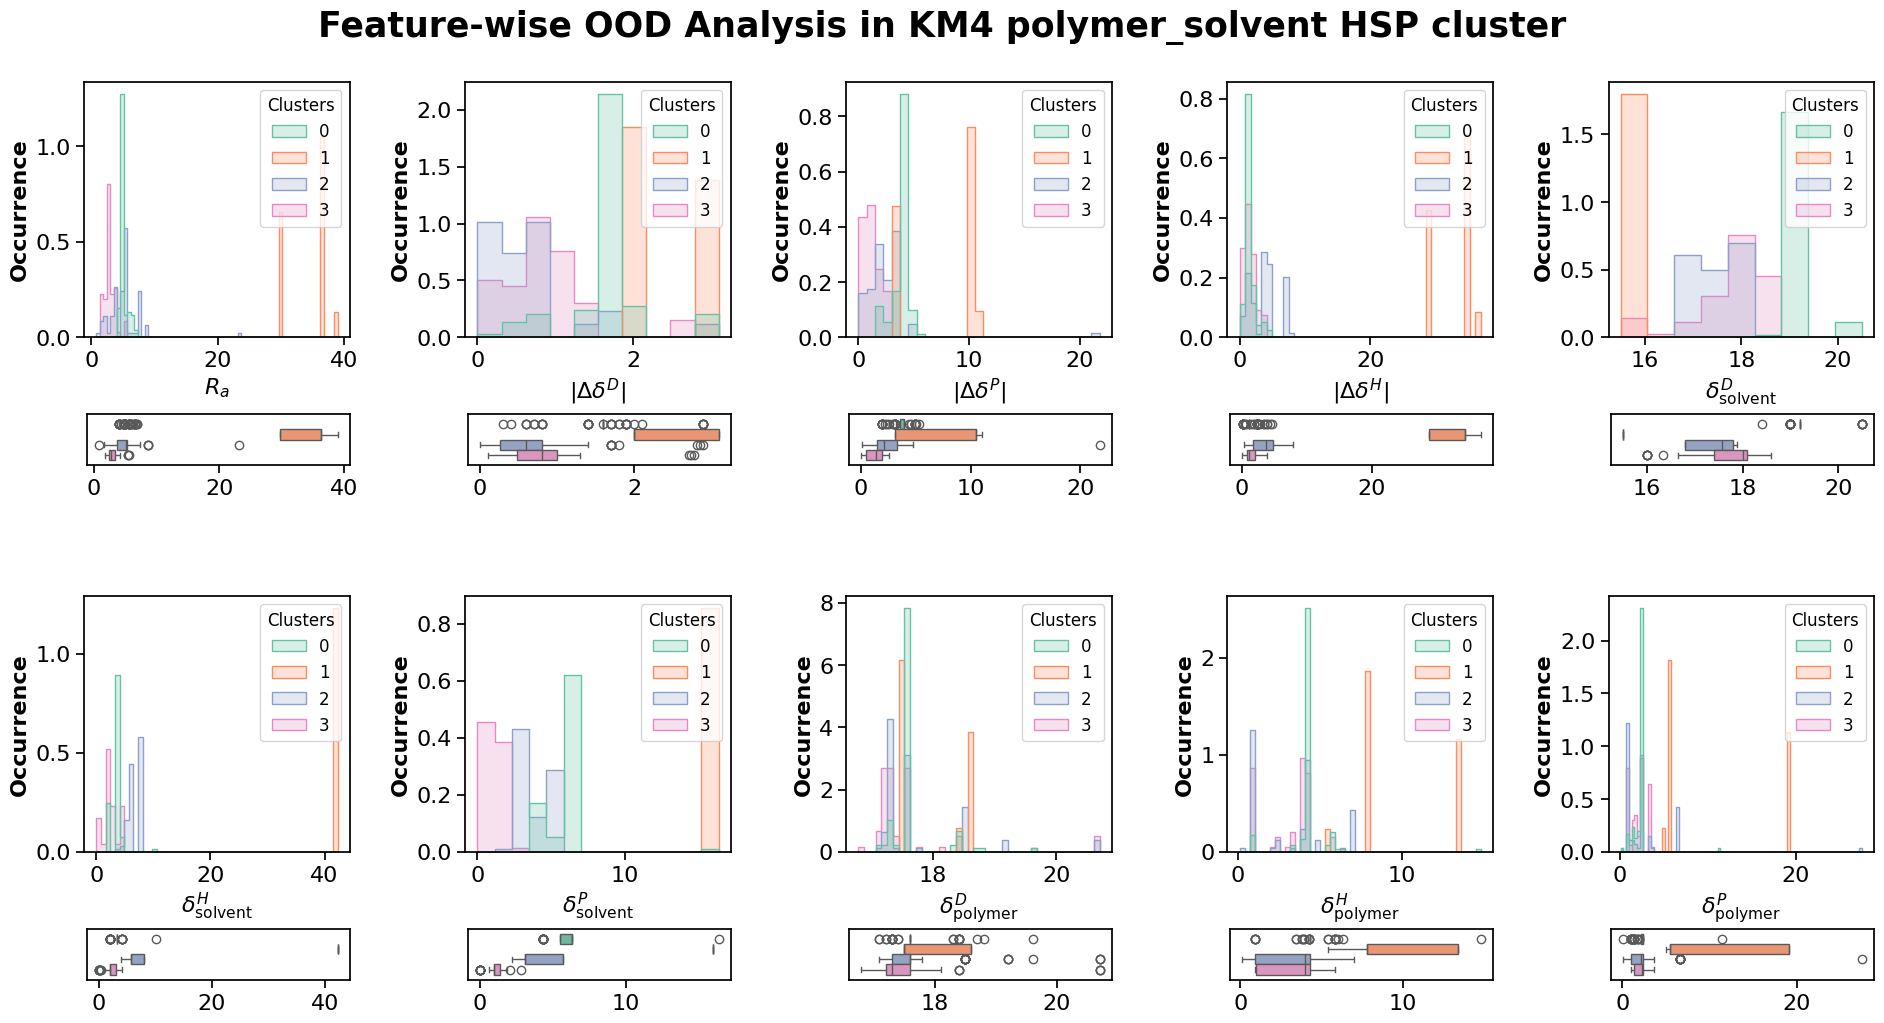

In [ ]:
plot_feature_ood_combined(
    df,
    target='log Rg (nm)',
    features=hsp_features_determination,
    hue='KM4 polymer_solvent HSP cluster',
    ncols=5,  # You can change this to 3 or more if you prefer
    figsize=(19, 11),
    fontsize=16


)

In [ ]:
# medoid_values.columns.to_list()

In [ ]:
medoid_values = df.iloc[medoids4_Rg_hsp]
medoid_values[['canonical_name','Monomer SMILES', 'modified_solvent_format','KM4 polymer_solvent HSP cluster','$R_a$', '$\\delta^P_{\\text{solvent}}$',
 '$\\delta^P_{\\text{polymer}}$',
 '$\\delta^D_{\\text{solvent}}$',
 '$\\delta^D_{\\text{polymer}}$',
 '$\\delta^H_{\\text{solvent}}$',
 '$\\delta^H_{\\text{polymer}}$',]]

canonical_name             Monomer SMILES modified_solvent_format  \
102        rr-P3HT        *c1cc(CCCCCC)c(*)s1                    oDCB   
239          P3EOT  *c1cc(COCCOCCOCCOC)c(*)s1                     H2O   
148           P3OT      *c1cc(CCCCCCCC)c(*)s1                      CF   
152           P3OT      *c1cc(CCCCCCCC)c(*)s1                     Tol   

     KM4 polymer_solvent HSP cluster      $R_a$  $\delta^P_{\text{solvent}}$  \
102                                0   5.142956                          6.3   
239                                1  36.283605                         16.0   
148                                2   2.209072                          3.1   
152                                3   2.353720                          1.4   

     $\delta^P_{\text{polymer}}$  $\delta^D_{\text{solvent}}$  \
102                          2.4                         19.2   
239                          5.5                         15.5   
148                          2.1                         17.8   
152                          2.1                         18.0   

     $\delta^D_{\text{polymer}}$  $\delta^H_{\text{solvent}}$  \
102                         17.6                          3.3   
239                         17.5                         42.3   
148                         17.4                          5.7   
152                         17.4                          2.0   

     $\delta^H_{\text{polymer}}$  
102                          4.3  
239                          7.8  
148                          3.9  
152                          3.9

In [48]:
plot_tsne(HSP_vector, 'KM4 polymer_solvent HSP cluster',
          metric='euclidean', perplexity=30, data=rg_clusters_map,
          title=f'',fontsize=16,
          medoid_indices=medoids4_Rg_hsp,figsize=(9.5, 7))

NameError: name 'medoids4_Rg_hsp' is not defined

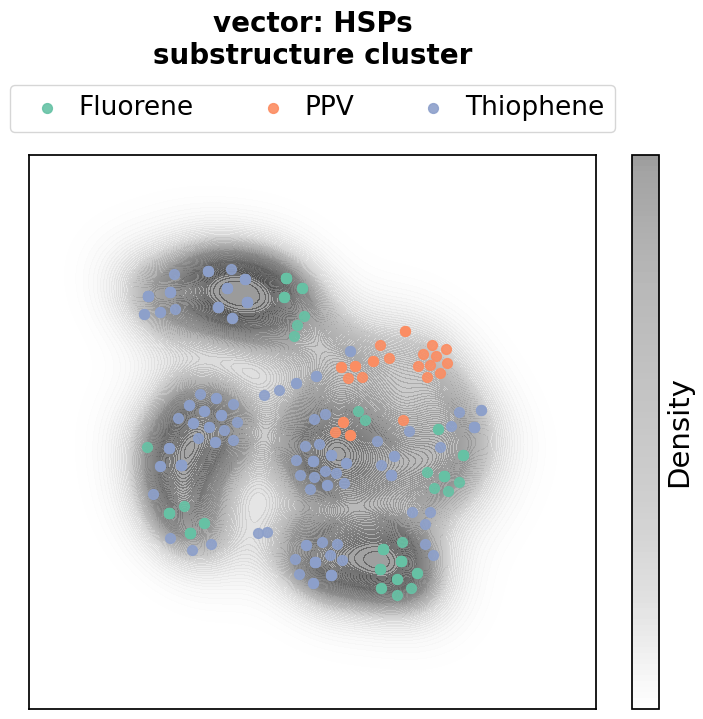

In [49]:
plot_tsne(scaled_polysize_features, 'substructure cluster',
          metric='euclidean', perplexity=30, data=rg_clusters_map,
          title=f'vector: HSPs\nsubstructure cluster',fontsize=16)

In [50]:
for cluster in cluster_list:
    for vector_name, vector_info in oo_vectors.items():
        vector = vector_info["vector"]
        perplexity = vector_info["perplexity"]

        # t-SNE plot
        plot_tsne(
            vector,
            cluster_col=cluster,
            metric='euclidean',
            perplexity=perplexity,
            data=rg_clusters_map,
            title=f'vector: {vector_name}\n{cluster}'
        )

        # Wasserstein distance
        calculate_wasserstein_distance(
            vector,
            cluster_col=cluster,
            data=rg_clusters_map,
            fontsize=16,
            title=f'vector: {vector_name}'
        )


Output hidden; open in https://colab.research.google.com to view.

##Clusters Overlap

In [ ]:
w_data = rg_clusters_map.copy()

In [ ]:
from collections import defaultdict


def is_dark_color(color):
    """Determine if the color is dark based on perceived brightness."""
    r, g, b, _ = color
    brightness = 0.299 * r + 0.587 * g + 0.114 * b
    return brightness < 0.5


def extract_digits_from_string(s):
    match = re.search(r'\d+', str(s))
    return int(match.group()) if match else float('inf')


def plot_cluster_overlap_heatmap(
    w_data: pd.DataFrame,
    abbrev_map: dict,
    exclude_groups: list = ["Alkyl"],
    fontsize: int = 10,
    figsize: tuple = None
):
    cluster_map = {}
    for col, abbrev in abbrev_map.items():
        for group in w_data[col].dropna().unique():
            if group in exclude_groups:
                continue
            label = f"{abbrev} | {group}"
            indices = set(w_data.index[w_data[col] == group])
            cluster_map[label] = indices

    # Group and sort cluster labels within each domain
    domain_clusters = defaultdict(list)
    for label in cluster_map:
        domain, group = label.split(" | ")
        domain_clusters[domain].append((group, label))

    sorted_labels = []
    for domain in sorted(domain_clusters):  # optional: keep alphabetical domain order
        groups = domain_clusters[domain]
        groups_sorted = sorted(groups, key=lambda x: extract_digits_from_string(x[0]))
        sorted_labels.extend([label for _, label in groups_sorted])

    labels = sorted_labels
    n = len(labels)

    if figsize is None:
        figsize = (0.8 * n, 0.8 * n)

    fig, ax = plt.subplots(figsize=figsize)

    ax.set_xticks(np.arange(n) + 0.5)
    ax.set_yticks(np.arange(n) + 0.5)
    ax.set_xticklabels(labels, rotation=90, fontsize=fontsize+4)
    ax.set_yticklabels(labels, rotation=0, fontsize=fontsize+4)
    ax.invert_yaxis()
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')

    cmap = plt.cm.Reds
    norm = plt.Normalize(0, 100)

    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            domain_i = label_i.split(" | ")[0]
            domain_j = label_j.split(" | ")[0]

            if domain_i == domain_j:
                continue

            set_i = cluster_map[label_i]
            set_j = cluster_map[label_j]

            if not set_i or not set_j:
                continue

            intersection = len(set_i & set_j)
            perc_i_in_j = 100 * intersection / len(set_i)
            perc_j_in_i = 100 * intersection / len(set_j)

            x, y = j, i

            color_i = cmap(perc_i_in_j / 100)
            color_j = cmap(perc_j_in_i / 100)

            tl = plt.Polygon([[x, y], [x + 1, y], [x, y + 1]], color=color_i, edgecolor='gray')
            br = plt.Polygon([[x + 1, y + 1], [x + 1, y], [x, y + 1]], color=color_j, edgecolor='gray')
            ax.add_patch(tl)
            ax.add_patch(br)

            color_i_text = 'white' if is_dark_color(color_i) else 'black'
            color_j_text = 'white' if is_dark_color(color_j) else 'black'

            ax.text(x + 0.08, y + 0.38, f"{perc_i_in_j:.0f}", ha='left', va='top',
                    fontsize=fontsize - 1, color=color_i_text)
            ax.text(x + 0.96, y + 0.45, f"{perc_j_in_i:.0f}", ha='right', va='bottom',
                    fontsize=fontsize - 1, color=color_j_text)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
    cbar.set_label('Overlap (%)', fontsize=fontsize+4)
    cbar.ax.tick_params(labelsize=fontsize+4)

    plt.tight_layout()
    plt.show()


In [ ]:
abbrev_map = {
    'KM4 polymer_solvent HSP cluster': 'HSP',
    'Side Chain Cluster': 'SideChain',
    'substructure cluster': 'Substructure',
    'KM4 Mordred_Polysize cluster': 'Mordred+Poly',
    'KM4 ECFP6_Count_512bit cluster': 'ECFP',
    'KM3 Mordred cluster': 'Mordred',
}

plot_cluster_overlap_heatmap(w_data, abbrev_map, figsize=(10, 10), fontsize=11)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_overlap_heatmap(
    w_data: pd.DataFrame,
    abbrev_map: dict,
    exclude_groups: list = ["Alkyl"],
    fontsize: int = 14
):
    """
    Plots a heatmap showing shared datapoints between clusters across different clustering methods,
    using abbreviations and excluding specified group labels.

    Parameters:
    - w_data: pd.DataFrame containing clustering columns
    - abbrev_map: dict of {original_column_name: abbreviation}
    - exclude_groups: list of group names to exclude from all clustering columns
    - fontsize: font size for labels and title
    """
    cluster_map = {}

    for col, abbrev in abbrev_map.items():
        for group in w_data[col].dropna().unique():
            if group in exclude_groups:
                continue
            label = f"{abbrev} | {group}"
            indices = set(w_data.index[w_data[col] == group])
            cluster_map[label] = indices

    labels = list(cluster_map.keys())
    overlap_matrix = pd.DataFrame(index=labels, columns=labels, dtype=float)

    for i in labels:
        for j in labels:
            cluster_i, cluster_j = i.split(" | ")[0], j.split(" | ")[0]
            if cluster_i != cluster_j:
                overlap_matrix.loc[i, j] = len(cluster_map[i] & cluster_map[j])
            else:
                overlap_matrix.loc[i, j] = None

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        overlap_matrix,
        annot=True,
        fmt=".0f",
        cmap="Reds",
        cbar_kws={'label': 'Shared Datapoints'},
        linewidths=0.5,
        linecolor='gray'
    )
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.yticks(rotation=0, fontsize=fontsize)
    plt.title("Cluster Overlap Heatmap (Shared Data Points)", fontsize=fontsize + 2)
    plt.tight_layout()
    plt.show()


In [ ]:
abbrev_map = {
    'KM4 Mordred_Polysize cluster': 'Mordred+Poly',
    'KM4 polymer_solvent HSP cluster': 'HSP',
    'Side Chain Cluster': 'SideChain',
    'substructure cluster': 'Substructure',
    'KM4 ECFP6_Count_512bit cluster': 'ECFP',
    'KM3 Mordred cluster': 'Mordred',
}

plot_cluster_overlap_heatmap(w_data, abbrev_map)

## target coverage by clusters

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_rg_swarmp_violine(data, categories, target: str, font_size=14, fig_size=(10, 6)):
    """
    Creates a combined violin and swarm plot of target values for each category.

    Parameters:
    - data (pd.DataFrame): Input DataFrame with category and target columns.
    - categories (str): Column name for category (x-axis).
    - target (str): Column name for target (y-axis).
    - font_size (int): Font size for labels and ticks.
    - fig_size (tuple): Size of the figure.

    Returns:
    - None: Displays the plot.
    """
    plt.figure(figsize=fig_size)

    # Violin plot
    sns.violinplot(
        data=data,
        x=categories,
        y=target,
        inner=None,
        palette='Set2'
    )

    # Swarm plot
    sns.swarmplot(
        data=data,
        x=categories,
        y=target,
        color='k',
        alpha=0.7,
        size=5
    )

    # Calculate Q1 and Q3
    q1 = data[target].quantile(0.25)
    q3 = data[target].quantile(0.75)

    # Draw horizontal dashed lines at Q1 and Q3
    plt.axhline(q1, color='red', linestyle='--', label='25th percentile')
    plt.axhline(q3, color='red', linestyle='--', label='75th percentile')

    # Optional legend
    plt.legend(loc='upper left', fontsize=font_size - 2)

    plt.xticks(rotation=45, ha='right', fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.xlabel('Clusters', fontsize=font_size)
    plt.ylabel(target, fontsize=font_size)
    plt.title(f'Distribution of {target} by {categories}', fontsize=font_size)
    plt.tight_layout()
    plt.show()


In [ ]:
abbrev_map = {
    'KM4 polymer_solvent HSP cluster': 'HSP',
    'Side Chain Cluster': 'SideChain',
    'substructure cluster': 'Substructure',
    'KM4 Mordred_Polysize cluster': 'Mordred+Poly',
    'KM4 ECFP6_Count_512bit cluster': 'ECFP',
    'KM3 Mordred cluster': 'Mordred',
}

In [ ]:
plot_rg_swarmp_violine(w_data,'substructure cluster',target='log Rg (nm)',fig_size=(8, 6))

In [ ]:
plot_rg_swarmp_violine(w_data,'KM4 polymer_solvent HSP cluster',target='log Rg (nm)',fig_size=(10, 6))

In [ ]:
w_data['log Rg (nm)'].describe()

##PCA

In [ ]:
from sklearn.decomposition import PCA

def plot_explained_variance(pca: PCA,
                             xlabel_size=14,
                             ylabel_size=14,
                             tick_size=12,
                             title_size=16,
                            feats_type:str='linear'):
    """
    Plots the explained variance and cumulative explained variance of PCA components.

    Parameters:
        pca (PCA): A fitted PCA object from scikit-learn.
        xlabel_size (int): Font size for the x-axis label.
        ylabel_size (int): Font size for the y-axis label.
        tick_size (int): Font size for the ticks on the axes.
        title_size (int): Font size for the title.
    """
    # Calculate cumulative explained variance
    cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    print(f"Cumulative explained variance: {cumulative_explained_variance}")

    # Plot the explained variance for each component
    features = range(pca.n_components_)
    plt.bar(features, pca.explained_variance_ratio_, alpha=0.6, label='Individual explained variance')
    plt.xlabel('Principal Component', fontsize=xlabel_size,fontweight='bold')
    plt.ylabel('Explained Variance ratio', fontsize=ylabel_size,fontweight='bold')
    plt.title(f'Explained Variance by Principal Components in {feats_type} data', fontsize=title_size, fontweight='bold')
    plt.ylim(0, 1)
    # Plot the cumulative explained variance on the same figure
    # plt.plot(features, cumulative_explained_variance, marker='o', linestyle='--', color='r', label='Cumulative explained variance')
    # plt.legend(loc='best')

    # Set tick size
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)

    plt.grid(True)
    plt.show()

    # Optionally, plot just the cumulative explained variance in a separate figure
    plt.figure()
    plt.plot(cumulative_explained_variance, marker='o', linestyle='--', color='b')
    plt.xlabel('Number of Components', fontsize=xlabel_size, fontweight='bold')
    plt.ylabel('Cumulative Explained Variance', fontsize=ylabel_size, fontweight='bold')
    plt.title(f'Cumulative Explained Variance Ratio in {feats_type} data', fontsize=title_size, fontweight='bold')
    plt.ylim(0, 1.2)

    # Set tick size for this plot
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    plt.grid(True)
    plt.show()

In [ ]:

# Example: assuming df is your DataFrame
poly_hsp_cols = ['polymer dD', 'polymer dH', 'polymer dP']
solv_hsp_cols = ['solvent dD', 'solvent dH', 'solvent dP']

# Fit PCA to 3 components
pca = PCA(n_components=1)
rg_clusters_map['polymer_HSP_PC1'] = pca.fit_transform(rg_clusters_map[poly_hsp_cols])
rg_clusters_map['solvent_HSP_PC1'] = pca.fit_transform(rg_clusters_map[solv_hsp_cols])


In [ ]:
# all_features = ['Xn', 'Mw (g/mol)', 'PDI', 'Temperature SANS/SLS/DLS/SEC (K)', 'Concentration (mg/ml)',
#                 'solvent dD', 'solvent dH', 'solvent dP',
#                 'polymer dD', 'polymer dH', 'polymer dP']

sd_caler = StandardScaler()

scaled_features = sd_caler.fit_transform(rg_clusters_map[all_features])
pca = PCA(n_components=2)
all_pca= pca.fit_transform(scaled_features)
# rg_clusters_map['all_features_PC1'] = all_pca


In [ ]:

def plot_pca_dist(vector: np.array, cluster_col: str, data: pd.DataFrame, title: str = ''):
    # Apply PCA to reduce to 2 components
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(vector)

    # Extract cluster labels
    cluster_cat = data[cluster_col].to_numpy()
    unique_clusters, label_counts = np.unique(cluster_cat, return_counts=True)
    palette = sns.color_palette("Set2", len(unique_clusters))
    cluster_colors = {label: palette[i] for i, label in enumerate(unique_clusters)}

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 7))

    # Plot background KDE
    sns.kdeplot(
        x=pca_data[:, 0], y=pca_data[:, 1],
        fill=True, cmap="Greys", alpha=0.4, levels=100, thresh=0.01,
        ax=ax, cbar=True
    )

    # Scatter plot colored by cluster
    for label in unique_clusters:
        indices = cluster_cat == label
        ax.scatter(pca_data[indices, 0], pca_data[indices, 1],
                   color=cluster_colors[label], label=f'Cluster {label}', alpha=0.7)

    ax.set_xlabel("PCA Component 1", fontsize=14)
    ax.set_ylabel("PCA Component 2", fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),
        title_fontsize=14,
        fontsize=12,
        ncol=2,
    )
    ax.set_title(title, fontsize=16, fontweight='bold', pad=60)

    plt.tight_layout()
    plt.show()


In [ ]:
plot_pca_dist(scaled_all_features, 'substructure cluster',
           data=rg_clusters_map,
          title=f'vector:all\nsubstructure cluster')

In [ ]:
plot_pca_dist(scaled_solv_prop_features, 'substructure cluster',
           data=rg_clusters_map,
          title=f'vector:solvent prop\nsubstructure cluster')

In [ ]:
plot_pca_dist(scaled_polysize_features, 'substructure cluster',
           data=rg_clusters_map,
          title=f'vector:polysize\nsubstructure cluster')

In [ ]:
plot_pca_dist(scaled_all_features, 'Side Chain Cluster',
          data=rg_clusters_map,
          title=f'vector:all\nSide Chain Cluster')

In [ ]:
import umap


def plot_umap(vector: np.array, cluster_col: str, data: pd.DataFrame, n_neighbors,title: str = ''):
    # Apply UMAP to reduce to 2D
    reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=n_neighbors)
    umap_data = reducer.fit_transform(vector)

    # Extract cluster labels
    cluster_cat = data[cluster_col].to_numpy()
    unique_clusters, label_counts = np.unique(cluster_cat, return_counts=True)
    palette = sns.color_palette("Set2", len(unique_clusters))
    cluster_colors = {label: palette[i] for i, label in enumerate(unique_clusters)}

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 7))

    # KDE background
    sns.kdeplot(
        x=umap_data[:, 0], y=umap_data[:, 1],
        fill=True, cmap="Greys", alpha=0.3, levels=100, thresh=0.01,
        ax=ax, cbar=True
    )

    # Scatter plot
    for label in unique_clusters:
        indices = cluster_cat == label
        ax.scatter(umap_data[indices, 0], umap_data[indices, 1],
                   color=cluster_colors[label], label=f'Cluster {label}', alpha=0.8,linewidth=0.3)

    ax.set_xlabel("UMAP 1", fontsize=14)
    ax.set_ylabel("UMAP 2", fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),
        title_fontsize=14,
        fontsize=12,
        ncol=2,
    )
    ax.set_title(title, fontsize=16, fontweight='bold', pad=60)

    plt.tight_layout()
    plt.show()


In [ ]:
plot_umap(scaled_all_features, 'canonical_name',
           data=rg_clusters_map,n_neighbors=10, title=f'vector:all\npolymers')

In [ ]:
plot_umap(scaled_polysize_features, 'canonical_name',
           data=rg_clusters_map,n_neighbors=20, title=f'vector:polysize\npolymers')

In [ ]:
plot_umap(HSP_vector, 'canonical_name',
           data=rg_clusters_map,n_neighbors=40, title=f'vector:HSPs\npolymers')

In [ ]:
plot_umap(scaled_solv_prop_features, 'canonical_name',
           data=rg_clusters_map,n_neighbors=40, title=f'vector:solve prop\npolymers')

In [ ]:
plot_umap(scaled_all_features, 'substructure cluster',
           data=rg_clusters_map,n_neighbors=10, title=f'vector:all\nsubstructure cluster')

In [ ]:
plot_umap(scaled_polysize_features, 'substructure cluster',
           data=rg_clusters_map,n_neighbors=20, title=f'vector:polysize\nsubstructure cluster')

In [ ]:
plot_umap(scaled_solv_prop_features, 'substructure cluster',
           data=rg_clusters_map,n_neighbors=20, title=f'vector:solvent prop\nsubstructure cluster')

In [ ]:
plot_umap(HSP_vector, 'substructure cluster',
           data=rg_clusters_map,n_neighbors=30, title=f'vector:HSPs\nsubstructure cluster')

In [ ]:
plot_umap(scaled_all_features, 'Side Chain Cluster',
            data=rg_clusters_map, n_neighbors=10,
            title=f'vector:all\nSide Chain Cluster')

In [ ]:
plot_umap(scaled_polysize_features, 'Side Chain Cluster',
          data=rg_clusters_map, n_neighbors=20,
          title=f'vector:polysize\nSide Chain Cluster')

In [ ]:
plot_umap(scaled_solv_prop_features, 'Side Chain Cluster',
          data=rg_clusters_map, n_neighbors=40,
          title=f'vector:solvent properties\nSide Chain Cluster')

In [ ]:
plot_umap(HSP_vector, 'Side Chain Cluster',
          data=rg_clusters_map, n_neighbors=40,
          title=f'vector:HSPs\nSide Chain Cluster')

In [ ]:
plot_umap(scaled_solv_prop_features, 'KM4 polymer_solvent HSP cluster',
          data=rg_clusters_map, n_neighbors=30,
          title=f'vector:solvent prop\npolymer_solvent HSP')

In [ ]:
plot_umap(HSP_vector, 'KM4 polymer_solvent HSP cluster',
          data=rg_clusters_map, n_neighbors=30,
          title=f'vector:HSPs\npolymer_solvent HSP')

In [ ]:
plot_umap(scaled_polysize_features, 'KM4 polymer_solvent HSP cluster',
          data=rg_clusters_map, n_neighbors=40,
          title=f'vector:polysize\npolymer_solvent HSP')

In [ ]:
plot_umap(scaled_all_features, 'KM4 polymer_solvent HSP cluster',
          data=rg_clusters_map, n_neighbors=10,
          title=f'vector:all\npolymer_solvent HSP')

In [ ]:
plot_umap(scaled_all_features, 'KM4 Mordred_Polysize cluster',
          data=rg_clusters_map, n_neighbors=10,
          title=f'vector:all\n Mordred Polysize')

In [ ]:
def plot_umap_train_test_red_blue(
    vector: np.array,
    cluster_col: str,
    data: pd.DataFrame,
    n_neighbors: int,
    title: str = ''
):


    # Fit UMAP once on all data
    reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=n_neighbors,densmap=True,
                        dens_lambda=2.0)
    umap_data = reducer.fit_transform(vector)

    # Get cluster labels
    cluster_cat = data[cluster_col].to_numpy()
    unique_clusters = np.unique(cluster_cat)

    for test_label in unique_clusters:
        fig, ax = plt.subplots(figsize=(8, 7))

        # Boolean masks
        test_mask = cluster_cat == test_label
        train_mask = ~test_mask
        wasserstein_distance_score= wasserstein_distance_nd(vector[test_mask],vector[train_mask])
        print(f'wasserstein distance (test:{test_label}):  {wasserstein_distance_score}')
        # KDE background on all data
        sns.kdeplot(
            x=umap_data[:, 0], y=umap_data[:, 1],
            fill=True, cmap="Greys", alpha=0.25, levels=100, thresh=0.01,
            ax=ax, cbar=False
        )

        # Plot training points (blue)
        ax.scatter(
            umap_data[train_mask, 0], umap_data[train_mask, 1],
            color='blue', alpha=0.4, s=100, label='Train'
        )

        # Plot test points (red)
        ax.scatter(
            umap_data[test_mask, 0], umap_data[test_mask, 1],
            color='red', edgecolors='k', linewidth=0.4,
            alpha=0.8, s=60, label=f'Test: {test_label}'
        )

        # Labels and layout
        ax.set_xlabel("UMAP 1", fontsize=14)
        ax.set_ylabel("UMAP 2", fontsize=14)
        ax.tick_params(axis='both', labelsize=12)
        ax.set_title(f"{title} — Test: {test_label}", fontsize=16, fontweight='bold', pad=20)

        ax.legend(
            loc='lower center',
            bbox_to_anchor=(0.5, 1.15),
            fontsize=12,
            ncol=2,
            frameon=False
        )
        fig.subplots_adjust(top=0.75)
        plt.show()


In [ ]:
plot_umap_train_test_red_blue(HSP_vector, 'KM4 Mordred_Polysize cluster',
           data=rg_clusters_map,n_neighbors=60, title=f'vector:HSPs\nKMordred_Polysize')

In [ ]:
plot_umap_train_test_red_blue(scaled_all_features, 'KM4 polymer_solvent HSP cluster',
           data=rg_clusters_map,n_neighbors=10, title=f'vector:all\npolymer_solvent HSPS')

In [ ]:
plot_umap_train_test_red_blue(scaled_all_features, 'KM4 Mordred_Polysize cluster',
           data=rg_clusters_map,n_neighbors=30, title=f'vector:all\nKMordred_Polysize')

In [ ]:
plot_umap_train_test_red_blue(scaled_all_features, 'Side Chain Cluster',
           data=rg_clusters_map,n_neighbors=30, title=f'vector:all\nSide Chain Cluster')

In [ ]:
plot_umap_train_test_red_blue(scaled_all_features, 'substructure cluster',
           data=rg_clusters_map,n_neighbors=30, title=f'vector:all\nsubstructure cluster')

In [ ]:
plot_umap_train_test_red_blue(scaled_solv_prop_features, 'substructure cluster',
           data=rg_clusters_map,n_neighbors=30, title=f'vector:solent prop\nsubstructure cluster')

In [ ]:
plot_umap_train_test_red_blue(HSP_vector, 'substructure cluster',
           data=rg_clusters_map,n_neighbors=30, title=f'vector:solent prop\nsubstructure cluster')

In [ ]:
plot_umap_train_test_red_blue(scaled_polysize_features, 'substructure cluster',
           data=rg_clusters_map,n_neighbors=30, title=f'vector:polysize\nsubstructure cluster')

## cluster detail

In [ ]:
rg_clusters_analysis_test = rg_clusters_map
rg_clusters_analysis_test[rg_clusters_analysis_test['Side Chain Cluster']=='Polar']['canonical_name']

In [ ]:
rg_clusters_analysis_test = rg_clusters_map
import math
def plot_feature_ood_combined(data: pd.DataFrame, target: str, features: list, hue: str, ncols: int = 2, figsize=(12,18)):
    n_feats = len(features)
    nrows = math.ceil(n_feats / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten() if n_feats > 1 else [axes]

    for i, feat in enumerate(features):
        df = data.dropna(subset=[target]).reset_index()
        if isinstance(df[target].iloc[1], (list, np.ndarray)):
            reordered_df = pd.DataFrame(df[target].tolist(), columns=["First Peak", "Second Peak", "Third Peak"])
            df = pd.concat([df, reordered_df], axis=1)

        ax = axes[i]
        sns.histplot(data=df, x=feat, hue=hue, ax=ax, palette='Set2',element="step",
        # stat="density",
        # common_norm=False
                     )

        changed_x_label = 'Temperature (K)' if feat == 'Temperature SANS/SLS/DLS/SEC (K)' else feat
        x_label = f'log (Rh {changed_x_label})' if 'Peak' in changed_x_label else changed_x_label

        sns.move_legend(ax, loc='upper right', title='Clusters', title_fontsize=14)
        ax.set_xlabel(x_label, fontdict=x_y_label_format)
        ax.set_ylabel('Occurrence', fontdict=x_y_label_format)
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)

        # Inset boxplot
        box_inset = ax.inset_axes([0.01, -0.5, 0.99, 0.2])
        sns.boxplot(x=feat, data=df, hue=hue, ax=box_inset, palette='Set2')
        box_inset.set(yticks=[], xlabel=None)
        box_inset.legend_.remove()
        box_inset.tick_params(axis='x', labelsize=16)
    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # if len(hue.split())>3:
    #   ood_type = '-'.join([hue.split()[1],hue.split()[2]])
    # else:
    #   ood_type = hue.split()[1]
    fig.suptitle(f'Feature-wise OOD Analysis in {hue}', fontsize=22, y=1.001,fontweight='bold')
    plt.subplots_adjust(top=0.94)
    plt.tight_layout()
    plt.show()



In [ ]:
hsp_diff_features = [
    'abs(solvent dD - polymer dD)',
    'abs(solvent dP - polymer dP)',
    'abs(solvent dH - polymer dH)',
    'Ra',
    'log Rg (nm)'
]

plot_feature_ood_combined(
    rg_clusters_analysis_test,
    target='log Rg (nm)',
    features=hsp_diff_features,
    hue='KM4 polymer_solvent HSP cluster',
    ncols=2,  # You can change this to 3 or more if you prefer,
    figsize=(12,18)
)

In [ ]:
cluster_column = 'KM4 polymer_solvent HSP cluster'

for cluster in rg_clusters_analysis_test[cluster_column].unique():
    subset = rg_clusters_analysis_test[rg_clusters_analysis_test[cluster_column] == cluster]

    # Drop duplicates to avoid repeated polymer-solvent pairs
    unique_pairs = subset[['canonical_name', 'modified_solvent_format']].drop_duplicates()

    print(f"\n--- Cluster: {cluster} ---")
    for _, row in unique_pairs.iterrows():
        print(f"Polymer: {row['canonical_name']}, Solvent: {row['modified_solvent_format']}")


In [ ]:
def display_molecules(df, structure_type:str=None):
    molecules = []
    captions = []
    for _, row in df.iterrows():
        smiles = row['Monomer SMILES']

        mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to RDKit molecule

        if mol:
            molecules.append(mol)
            if structure_type:
                captions.append(f"{row['canonical_name']} ,\n structure_type: {row[structure_type]}")
            else:
                captions.append(f"{row['canonical_name']}")
        else:
            print(f"Invalid SMILES skipped: {smiles}")

    options = Draw.MolDrawOptions()
    options.legendFontSize = 40

    # Draw molecules with captions
    img = Draw.MolsToGridImage(
        molecules,
        legends=captions,
        molsPerRow=3,  # Adjust based on how many structures you want in a row
        subImgSize=(800, 800),  # Image size for each molecule,
        drawOptions=options
    )
    # Display the image
    display(img)

In [ ]:
display_molecules(Rg_unique_data)

## dirty

In [ ]:
# plot_umap(scaled_all_features, 'Side Chain Cluster',
#           data=rg_clusters_map, n_neighbors=50,
#           title=f'vector:all\nSide Chain Cluster')

In [ ]:
# rg_clusters_map['Side Chain Cluster']

In [ ]:
features = ['Xn', 'PDI', 'Temperature SANS/SLS/DLS/SEC (K)', 'Concentration (mg/ml)', 'Ra', 'log Rg (nm)']
plot_feature_ood_combined(
    rg_clusters_map,
    target='log Rg (nm)',
    features=['all_features_PC1','log Rg (nm)'],
    hue='substructure cluster',
    ncols=2  # You can change this to 3 or more if you prefer
)

In [ ]:
# def plot_

In [ ]:
# def plot_clusters(fp_vector,
#                   predicted_clusters,
#                   unique_clusters,
#                   method: str,
#                   target: str,
#                   vector: str,
#                   metric: str,
#                   medoid_indices=None,
#                   perplexity: int = 20,
#                   loc ='upper center'
#                   ):
#     """
#     Perform t-SNE computation and plot clusters. Mark medoid points with a red star.
#     """
#     tsne = TSNE(n_components=2, metric=naming[metric], random_state=42, perplexity=perplexity)
#     tsne_results = tsne.fit_transform(fp_vector)

#     plot_title = f"{vector} cluster with {method}{len(unique_clusters)}"
#     unique_clusters, label_counts = np.unique(predicted_clusters, return_counts=True)
#     palette = sns.color_palette("Set2", len(unique_clusters))
#     cluster_colors = {label: palette[i] for i, label in enumerate(unique_clusters)}

#     fig, ax = plt.subplots(figsize=(10, 8))

#     for label in unique_clusters:
#         indices = predicted_clusters == label
#         ax.scatter(tsne_results[indices, 0], tsne_results[indices, 1],
#                    color=cluster_colors[label], label=f'Cluster {label}', alpha=0.7)

#     # Mark medoid points with a red star
#     if medoid_indices is not None:
#         ax.scatter(tsne_results[medoid_indices, 0], tsne_results[medoid_indices, 1],
#                    color='red', marker='*', s=200, label='Medoids')


#     ncol = len(unique_clusters) + (1 if medoid_indices is not None else 0)
#     # ncol = min(4, total_legend_items)  # You can adjust the "4" as your preferred max per row
#     ax.set_xlabel("TSNE Component 1", fontdict=x_y_label_format)
#     ax.set_ylabel("TSNE Component 2", fontdict=x_y_label_format)
#     # ax.set_title(plot_title, fontdict=title_label_format)
#     ax.tick_params(axis='both', labelsize=16)
#     ax.legend(loc=loc,
#               bbox_to_anchor=(0.5, 1.2),
#               title=plot_title,
#               title_fontsize=16,
#               fontsize=14,
#               ncol=ncol,
#               )

#     plt.tight_layout()
#     plt.show()

#     return tsne_results

In [ ]:
# covarience_features = ['Mw (g/mol)', 'PDI', 'Concentration (mg/ml)',
#                         'Temperature SANS/SLS/DLS/SEC (K)',
#                         'polymer dP', 'polymer dD' , 'polymer dH',
#                         'solvent dP', 'solvent dD', 'solvent dH']

# clusters = ['KM4 ECFP6_Count_512bit cluster'
# 'KM3 Mordred cluster'
# 'substructure cluster'
# 'EG-Ionic-Based Cluster'
# 'KM5 polymer_solvent HSP and polysize cluster'
# 'KM4 polymer_solvent HSP cluster'
# 'KM4 Mordred_Polysize cluster']


# Rg_list = Rg_data['Trimer_Mordred'].tolist()
# Rg_list = pd.DataFrame(Rg_list)
# Rg_list = pd.concat([Rg_list, Rg_data[['Mw (g/mol)', 'PDI']].reset_index()], axis=1)
# Rg_Psize_mordred = Rg_list.to_numpy(dtype=float)



# Rg_unique_clusters = Rg_data_full.drop_duplicates(subset='Trimer_ECFP6_count_512bits', keep='first')
# # print(Rg_unique_clusters.shape)
# cov_continuous_vector = Rg_unique_clusters[covarience_features].to_numpy(dtype=float)
# cov_continuous_vector_scaled = sd_caler.fit_transform(cov_continuous_vector)
# cov_mordred_vector = pd.DataFrame(Rg_unique_clusters['Trimer_Mordred'].tolist()).to_numpy(dtype=float)
# cov_mordred_vector_scaled = sd_caler.fit_transform(cov_mordred_vector)
# cov_ECFP_vector = np.array(Rg_unique_clusters['Trimer_ECFP6_count_512bits'].tolist())
# cov_mordred_and_polysize = np.concatenate([cov_mordred_vector, Rg_unique_clusters[['Mw (g/mol)', 'PDI']]], axis=1)
# cov_mordred_and_polysize_scaled = sd_caler.fit_transform(cov_mordred_and_polysize)
# cov_mordred_and_continuous_vector = np.concatenate([cov_mordred_vector, cov_continuous_vector], axis=1)
# cov_mordred_and_continuous_vector_scaled = sd_caler.fit_transform(cov_mordred_and_continuous_vector)

In [ ]:
plot_clusters(fp_vector,
                  predicted_clusters,
                  unique_clusters,
                  method: str,
                  target: str,
                  vector: str,
                  metric: str,
                  medoid_indices=None,
                  perplexity: int = 20,
                  loc ='upper center'
                  ):
  # plot_actively(cov_mordred_vector_scaled,cluster_col='KM3 Mordred cluster',metric='euclidean',perplexity=20,data=Rg_unique_clusters)

In [ ]:
def plot_actively(fp_vector:np.array,cluster_col:str,metric:str,perplexity:int,data:pd.DataFrame):
  tsne_data = reduce_dim(fp_vector,metric,perplexity)
  cluster_cat = data[cluster_col].to_numpy(dtype=float)
  active_plotly_df= create_plotly_dataframe(tsne=tsne_data,cluster=cluster_cat,unique_data=data)
  display(active_plotly_df)
  plotly_clusters(active_plotly_df, 'KM3 Mordred cluster')

In [ ]:
plot_actively(cov_mordred_and_polysize_scaled,cluster_col='KM4 Mordred_Polysize cluster',metric='euclidean',perplexity=20,data=Rg_unique_clusters)

In [ ]:
plot_actively(cov_mordred_vector_scaled,cluster_col='KM3 Mordred cluster',metric='euclidean',perplexity=20,data=Rg_unique_clusters)

In [ ]:
plot_actively(cov_ECFP_vector,cluster_col='KM4 ECFP6_Count_512bit cluster', metric='weighted_jaccard',perplexity=20,data=Rg_unique_clusters)

In [ ]:
active_plotly_df_Rg_unique_km4_mordred = create_plotly_dataframe(tsne=km4_tsne_Rg_mordred,cluster=KMedoids4_label_Rg_mordred,unique_data=Rg_unique_data)

In [ ]:
# active_plotly_df_kmedoids5 = create_plotly_dataframe(tsne=km5_tsne,cluster=KMedoids5_label,unique_data=Rg_Rh_unique_data)
# active_plotly_df_kmedoids4 = create_plotly_dataframe(tsne=km4_tsne,cluster=KMedoids4_label,unique_data=Rg_Rh_unique_data)

# active_plotly_df_HBD5 = create_plotly_dataframe(tsne=HBD5_tsne, cluster=HBD5_label, unique_data=Rg_Rh_unique_data)
# active_plotly_df_HBD4 = create_plotly_dataframe(tsne=HBD4_tsne, cluster=HBD4_label, unique_data=Rg_Rh_unique_data)
# active_plotly_df_Rg_unique_kmedoids4 = create_plotly_dataframe(tsne=km4_tsne_Rg,cluster=KMedoids4_label_Rg,unique_data=Rg_unique_data)
# active_plotly_df_Rg_unique_kmedoids3 = create_plotly_dataframe(tsne=km3_tsne_Rg,cluster=KMedoids3_label_Rg,unique_data=Rg_unique_data)
# active_plotly_df_Rg_unique_HBD3 = create_plotly_dataframe(tsne=HBD3_tsne_Rg,cluster=HBD3_label_Rg,unique_data=Rg_unique_data)
# active_plotly_df_Rg_unique_but3 = create_plotly_dataframe(tsne=but3_tsne_Rg,cluster=but3_label_Rg,unique_data=Rg_unique_data)

#km
active_plotly_df_Rg_unique_km3_count = create_plotly_dataframe(tsne=km3_tsne_Rg_count,cluster=KMedoids3_label_Rg_count,unique_data=Rg_unique_data)
active_plotly_df_Rg_unique_km4_count = create_plotly_dataframe(tsne=km4_tsne_Rg_count,cluster=KMedoids4_label_Rg_count,unique_data=Rg_unique_data)

active_plotly_df_Rg_unique_km3_bin = create_plotly_dataframe(tsne=km3_tsne_Rg_bin,cluster=KMedoids3_label_Rg_bin,unique_data=Rg_unique_data)

# DBS
active_plotly_df_Rg_unique_DBS3_count = create_plotly_dataframe(tsne=DBS3_tsne_Rg_bin,cluster=DBS3_label_Rg_bin,unique_data=Rg_unique_data)
active_plotly_df_Rg_unique_DBS3_bin = create_plotly_dataframe(tsne=DBS3_tsne_Rg_count,cluster=DBS3_label_Rg_count,unique_data=Rg_unique_data)
#mordred:

active_plotly_df_Rg_unique_but3_mordred = create_plotly_dataframe(tsne=but3_tsne_Rg_mordred,cluster=but3_label_Rg_mordred,unique_data=Rg_unique_data)
active_plotly_df_Rg_unique_but4_mordred = create_plotly_dataframe(tsne=but4_tsne_Rg_mordred,cluster=but4_label_Rg_mordred,unique_data=Rg_unique_data)
active_plotly_df_Rg_unique_km4_mordred = create_plotly_dataframe(tsne=km4_tsne_Rg_mordred,cluster=KMedoids4_label_Rg_mordred,unique_data=Rg_unique_data)
active_plotly_df_Rg_unique_km3_mordred = create_plotly_dataframe(tsne=km3_tsne_Rg_mordred,cluster=KMedoids3_label_Rg_mordred,unique_data=Rg_unique_data)


# Sanity check

Rg_with_cluster_sub =pd.DataFrame = pd.read_pickle(data_folder/'Rg data with clusters.pkl')
Rg_with_cluster_sub_unique = Rg_data.drop_duplicates(subset='Trimer_ECFP6_count_512bits', keep='first')


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

# Sample DataFrame
df = Rg_with_cluster_sub_unique
# Function to extract backbone using Murcko scaffold
def extract_backbone(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        return Chem.MolToSmiles(scaffold), scaffold
    except:
        return None, None

# Apply extraction
df['Backbone SMILES'], df['Backbone Mol'] = zip(*df['Monomer SMILES'].map(extract_backbone))

# Show DataFrame with extracted backbones
display(df[['Monomer SMILES', 'Backbone SMILES']])

# Draw all backbone structures
backbone_mols = [mol for mol in df['Backbone Mol'] if mol is not None]
for i in backbone_mols:
  display(i)
  print(Chem.MolToSmiles(i))

In [ ]:
# display_molecules(Rg_with_cluster_sub_unique)

In [ ]:
display_molecules(Rg_unique_data,"Side Chain Cluster")

# Dirty code before

In [ ]:
data = Rg_data[['Mw (g/mol)', 'PDI']].dropna()
data['Mw (g/mol)'] = np.log10(data['Mw (g/mol)'])
# Get unique values only
unique_data = data.drop_duplicates().reset_index(drop=True)

# Scale data (optional for better clustering)
scaler = StandardScaler()
scaled_unique_data = scaler.fit_transform(unique_data)

# Define number of clusters
n_clusters =3  # Adjust as needed

# Apply KMedoids only on unique data
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=42, method='pam', init='k-medoids++')
unique_clusters = kmedoids.fit_predict(scaled_unique_data)

# Assign clusters back to unique data
unique_data['Cluster'] = unique_clusters
data = data.merge(unique_data, on=['Mw (g/mol)', 'PDI'], how='left')


si_score, db_score, ch_score  = _get_scores(scaled_unique_data, unique_clusters, metric='euclidean')

print(f"Silhouette Score: {si_score:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f}")
print(f"Calinski-Harabasz Score: {ch_score:.3f}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Scatter plot of unique values with clustering
sns.scatterplot(
    ax=axes[0], x=unique_data['Mw (g/mol)'], y=unique_data['PDI'],
    hue=unique_data['Cluster'], palette='viridis', alpha=0.8
)
medoids = unique_data.iloc[kmedoids.medoid_indices_]
axes[0].scatter(medoids['Mw (g/mol)'], medoids['PDI'], c='red', marker='X', s=200, label='Medoids')
# axes[0].set_xscale('log')
axes[0].set_xlabel("Mw (g/mol) (log scale)")
axes[0].set_ylabel("PDI")
axes[0].set_title("Clustering of Unique Values")
axes[0].legend()

# Scatter plot of full dataset with mapped clusters
sns.scatterplot(
    ax=axes[1], x=data['Mw (g/mol)'], y=data['PDI'],
    hue=data['Cluster'], palette='viridis', alpha=0.5
)
# axes[1].set_xscale('log')
axes[1].set_xlabel("Mw (g/mol) (log scale)")
axes[1].set_ylabel("PDI")
axes[1].set_title("Full Dataset with Cluster Mapping")

plt.tight_layout()
plt.show()

In [ ]:
plot_count(data,x_label='Cluster')

In [ ]:
counts = Rg_data.groupby(['Mw (g/mol)', 'PDI']).size().reset_index(name='count')

plt.figure(figsize=(8,6))
sc = plt.scatter(
    counts['Mw (g/mol)'],
    counts['PDI'],
    s=counts['count'] * 10,
    c=counts['count'],
    cmap='viridis',
    alpha=0.8
)

plt.colorbar(sc, label="Frequency")
plt.xscale('log')

plt.xlabel("Mw (g/mol)")
plt.ylabel("PDI")
plt.title("Scatter plot of MW vs PDI")
plt.show()


# HSP Clustering (OLD CODE)

In [ ]:
butina_scores_HSP, LDA_scores_HSP, DBSCAN_scores_HSP, HDBSCAN_scores_HSP, k_Medoids_scores_HSP   = save_all_clustering_scores(['Rg_HSP_vector'])
aggregated_results_HSP= pd.concat([butina_scores_HSP,LDA_scores_HSP, DBSCAN_scores_HSP, HDBSCAN_scores_HSP,k_Medoids_scores_HSP], ignore_index=True)

In [ ]:
print(f'size of aggregated_results_Psiz: {aggregated_results_HSP.shape}')
w_data = aggregated_results_HSP
w_data = w_data[w_data['number of clusters'].between(3, 10)]
w_data.shape

In [ ]:
columns_to_consider_duplicated = ['target', 'metric', 'clustering method', 'vector', 'number of clusters',
                       'Silhouette score', 'Davies-Bouldin score', 'Calinski-Harabasz score']


grouped = w_data.groupby(
    ['target', 'clustering method' ,'vector', 'number of clusters']
)

best_scores = []

for name, group in grouped:

    best = group.loc[
        (group['Silhouette score'] == group['Silhouette score'].max()) |
        (group['Davies-Bouldin score'] == group['Davies-Bouldin score'].min()) |
        (group['Calinski-Harabasz score'] == group['Calinski-Harabasz score'].max())
    ]

    best = best.drop_duplicates(subset=columns_to_consider_duplicated, keep='first')

    best_scores.append(best)

best_scores_df = pd.concat(best_scores, ignore_index=True)


In [ ]:
best_scores_df_grouped = best_scores_df.groupby(
    ['target', 'number of clusters', 'vector']
)

for name, group in best_scores_df_grouped:
  # print(name[1])
  plot_clustering_scores(group,'clustering method',name)

In [ ]:
best_scores_df_grouped = best_scores_df.groupby(
    ['target', 'clustering method', 'vector']
)

for name, group in best_scores_df_grouped:

  plot_clustering_scores(group,'number of clusters',name)

In [ ]:
k4_Rg_hsp, KMedoids4_label_Rg_hsp, medoids4_Rg_hsp, km4_tsne_Rg_hsp = get_clusters(
                  fp='Rg_HSP_vector',
                  method='KMedoids',
                  n_clusters=4,
                  plotting=True,
                  get_label=True,
                  perplexity=40
                  )

In [ ]:
Rg_data['KM4 polymer_solvent HSP cluster'] = KMedoids4_label_Rg_hsp
plot_count(Rg_data,'KM4 polymer_solvent HSP cluster','Rg1 (nm)')

In [ ]:
for feat in features:
  plot_feature_ood(Rg_data,target='Rg1 (nm)',column_to_draw=feat,hue='polymer_solvent HSP cluster')

In [ ]:
# HBD4_Rg_mordred,HBD4_label_Rg_mordred, HBD4_tsne_Rg_mordred = get_clusters(
#                   fp='Rg_HSP_vector',
#                   method='HDBSCAN',
#                   min_cluster_size=2,
#                   cluster_selection_epsilon=27,
#                   plotting=True,
#                   get_label=True,
#                   perplexity=7
#                   )

# HSP-Polysize Clustering (OLD CODE)

In [ ]:
butina_scores_HSPPsize, LDA_scores_HSPPsize, DBSCAN_scores_HSPPsize, HDBSCAN_scores_HSPPsize, k_Medoids_scores_HSPPsize = save_all_clustering_scores(['Rg_HSPPsize_vector_scaled'])
aggregated_results_HSPPsize= pd.concat([butina_scores_HSPPsize,LDA_scores_HSPPsize, DBSCAN_scores_HSPPsize, HDBSCAN_scores_HSPPsize, k_Medoids_scores_HSPPsize], ignore_index=True)

In [ ]:
print(f'size of aggregated_results_Psiz: {aggregated_results_HSPPsize.shape}')
w_data = aggregated_results_HSPPsize
w_data = w_data[w_data['number of clusters'].between(2, 10)]
w_data.shape

In [ ]:
columns_to_consider_duplicated = ['target', 'metric', 'clustering method', 'vector', 'number of clusters',
                       'Silhouette score', 'Davies-Bouldin score', 'Calinski-Harabasz score']


grouped = w_data.groupby(
    ['target', 'clustering method' ,'vector', 'number of clusters']
)

best_scores = []

for name, group in grouped:

    best = group.loc[
        (group['Silhouette score'] == group['Silhouette score'].max()) |
        (group['Davies-Bouldin score'] == group['Davies-Bouldin score'].min()) |
        (group['Calinski-Harabasz score'] == group['Calinski-Harabasz score'].max())
    ]

    best = best.drop_duplicates(subset=columns_to_consider_duplicated, keep='first')

    best_scores.append(best)

best_scores_df = pd.concat(best_scores, ignore_index=True)


In [ ]:
best_scores_df_grouped = best_scores_df.groupby(
    ['target', 'number of clusters', 'vector']
)

for name, group in best_scores_df_grouped:
  # print(name[1])
  plot_clustering_scores(group,'clustering method',name)

In [ ]:
best_scores_df_grouped = best_scores_df.groupby(
    ['target', 'clustering method', 'vector']
)

for name, group in best_scores_df_grouped:

  plot_clustering_scores(group,'number of clusters',name)

In [ ]:
best_scores_df

In [ ]:
k5_Rg_hsppsize, KMedoids5_label_Rg_hsppsiz, medoids5_Rg_hsppsiz, km5_tsne_Rg_hsppsiz = get_clusters(
                  fp='Rg_HSPPsize_vector_scaled',
                  method='KMedoids',
                  n_clusters=5,
                  plotting=True,
                  get_label=True,
                  perplexity=49
                  )

In [ ]:
k4_Rg_hsppsize, KMedoids4_label_Rg_hsppsiz, medoids4_Rg_hsppsiz, km4_tsne_Rg_hsppsiz = get_clusters(
                  fp='Rg_HSPPsize_vector_scaled',
                  method='KMedoids',
                  n_clusters=4,
                  plotting=True,
                  get_label=True,
                  perplexity=15
                  )

In [ ]:
Rg_data

In [ ]:
Rg_data['KM5 polymer_solvent HSP and polysize cluster'] = KMedoids5_label_Rg_hsppsiz
plot_count(Rg_data,'KM5 polymer_solvent HSP and polysize cluster','Rg1 (nm)')

In [ ]:
for feat in features:
  plot_feature_ood(Rg_data,target='Rg1 (nm)',column_to_draw=feat,hue='KM5 polymer_solvent HSP and polysize cluster')

###Unique

In [ ]:
butina_scores_HSP_unique, LDA_scores_HSP_unique, DBSCAN_scores_HSP_unique, HDBSCAN_scores_HSP_unique, k_Medoids_scores_HSP_unique   = save_all_clustering_scores(['Rg_HSP_vector_unique'])
aggregated_results_HSP_unique = pd.concat([butina_scores_HSP_unique,LDA_scores_HSP_unique, DBSCAN_scores_HSP_unique, HDBSCAN_scores_HSP_unique,k_Medoids_scores_HSP_unique], ignore_index=True)


In [ ]:
print(f'size of aggregated_results_Psiz: {aggregated_results_HSP.shape}')
w_data = aggregated_results_HSP
w_data = w_data[w_data['number of clusters'].between(3, 10)]
w_data.shape

In [ ]:
columns_to_consider_duplicated = ['target', 'metric', 'clustering method', 'vector', 'number of clusters',
                       'Silhouette score', 'Davies-Bouldin score', 'Calinski-Harabasz score']


grouped = w_data.groupby(
    ['target', 'clustering method' ,'vector', 'number of clusters']
)

best_scores = []

for name, group in grouped:

    best = group.loc[
        (group['Silhouette score'] == group['Silhouette score'].max()) |
        (group['Davies-Bouldin score'] == group['Davies-Bouldin score'].min()) |
        (group['Calinski-Harabasz score'] == group['Calinski-Harabasz score'].max())
    ]

    best = best.drop_duplicates(subset=columns_to_consider_duplicated, keep='first')

    best_scores.append(best)

best_scores_df = pd.concat(best_scores, ignore_index=True)


In [ ]:
best_scores_df_grouped = best_scores_df.groupby(
    ['target', 'number of clusters', 'vector']
)

for name, group in best_scores_df_grouped:
  # print(name[1])
  plot_clustering_scores(group,'clustering method',name)

In [ ]:
best_scores_df

In [ ]:
HBD4_Rg_mordred,HBD4_label_Rg_mordred, HBD4_tsne_Rg_mordred = get_clusters(
                  fp='Rg_HSP_vector_unique',
                  method='HDBSCAN',
                  min_cluster_size=5,
                  cluster_selection_epsilon=7,
                  plotting=True,
                  get_label=True,
                  perplexity=7
                  )

#Side chain Clustering (OLD CODE)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
methods = ["HDBSCAN", "K-Medoids", "LDA",]
metrics = ["Silhouette Score", "Davies-Bouldin Score", "Calinski-Harabasz Score"]
values = [
    [],  # HDBSCAN
    [],  # K-Medoids
    []   # LDA
]

# Create DataFrame
df = pd.DataFrame(values, columns=metrics, index=methods).reset_index().melt(id_vars="index", var_name="Metric", value_name="Score")
df.rename(columns={"index": "Method"}, inplace=True)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Define color palette
palette = sns.color_palette("tab10")

# Loop through each metric to create separate bar plots
for i, metric in enumerate(metrics):
    sns.barplot(x="Method", y="Score", data=df[df["Metric"] == metric], ax=axes[i], palette=palette)
    axes[i].set_title(metric)
    axes[i].set_xlabel("Clustering Method")
    axes[i].set_ylabel("Score")
    axes[i].set_xticklabels(methods, rotation=15)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
from IPython.display import display

# from rdkit.Chem.Draw import DrawingOptions

def display_molecules(df, structure_type: bool):
    molecules = []
    captions = []
    for _, row in df.iterrows():
        smiles = row['Monomer SMILES']

        mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to RDKit molecule

        if mol:
            molecules.append(mol)
            if structure_type:
                captions.append(f"{row['canonical_name']} , side chain type: {row['Side Chain structure']}")
            else:
                captions.append(f"{row['canonical_name']}")
        else:
            print(f"Invalid SMILES skipped: {smiles}")

    options = Draw.MolDrawOptions()
    options.legendFontSize = 100

    # Draw molecules with captions
    img = Draw.MolsToGridImage(
        molecules,
        legends=captions,
        molsPerRow=4,  # Adjust based on how many structures you want in a row
        subImgSize=(800, 800),  # Image size for each molecule,
        drawOptions=options
    )
    # Display the image
    display(img)



In [ ]:
display_molecules(unique_data, structure_type=False)

In [ ]:
# from rdkit import Chem
# from rdkit.Chem import Draw

# # SMARTS patter
# smarts = '[N]([CH3])[C][C]'

# # Generate a molecule object from the SMARTS
# mol = Chem.MolFromSmarts(smarts)

# # Draw the molecule
# Draw.MolToImage(mol)

In [ ]:
# alkyl_cyanide = Chem.MolFromSmarts('	[OX2;!r]')
# mol = Chem.MolFromSmiles("*C1=CCC2C(=C1)[C@@](O)(c1ccc(OCCCCCCCC)cc1)C1=C2C=CC(*)C1", sanitize=True)
# mol.HasSubstructMatch(alkyl_cyanide)

In [ ]:
working_unique_polymer = unique_data.copy()


alkyl_smarts_patterns = []
for i in range(2, 13):  # From C2 (ethyl) to C12 (dodecyl)
    alkyl_smarts_patterns.append('[CX4]' * i)  # Alkyl chain with i carbons

# polar_smarts = Chem.MolFromSmarts('[OH]')  # Hydroxyl group
ether_smarts = Chem.MolFromSmarts('[OX2;!r]')
ester_smarts = Chem.MolFromSmarts('[C;!r](=O)[O;!r][C;!r]')
ionic_smarts = Chem.MolFromSmarts('[+,-]')  # Matches charged atoms (ionic)
alkyl_cyanide = Chem.MolFromSmarts('[N;!r]CC')

def determine_side_chain_type(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles, sanitize=True)
        if not mol:
            return "Invalid SMILES"

        # Check for ionic side chains
        if mol.HasSubstructMatch(ionic_smarts):
            return "ionic"
        # Check for polar side chains (OH and ether)
        elif mol.HasSubstructMatch(ether_smarts) or mol.HasSubstructMatch(ester_smarts):
            return "polar"

        if mol.HasSubstructMatch(alkyl_cyanide):
            # print('yes')
            return 'polar'
            # N_status = atom_status(smiles,'N')
            # if "chain" in N_status.values():
            #   print('yes')
            #   return "polar"
        # Check for alkyl side chains (C2 to C12)
        for alkyl_smarts in alkyl_smarts_patterns:
            if mol.HasSubstructMatch(Chem.MolFromSmarts(alkyl_smarts)):
                return "non-polar"



        return "other"
    except Exception as e:
        print(f"Error processing SMILES {smiles}: {e}")
        return "Error"


working_unique_polymer["Side Chain structure"] = working_unique_polymer["Monomer SMILES"].apply(determine_side_chain_type)


In [ ]:
working_smiles = Smiles_data.copy()
working_smiles["Side Chain structure"] = working_smiles["Monomer SMILES"].apply(determine_side_chain_type)


In [ ]:
for group in ['non-polar', 'polar', 'ionic','other']:
  print(f"{group}:",len(working_smiles[working_smiles['Side Chain structure']==group]))

In [ ]:
for group in ['non-polar', 'polar', 'ionic','other']:
  print(f"{group}:",len(working_unique_polymer[working_unique_polymer['Side Chain structure']==group]))

In [ ]:
display_molecules(working_unique_polymer[working_unique_polymer['Side Chain structure']==group], structure_type=True)

In [ ]:
working_unique_polymer[working_unique_polymer['canonical_name']=='PPFOH']

In [ ]:
def find_atom_indices(mol,atom_symbol:str):
    # mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print("Invalid SMILES string.")
        return []

    indexes = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetSymbol() == atom_symbol]
    return indexes


def is_atom_in_ring(mol, atom_index):

    ring_info = mol.GetRingInfo()

    for ring in ring_info.AtomRings():

        if atom_index in ring:

            return 'ring'

    return 'chain'



def atom_status(smiles, atom_symbol)-> dict:
  mol = Chem.MolFromSmiles(smiles)
  atom_status = {}

  for atom_ind in find_atom_indices(mol,atom_symbol):
    atom_status[atom_ind] = is_atom_in_ring(mol,atom_ind)

  return atom_status



# # Load a molecule from SMILES string

# mol = Chem.MolFromSmiles("*/C=C/c1cc(N(C)CCCCCC)c(*)cc1N(C)CCCCCC")



# # Check if atom with index 0 is in a ring

# print(is_atom_in_ring(mol, 0))  # Output: True



# # Check if atom with index 5 is in a ring

# print(is_atom_in_ring(mol, 5))  # Output: False


In [ ]:
n = atom_status("*c1ccc(-c2ccc(C3=C4C(=O)N(CC(CCCCCCCC)CCCCCCCCCC)C(c5ccc(-c6ccc(*)s6)cn5)=C4C(=O)N3CC(CCCCCCCC)CCCCCCCCCC)nc2)s1",'O')

In [ ]:
k4_Rg_hsp, KMedoids4_label_Rg_hsp, medoids4_Rg_hsp, km4_tsne_Rg_hsp = get_clusters(
                  fp='Rg_HSP_vector_unique',
                  method='KMedoids',
                  n_clusters=3,
                  plotting=True,
                  get_label=True,
                  perplexity=10
                  )

In [ ]:
n

In [ ]:
# bmh_smiles = "*/C=C/c1cc(N(C)CCCCCC)c(*)cc1N(C)CCCCCC"
# ind = find_atom_indices(bmh_smiles,'N')

In [ ]:
# [is_atom_in_ring(mol,x) for x in ind]

In [ ]:
# from rdkit import Chem

# def find_nitrogen_indices(smiles):

#     mol = Chem.MolFromSmiles(smiles)
#     if mol is None:
#         print("Invalid SMILES string.")
#         return []

#     # Find the indices of nitrogen atoms
#     nitrogen_indices = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetSymbol() == 'N']
#     return nitrogen_indices

# # Example usage
# smiles = "*/C=C/c1cc(N(C)CCCCCC)c(*)cc1N(C)CCCCCC"
# indices = find_nitrogen_indices(smiles)
# print("Indices of nitrogen atoms:", indices)


In [ ]:
Rg_data_test

# PLOT extra outside

In [ ]:
Rg_data_full: pd.DataFrame = pd.read_pickle(data_folder/"Rg data with clusters.pkl")

In [ ]:
plot_count(Rg_data_full,'EG-Ionic-Based Cluster','Rg1 (nm)')

# dirty codes

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Example SMILES
smiles_previous = "*C9=CC8=C(c1cc(CCCCCC)c(CCCCCC)s1)C6SC(c5sc(c4nc3sc(c2cc(CCCCCCCC)c(*)s2)nc3s4)cc5CCCCCCCC)=CC6=C(c7cc(CCCCCC)c(CCCCCC)s7)C8S9"
smiles_corrected = "[*]C1=CC2=C(C3=C(C(c4sc(CCCCCC)c(CCCCCC)c4)=C2S1)C=C(c5c(CCCCCCCC)cc(c(n6)sc7c6sc(c8sc([*])c(CCCCCCCC)c8)n7)s5)S3)c9sc(CCCCCC)c(CCCCCC)c9"

# Convert SMILES to Mol object
mol_corrected = Chem.MolFromSmiles(Chem.CanonSmiles(smiles_corrected))
mol_prev = Chem.MolFromSmiles(Chem.CanonSmiles(smiles_previous))

# Display molecule
img = Draw.MolsToGridImage([mol_corrected,mol_prev], legends=['correct','prev'], molsPerRow=2, subImgSize=(800, 800))
display(img)

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import TanimotoSimilarity

fp1 = AllChem.GetMorganFingerprintAsBitVect(mol_corrected, radius=3, nBits=512)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol_prev, radius=3, nBits=512)

# Compute Tanimoto similarity
similarity = TanimotoSimilarity(fp1, fp2)
print(f"Tanimoto Similarity: {similarity:.3f}")